# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

The objective of this experiment is to understand Siamese Network.

Tons of data area available on the web (wikipedia, Google, Twitter, YouTube) that could be used to train an ML model.
One such source is Google Images. You enter a text query and Google Images shows thousands of related images based on the query and text that are present on the web page with the related image.

In this experiment we would crawl images from Google Images and try to use this as data for training.

1. Your task is to search for face images for 'AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha'

2. Refine your search to faces (Google Images -> enter query -> Tools -> Type -> Face). You could also use movies', ads' names as additional query (e.g., "Aamir 3 idiots", "Boman Irani Khosla Ka Ghosla", "Katrina Slice ad" etc.). The results are noisy but they are useful, and moreover, they are avaible in abundance and for free!

    a. Example: https://www.google.co.in/search?client=firefox-b-ab&dcr=0&biw=1366&bih=628&tbs=itp%3Aface&tbm=isch&sa=1&ei=5gbIWtCjN4n2vgSCoqzYBw&q=biswa+kalyan+rath

3. Then use a browser extensions to download all the results into a directory. In this way you, would get around 300-600 images for each class. Overall, you should collect atleast 10000 images.
    
    a. Firefox: https://addons.mozilla.org/en-US/firefox/addon/google-images-downloader/
    
    b. Chrome: https://chrome.google.com/webstore/detail/download-all-images/ifipmflagepipjokmbdecpmjbibjnakm/related?hl=en
    
4. **Without cleaning** use these images as your training data. Test you results on IMFDB test set.



#### Run the Notebook on GPU

#### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [13]:
# !pip3 uninstall torch
# !pip3 uninstall torchvision
# !pip3 install torch==1.0.1 -f https://download.pytorch.org/whl/cu100/stable
# !pip3 install torchvision==0.2.1

Looking in links: https://download.pytorch.org/whl/cu100/stable
tcmalloc: large alloc 1073750016 bytes == 0x85f14000 @  0x7f67939542a4 0x591a07 0x5b5683 0x5b5fdd 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x502209 0x502f3d 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x501b2e 0x591461 0x59ebbe 0x507c17 0x504c28 0x501b2e 0x591461 0x59ebbe 0x507c17 0x504c28 0x501b2e 0x591461 0x59ebbe 0x507c17 0x504c28
  Using cached https://files.pythonhosted.org/packages/f7/92/1ae072a56665e36e81046d5fb8a2f39c7728c25c21df1777486c49b179ae/torch-1.0.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: torchvision 0.3.0 has requirement torch>=1.1.0, but you'll have torch 1.0.1 which is incompatible.
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0


  Using cached https://files.pythonhosted.org/packages/ca/0d/f00b2885711e08bd71242ebe7b96561e6f6d01fdb4b9dcf4d37e2e13c5e1/torchvision-0.2.1-py2.py3-none-any.whl
  Found existing installation: torchvision 0.3.0
    Uninstalling torchvision-0.3.0:
      Successfully uninstalled torchvision-0.3.0


In [3]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M3W13_SAT_EXP_6" #name of the notebook

def setup():
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip install torchvision")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/One_shot_Face_recognition.zip")
    ipython.magic("sx unzip  One_shot_Face_recognition.zip")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/data_loader.py")
    ipython.magic("sx cd One_shot_Face_recognition")
    print ("Setup completed successfully")
    return


def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", datetime.datetime.now().date().strftime("%d %b %Y"))
      print("Time of submission: ", datetime.datetime.now().time().strftime("%H:%M:%S"))
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
# !wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
# !chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
# !bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local
# !conda install -y --prefix /usr/local -c <<<your wish>>>>

# import sys
# sys.path.append('/usr/local/lib/python3.6/site-packages/')

# !conda install pytorch torchvision cudatoolkit=9.0 -c pytorch

In [0]:
# !pip install torch==1.1.0 -f https://download.pytorch.org/whl/cu100/stable


In [3]:
!pwd

/content


#### Importing the Required Packages

In [0]:
from data_loader import custom_data_loader
# Importing pytorch packages
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable

In [9]:
import torch 
print(torch.__version__)


1.0.1


In [10]:
%cd One_shot_Face_recognition

/content/One_shot_Face_recognition


In [0]:
# !cat utils.py

In [0]:

# Importing config.py file
import config as cf
from utils import *
from light_cnn import LightCNN_9Layers #, LightCNN_29Layers, LightCNN_29Layers_v2
#from resnet import resnet18
from siamese_data_loader import *
from contrastive import *   ### implementation of contrastive loss
## Importing python packages
import os
import sys
import time
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle

#### Loading the data 

In [12]:
%ls

config.py*            IMFDB_train_label.txt           MISC.ipynb
contrastive.py*       Lab11-Experiment2_3_cpu.ipynb*  __pycache__/
data/                 light_cnn.py                    siamese_data_loader.py*
IMFDB_test_label.txt  LightCNN_train.ipynb            utils.py*


In [0]:
# import os
# import shutil
# import random

# baseDir = '/content/One_shot_Face_recognition/data/IMFDB_final/Arjun/'
# filePaths = [os.path.join(baseDir, each) for each in os.listdir(baseDir)]

# # print(filePaths)
# for index, src in enumerate(filePaths):
#     for each in range(99):
#         # print(src[:-5] + "_rand" + str(random.randint(1,1000)) + ".jpeg")
#         shutil.copy(src, src[:-5] + "_rand" + str(random.randint(1,1000)) + ".jpeg")

#### Import your phots and Write IMDBD file

In [13]:
%cd ./data/IMFDB_final 

/content/One_shot_Face_recognition/data/IMFDB_final


** Upoad your photos here in IMFDB_final directory
(you can create  a new folder in your loca dir, then zip it and upload it here. You can later unzip it here) **

In [0]:
# !unzip ./Aaarun.zip 

unzip:  cannot find or open ./Aaarun.zip, ./Aaarun.zip.zip or ./Aaarun.zip.ZIP.


In [0]:
# !unzip ./arjunImagesJPEG.zip

In [0]:
# !unzip ./Arjun.zip

In [0]:
# %rm Aaarun.zip 

In [16]:
#change directory back to home
cd /content/One_shot_Face_recognition/

/content/One_shot_Face_recognition


In [17]:
%ls

config.py*            IMFDB_train_label.txt           MISC.ipynb
contrastive.py*       Lab11-Experiment2_3_cpu.ipynb*  __pycache__/
data/                 light_cnn.py                    siamese_data_loader.py*
IMFDB_test_label.txt  LightCNN_train.ipynb            utils.py*


In [0]:
#Eithe download the IMFDB_train_sorted.txt and IMFDB_test_sorted.txt file and add the location of your image or use cat to get
#contents of the file here below. Copy the content to cell below and add "%%writefile ./data/IMFDB_train_sorted.txt"

# %cat ./data/IMFDB_train_sorted.txt

In [0]:
#script to generate the entries that you have to push into 
#IMFDB_train_sorted.txt and IMFDB_test_sorted.txt

# for residingFolder,_,allFiles in os.walk("./data/IMFDB_final/Aaarun"):
#   for files in allFiles:
# for residingFolder,_,allFiles in os.walk("./data/IMFDB_final/arjunImagesJPEG"):

for residingFolder,_,allFiles in os.walk("./data/IMFDB_final/Arjun"):
  for files in allFiles:
     print(residingFolder.split('/')[-1]+"/"+files)


In [24]:
#@title %%writefile ./data/IMFDB_train_sorted.txt
#This file can be copied from the cell before last, and then replace the first lines
#with output of last cell i.e. your file names and their locations.
#Note that the first line here contains %writefile command, which essentially saves your textffile to disk on colab
%%writefile ./data/IMFDB_train_sorted.txt
Arjun/17_rand999.jpeg
Arjun/16_rand763.jpeg
Arjun/17_rand294.jpeg
Arjun/15_rand795.jpeg
Arjun/24_rand243.jpeg
Arjun/23_rand384.jpeg
Arjun/19_rand427.jpeg
Arjun/7_rand51.jpeg
Arjun/17_rand902.jpeg
Arjun/26_rand154.jpeg
Arjun/28_rand756.jpeg
Arjun/4_rand613.jpeg
Arjun/2_rand854.jpeg
Arjun/18_rand606.jpeg
Arjun/8_rand122.jpeg
Arjun/29_rand812.jpeg
Arjun/28_rand651.jpeg
Arjun/21_rand703.jpeg
Arjun/17_rand423.jpeg
Arjun/28_rand863.jpeg
Arjun/4_rand233.jpeg
Arjun/29_rand421.jpeg
Arjun/27_rand835.jpeg
Arjun/26_rand778.jpeg
Arjun/13_rand274.jpeg
Arjun/10_rand175.jpeg
Arjun/6_rand983.jpeg
Arjun/21_rand254.jpeg
Arjun/19_rand724.jpeg
Arjun/22_rand617.jpeg
Arjun/28_rand818.jpeg
Arjun/4_rand747.jpeg
Arjun/3_rand624.jpeg
Arjun/9_rand419.jpeg
Arjun/8_rand72.jpeg
Arjun/20_rand597.jpeg
Arjun/8_rand873.jpeg
Arjun/6_rand560.jpeg
Arjun/7_rand138.jpeg
Arjun/7_rand756.jpeg
Arjun/2_rand418.jpeg
Arjun/20_rand270.jpeg
Arjun/25_rand154.jpeg
Arjun/23_rand245.jpeg
Arjun/4_rand226.jpeg
Arjun/2_rand552.jpeg
Arjun/4_rand546.jpeg
Arjun/11_rand519.jpeg
Arjun/28_rand386.jpeg
Arjun/6_rand934.jpeg
Arjun/26_rand461.jpeg
Arjun/24_rand819.jpeg
Arjun/11_rand905.jpeg
Arjun/24_rand546.jpeg
Arjun/1_rand55.jpeg
Arjun/21_rand206.jpeg
Arjun/25_rand455.jpeg
Arjun/14_rand61.jpeg
Arjun/26_rand808.jpeg
Arjun/24_rand582.jpeg
Arjun/27_rand867.jpeg
Arjun/17_rand850.jpeg
Arjun/5_rand677.jpeg
Arjun/8_rand314.jpeg
Arjun/25_rand965.jpeg
Arjun/11_rand745.jpeg
Arjun/14_rand899.jpeg
Arjun/27_rand514.jpeg
Arjun/20_rand718.jpeg
Arjun/25_rand253.jpeg
Arjun/21_rand691.jpeg
Arjun/17_rand148.jpeg
Arjun/18_rand28.jpeg
Arjun/29_rand862.jpeg
Arjun/5_rand778.jpeg
Arjun/18_rand279.jpeg
Arjun/14_rand429.jpeg
Arjun/17_rand358.jpeg
Arjun/13_rand404.jpeg
Arjun/3_rand210.jpeg
Arjun/24_rand656.jpeg
Arjun/15_rand946.jpeg
Arjun/17_rand1000.jpeg
Arjun/13_rand327.jpeg
Arjun/10_rand484.jpeg
Arjun/12_rand379.jpeg
Arjun/6_rand164.jpeg
Arjun/2_rand216.jpeg
Arjun/19_rand826.jpeg
Arjun/16_rand980.jpeg
Arjun/3_rand260.jpeg
Arjun/12_rand878.jpeg
Arjun/25_rand847.jpeg
Arjun/2_rand347.jpeg
Arjun/20_rand719.jpeg
Arjun/30_rand636.jpeg
Arjun/14_rand367.jpeg
Arjun/19_rand576.jpeg
Arjun/21_rand389.jpeg
Arjun/8_rand419.jpeg
Arjun/9_rand286.jpeg
Arjun/14_rand853.jpeg
Arjun/10_rand905.jpeg
Arjun/20_rand899.jpeg
Arjun/8_rand248.jpeg
Arjun/15_rand468.jpeg
Arjun/5_rand397.jpeg
Arjun/11_rand149.jpeg
Arjun/18_rand791.jpeg
Arjun/2_rand417.jpeg
Arjun/9_rand35.jpeg
Arjun/6_rand874.jpeg
Arjun/9_rand298.jpeg
Arjun/30_rand994.jpeg
Arjun/17_rand271.jpeg
Arjun/3_rand179.jpeg
Arjun/11_rand613.jpeg
Arjun/29_rand972.jpeg
Arjun/21_rand294.jpeg
Arjun/13_rand797.jpeg
Arjun/23_rand158.jpeg
Arjun/25_rand757.jpeg
Arjun/16_rand900.jpeg
Arjun/2_rand428.jpeg
Arjun/22_rand877.jpeg
Arjun/5_rand813.jpeg
Arjun/23_rand197.jpeg
Arjun/22_rand379.jpeg
Arjun/8_rand505.jpeg
Arjun/28_rand486.jpeg
Arjun/24_rand936.jpeg
Arjun/29_rand719.jpeg
Arjun/6_rand437.jpeg
Arjun/21_rand4.jpeg
Arjun/3_rand321.jpeg
Arjun/22_rand899.jpeg
Arjun/15_rand578.jpeg
Arjun/19_rand389.jpeg
Arjun/7_rand450.jpeg
Arjun/18_rand336.jpeg
Arjun/2_rand421.jpeg
Arjun/22_rand223.jpeg
Arjun/27_rand113.jpeg
Arjun/23_rand615.jpeg
Arjun/23_rand67.jpeg
Arjun/5_rand360.jpeg
Arjun/28_rand872.jpeg
Arjun/21_rand421.jpeg
Arjun/21_rand861.jpeg
Arjun/21_rand144.jpeg
Arjun/8_rand137.jpeg
Arjun/16_rand23.jpeg
Arjun/6_rand472.jpeg
Arjun/4_rand485.jpeg
Arjun/27_rand424.jpeg
Arjun/11_rand641.jpeg
Arjun/21_rand272.jpeg
Arjun/15_rand41.jpeg
Arjun/27_rand57.jpeg
Arjun/16_rand507.jpeg
Arjun/26_rand165.jpeg
Arjun/11_rand391.jpeg
Arjun/23_rand26.jpeg
Arjun/19_rand252.jpeg
Arjun/26_rand14.jpeg
Arjun/4_rand524.jpeg
Arjun/7_rand584.jpeg
Arjun/6_rand417.jpeg
Arjun/26_rand684.jpeg
Arjun/11_rand105.jpeg
Arjun/4_rand76.jpeg
Arjun/26_rand52.jpeg
Arjun/2_rand926.jpeg
Arjun/10_rand820.jpeg
Arjun/28_rand795.jpeg
Arjun/8_rand807.jpeg
Arjun/26_rand36.jpeg
Arjun/30_rand703.jpeg
Arjun/16_rand550.jpeg
Arjun/24_rand759.jpeg
Arjun/9_rand836.jpeg
Arjun/22_rand873.jpeg
Arjun/7_rand796.jpeg
Arjun/16_rand298.jpeg
Arjun/7_rand801.jpeg
Arjun/23_rand857.jpeg
Arjun/22_rand130.jpeg
Arjun/2_rand41.jpeg
Arjun/12_rand670.jpeg
Arjun/9_rand384.jpeg
Arjun/9_rand262.jpeg
Arjun/29_rand259.jpeg
Arjun/7_rand146.jpeg
Arjun/14_rand942.jpeg
Arjun/20_rand699.jpeg
Arjun/18_rand495.jpeg
Arjun/28_rand541.jpeg
Arjun/4_rand940.jpeg
Arjun/21_rand860.jpeg
Arjun/19_rand45.jpeg
Arjun/1_rand554.jpeg
Arjun/24_rand427.jpeg
Arjun/22_rand448.jpeg
Arjun/26_rand196.jpeg
Arjun/10_rand590.jpeg
Arjun/28_rand941.jpeg
Arjun/29_rand893.jpeg
Arjun/27_rand379.jpeg
Arjun/23_rand418.jpeg
Arjun/22_rand817.jpeg
Arjun/3_rand809.jpeg
Arjun/27_rand194.jpeg
Arjun/12_rand129.jpeg
Arjun/12_rand978.jpeg
Arjun/29_rand713.jpeg
Arjun/28_rand288.jpeg
Arjun/9_rand615.jpeg
Arjun/17_rand555.jpeg
Arjun/25_rand886.jpeg
Arjun/1_rand675.jpeg
Arjun/20_rand996.jpeg
Arjun/18_rand96.jpeg
Arjun/3_rand430.jpeg
Arjun/8_rand107.jpeg
Arjun/10_rand173.jpeg
Arjun/18_rand321.jpeg
Arjun/30_rand752.jpeg
Arjun/19_rand136.jpeg
Arjun/28_rand301.jpeg
Arjun/21_rand94.jpeg
Arjun/19_rand762.jpeg
Arjun/14_rand186.jpeg
Arjun/5_rand477.jpeg
Arjun/30_rand1.jpeg
Arjun/5_rand588.jpeg
Arjun/18_rand971.jpeg
Arjun/19_rand336.jpeg
Arjun/11_rand474.jpeg
Arjun/13_rand567.jpeg
Arjun/22_rand550.jpeg
Arjun/22_rand967.jpeg
Arjun/2_rand402.jpeg
Arjun/27_rand184.jpeg
Arjun/9_rand888.jpeg
Arjun/3_rand910.jpeg
Arjun/20_rand200.jpeg
Arjun/29_rand470.jpeg
Arjun/10_rand477.jpeg
Arjun/9_rand887.jpeg
Arjun/29_rand764.jpeg
Arjun/18_rand837.jpeg
Arjun/27_rand215.jpeg
Arjun/10_rand275.jpeg
Arjun/23_rand365.jpeg
Arjun/1_rand125.jpeg
Arjun/18_rand790.jpeg
Arjun/23_rand681.jpeg
Arjun/17_rand605.jpeg
Arjun/15_rand400.jpeg
Arjun/23_rand354.jpeg
Arjun/28_rand982.jpeg
Arjun/8_rand956.jpeg
Arjun/30_rand490.jpeg
Arjun/19_rand296.jpeg
Arjun/23_rand382.jpeg
Arjun/6_rand262.jpeg
Arjun/20_rand936.jpeg
Arjun/12_rand481.jpeg
Arjun/14_rand434.jpeg
Arjun/16_rand155.jpeg
Arjun/17_rand654.jpeg
Arjun/1_rand75.jpeg
Arjun/30_rand663.jpeg
Arjun/1_rand711.jpeg
Arjun/25_rand175.jpeg
Arjun/20_rand312.jpeg
Arjun/18_rand875.jpeg
Arjun/3_rand960.jpeg
Arjun/24_rand970.jpeg
Arjun/2_rand522.jpeg
Arjun/2_rand7.jpeg
Arjun/26_rand345.jpeg
Arjun/28_rand315.jpeg
Arjun/7_rand765.jpeg
Arjun/25_rand124.jpeg
Arjun/4_rand498.jpeg
Arjun/12_rand971.jpeg
Arjun/22_rand382.jpeg
Arjun/1_rand876.jpeg
Arjun/21_rand507.jpeg
Arjun/20_rand384.jpeg
Arjun/11_rand662.jpeg
Arjun/13_rand634.jpeg
Arjun/30_rand947.jpeg
Arjun/16_rand69.jpeg
Arjun/4_rand892.jpeg
Arjun/14_rand603.jpeg
Arjun/16_rand521.jpeg
Arjun/28_rand485.jpeg
Arjun/23_rand757.jpeg
Arjun/18_rand234.jpeg
Arjun/3_rand673.jpeg
Arjun/3_rand293.jpeg
Arjun/9_rand654.jpeg
Arjun/24_rand518.jpeg
Arjun/25_rand501.jpeg
Arjun/3_rand187.jpeg
Arjun/7_rand886.jpeg
Arjun/29_rand395.jpeg
Arjun/11_rand16.jpeg
Arjun/24_rand107.jpeg
Arjun/12_rand998.jpeg
Arjun/23_rand485.jpeg
Arjun/22_rand599.jpeg
Arjun/1_rand409.jpeg
Arjun/25_rand391.jpeg
Arjun/2_rand732.jpeg
Arjun/18_rand989.jpeg
Arjun/21_rand493.jpeg
Arjun/22_rand304.jpeg
Arjun/26_rand579.jpeg
Arjun/7_rand204.jpeg
Arjun/1_rand186.jpeg
Arjun/25_rand636.jpeg
Arjun/6_rand256.jpeg
Arjun/10_rand369.jpeg
Arjun/8_rand289.jpeg
Arjun/2_rand731.jpeg
Arjun/22_rand834.jpeg
Arjun/29_rand583.jpeg
Arjun/16_rand408.jpeg
Arjun/22_rand13.jpeg
Arjun/28_rand540.jpeg
Arjun/2_rand334.jpeg
Arjun/16_rand632.jpeg
Arjun/13_rand298.jpeg
Arjun/29_rand575.jpeg
Arjun/3_rand383.jpeg
Arjun/30_rand948.jpeg
Arjun/27_rand501.jpeg
Arjun/5_rand617.jpeg
Arjun/27_rand581.jpeg
Arjun/4_rand818.jpeg
Arjun/2_rand688.jpeg
Arjun/17_rand650.jpeg
Arjun/30_rand458.jpeg
Arjun/3_rand32.jpeg
Arjun/18_rand611.jpeg
Arjun/24_rand584.jpeg
Arjun/5_rand372.jpeg
Arjun/6_rand745.jpeg
Arjun/21_rand709.jpeg
Arjun/4_rand243.jpeg
Arjun/30_rand680.jpeg
Arjun/10_rand869.jpeg
Arjun/1_rand173.jpeg
Arjun/29_rand1000.jpeg
Arjun/29_rand880.jpeg
Arjun/30_rand290.jpeg
Arjun/11_rand992.jpeg
Arjun/16_rand926.jpeg
Arjun/13_rand446.jpeg
Arjun/21_rand408.jpeg
Arjun/23_rand264.jpeg
Arjun/25_rand315.jpeg
Arjun/13_rand283.jpeg
Arjun/26_rand162.jpeg
Arjun/28_rand61.jpeg
Arjun/19_rand625.jpeg
Arjun/9_rand241.jpeg
Arjun/17_rand408.jpeg
Arjun/12_rand705.jpeg
Arjun/14_rand577.jpeg
Arjun/9_rand518.jpeg
Arjun/14_rand495.jpeg
Arjun/6.jpeg
Arjun/4_rand108.jpeg
Arjun/14_rand394.jpeg
Arjun/13_rand9.jpeg
Arjun/25_rand265.jpeg
Arjun/29_rand541.jpeg
Arjun/15_rand276.jpeg
Arjun/27_rand957.jpeg
Arjun/30_rand382.jpeg
Arjun/24_rand598.jpeg
Arjun/12_rand807.jpeg
Arjun/6_rand723.jpeg
Arjun/19_rand227.jpeg
Arjun/16_rand726.jpeg
Arjun/15_rand24.jpeg
Arjun/3_rand106.jpeg
Arjun/12_rand218.jpeg
Arjun/21_rand47.jpeg
Arjun/3_rand708.jpeg
Arjun/15_rand977.jpeg
Arjun/4_rand316.jpeg
Arjun/27_rand128.jpeg
Arjun/22_rand107.jpeg
Arjun/30_rand974.jpeg
Arjun/7_rand676.jpeg
Arjun/3_rand907.jpeg
Arjun/8_rand871.jpeg
Arjun/13_rand381.jpeg
Arjun/29_rand793.jpeg
Arjun/6_rand185.jpeg
Arjun/11_rand750.jpeg
Arjun/29_rand231.jpeg
Arjun/2_rand542.jpeg
Arjun/16_rand627.jpeg
Arjun/2_rand606.jpeg
Arjun/2_rand639.jpeg
Arjun/30_rand209.jpeg
Arjun/10_rand480.jpeg
Arjun/25_rand607.jpeg
Arjun/13_rand179.jpeg
Arjun/27_rand794.jpeg
Arjun/1_rand371.jpeg
Arjun/7_rand785.jpeg
Arjun/12_rand623.jpeg
Arjun/1_rand134.jpeg
Arjun/3_rand917.jpeg
Arjun/6_rand375.jpeg
Arjun/10_rand626.jpeg
Arjun/8_rand417.jpeg
Arjun/2_rand297.jpeg
Arjun/10_rand372.jpeg
Arjun/29_rand102.jpeg
Arjun/11_rand122.jpeg
Arjun/14_rand690.jpeg
Arjun/26_rand646.jpeg
Arjun/18_rand409.jpeg
Arjun/29_rand147.jpeg
Arjun/22_rand954.jpeg
Arjun/21_rand482.jpeg
Arjun/30_rand194.jpeg
Arjun/16_rand73.jpeg
Arjun/23_rand930.jpeg
Arjun/28_rand13.jpeg
Arjun/19.jpeg
Arjun/1_rand659.jpeg
Arjun/19_rand634.jpeg
Arjun/6_rand327.jpeg
Arjun/18_rand840.jpeg
Arjun/13_rand399.jpeg
Arjun/4_rand503.jpeg
Arjun/25_rand976.jpeg
Arjun/17_rand71.jpeg
Arjun/20_rand52.jpeg
Arjun/18_rand482.jpeg
Arjun/14_rand79.jpeg
Arjun/4_rand736.jpeg
Arjun/5_rand502.jpeg
Arjun/8_rand841.jpeg
Arjun/16_rand970.jpeg
Arjun/9_rand243.jpeg
Arjun/24_rand480.jpeg
Arjun/9_rand503.jpeg
Arjun/12_rand552.jpeg
Arjun/7_rand88.jpeg
Arjun/12_rand52.jpeg
Arjun/24_rand729.jpeg
Arjun/7_rand369.jpeg
Arjun/6_rand365.jpeg
Arjun/16_rand653.jpeg
Arjun/21_rand228.jpeg
Arjun/12_rand153.jpeg
Arjun/6_rand62.jpeg
Arjun/23_rand772.jpeg
Arjun/12_rand689.jpeg
Arjun/12_rand151.jpeg
Arjun/19_rand504.jpeg
Arjun/16_rand799.jpeg
Arjun/5_rand714.jpeg
Arjun/12.jpeg
Arjun/14_rand320.jpeg
Arjun/27_rand203.jpeg
Arjun/4_rand545.jpeg
Arjun/8_rand716.jpeg
Arjun/8_rand586.jpeg
Arjun/10_rand70.jpeg
Arjun/8_rand143.jpeg
Arjun/1_rand645.jpeg
Arjun/17_rand915.jpeg
Arjun/27_rand655.jpeg
Arjun/25_rand537.jpeg
Arjun/23_rand926.jpeg
Arjun/3_rand723.jpeg
Arjun/22_rand426.jpeg
Arjun/11_rand861.jpeg
Arjun/4_rand264.jpeg
Arjun/7_rand742.jpeg
Arjun/3_rand112.jpeg
Arjun/19_rand271.jpeg
Arjun/1_rand110.jpeg
Arjun/20_rand893.jpeg
Arjun/28_rand648.jpeg
Arjun/23_rand453.jpeg
Arjun/24_rand94.jpeg
Arjun/1_rand474.jpeg
Arjun/28_rand994.jpeg
Arjun/8.jpeg
Arjun/21_rand762.jpeg
Arjun/26_rand707.jpeg
Arjun/17_rand888.jpeg
Arjun/23_rand839.jpeg
Arjun/26_rand653.jpeg
Arjun/19_rand522.jpeg
Arjun/10_rand261.jpeg
Arjun/19_rand846.jpeg
Arjun/2_rand540.jpeg
Arjun/25_rand689.jpeg
Arjun/21_rand877.jpeg
Arjun/21_rand652.jpeg
Arjun/25_rand613.jpeg
Arjun/24_rand631.jpeg
Arjun/30_rand832.jpeg
Arjun/12_rand368.jpeg
Arjun/27_rand96.jpeg
Arjun/30_rand804.jpeg
Arjun/26_rand587.jpeg
Arjun/30_rand758.jpeg
Arjun/13_rand756.jpeg
Arjun/14_rand87.jpeg
Arjun/14_rand884.jpeg
Arjun/15_rand1.jpeg
Arjun/4_rand358.jpeg
Arjun/13_rand182.jpeg
Arjun/26_rand556.jpeg
Arjun/26_rand219.jpeg
Arjun/19_rand546.jpeg
Arjun/15_rand221.jpeg
Arjun/13_rand248.jpeg
Arjun/12_rand224.jpeg
Arjun/27_rand757.jpeg
Arjun/18_rand101.jpeg
Arjun/19_rand353.jpeg
Arjun/6_rand782.jpeg
Arjun/6_rand887.jpeg
Arjun/15_rand382.jpeg
Arjun/7_rand297.jpeg
Arjun/30_rand31.jpeg
Arjun/16_rand941.jpeg
Arjun/11_rand123.jpeg
Arjun/7_rand968.jpeg
Arjun/3_rand364.jpeg
Arjun/18_rand325.jpeg
Arjun/7_rand541.jpeg
Arjun/15_rand87.jpeg
Arjun/21_rand193.jpeg
Arjun/2_rand274.jpeg
Arjun/24_rand193.jpeg
Arjun/23_rand210.jpeg
Arjun/12_rand4.jpeg
Arjun/24_rand846.jpeg
Arjun/22_rand664.jpeg
Arjun/16_rand221.jpeg
Arjun/28_rand819.jpeg
Arjun/29_rand456.jpeg
Arjun/2.jpeg
Arjun/4_rand261.jpeg
Arjun/14_rand70.jpeg
Arjun/10_rand560.jpeg
Arjun/24_rand687.jpeg
Arjun/20_rand233.jpeg
Arjun/14_rand675.jpeg
Arjun/3_rand238.jpeg
Arjun/22_rand211.jpeg
Arjun/5_rand143.jpeg
Arjun/9_rand584.jpeg
Arjun/5_rand679.jpeg
Arjun/17_rand611.jpeg
Arjun/24_rand159.jpeg
Arjun/19_rand366.jpeg
Arjun/11_rand97.jpeg
Arjun/9_rand105.jpeg
Arjun/17_rand690.jpeg
Arjun/17_rand945.jpeg
Arjun/7_rand58.jpeg
Arjun/13_rand262.jpeg
Arjun/25_rand606.jpeg
Arjun/22_rand137.jpeg
Arjun/7_rand254.jpeg
Arjun/28_rand830.jpeg
Arjun/26_rand781.jpeg
Arjun/9_rand521.jpeg
Arjun/26_rand936.jpeg
Arjun/14_rand249.jpeg
Arjun/30_rand346.jpeg
Arjun/16_rand290.jpeg
Arjun/1_rand62.jpeg
Arjun/5_rand35.jpeg
Arjun/4_rand106.jpeg
Arjun/13_rand158.jpeg
Arjun/28_rand170.jpeg
Arjun/13_rand888.jpeg
Arjun/22_rand302.jpeg
Arjun/19_rand616.jpeg
Arjun/23_rand870.jpeg
Arjun/10.jpeg
Arjun/3_rand460.jpeg
Arjun/6_rand777.jpeg
Arjun/10_rand105.jpeg
Arjun/19_rand623.jpeg
Arjun/23_rand25.jpeg
Arjun/11_rand766.jpeg
Arjun/16_rand635.jpeg
Arjun/17_rand996.jpeg
Arjun/9_rand893.jpeg
Arjun/16_rand176.jpeg
Arjun/11_rand663.jpeg
Arjun/26_rand494.jpeg
Arjun/30_rand367.jpeg
Arjun/6_rand252.jpeg
Arjun/28_rand735.jpeg
Arjun/21_rand46.jpeg
Arjun/28_rand685.jpeg
Arjun/20_rand49.jpeg
Arjun/25_rand374.jpeg
Arjun/8_rand178.jpeg
Arjun/26_rand708.jpeg
Arjun/30_rand439.jpeg
Arjun/30_rand900.jpeg
Arjun/24_rand641.jpeg
Arjun/25_rand162.jpeg
Arjun/8_rand632.jpeg
Arjun/28_rand762.jpeg
Arjun/5_rand109.jpeg
Arjun/27_rand796.jpeg
Arjun/1_rand932.jpeg
Arjun/18_rand361.jpeg
Arjun/14_rand912.jpeg
Arjun/17_rand675.jpeg
Arjun/8_rand168.jpeg
Arjun/17_rand828.jpeg
Arjun/17_rand695.jpeg
Arjun/19_rand586.jpeg
Arjun/10_rand558.jpeg
Arjun/30_rand805.jpeg
Arjun/19_rand22.jpeg
Arjun/17_rand658.jpeg
Arjun/9_rand330.jpeg
Arjun/1_rand196.jpeg
Arjun/2_rand591.jpeg
Arjun/28_rand696.jpeg
Arjun/12_rand771.jpeg
Arjun/26_rand117.jpeg
Arjun/9_rand853.jpeg
Arjun/25_rand541.jpeg
Arjun/26_rand888.jpeg
Arjun/1_rand496.jpeg
Arjun/23_rand400.jpeg
Arjun/6_rand730.jpeg
Arjun/25_rand37.jpeg
Arjun/24_rand298.jpeg
Arjun/30_rand502.jpeg
Arjun/30_rand941.jpeg
Arjun/25_rand809.jpeg
Arjun/15_rand27.jpeg
Arjun/27_rand467.jpeg
Arjun/9_rand245.jpeg
Arjun/19_rand122.jpeg
Arjun/13_rand676.jpeg
Arjun/24_rand1000.jpeg
Arjun/19_rand196.jpeg
Arjun/14_rand286.jpeg
Arjun/14_rand256.jpeg
Arjun/21_rand268.jpeg
Arjun/18_rand896.jpeg
Arjun/18_rand955.jpeg
Arjun/12_rand972.jpeg
Arjun/27_rand788.jpeg
Arjun/16_rand349.jpeg
Arjun/9.jpeg
Arjun/16_rand676.jpeg
Arjun/9_rand127.jpeg
Arjun/7_rand10.jpeg
Arjun/14_rand122.jpeg
Arjun/27_rand704.jpeg
Arjun/24_rand992.jpeg
Arjun/12_rand2.jpeg
Arjun/22_rand796.jpeg
Arjun/22_rand825.jpeg
Arjun/6_rand627.jpeg
Arjun/8_rand341.jpeg
Arjun/11_rand579.jpeg
Arjun/6_rand944.jpeg
Arjun/29_rand959.jpeg
Arjun/6_rand1.jpeg
Arjun/30_rand838.jpeg
Arjun/22_rand406.jpeg
Arjun/6_rand258.jpeg
Arjun/9_rand614.jpeg
Arjun/26_rand862.jpeg
Arjun/16_rand240.jpeg
Arjun/28_rand158.jpeg
Arjun/2_rand496.jpeg
Arjun/8_rand436.jpeg
Arjun/8_rand526.jpeg
Arjun/28_rand155.jpeg
Arjun/4_rand993.jpeg
Arjun/18_rand349.jpeg
Arjun/5_rand236.jpeg
Arjun/3_rand732.jpeg
Arjun/30_rand735.jpeg
Arjun/13_rand706.jpeg
Arjun/12_rand581.jpeg
Arjun/28_rand779.jpeg
Arjun/15_rand186.jpeg
Arjun/12_rand608.jpeg
Arjun/21_rand902.jpeg
Arjun/3_rand932.jpeg
Arjun/9_rand261.jpeg
Arjun/29_rand362.jpeg
Arjun/13_rand380.jpeg
Arjun/26_rand367.jpeg
Arjun/20_rand984.jpeg
Arjun/2_rand838.jpeg
Arjun/2_rand45.jpeg
Arjun/18_rand618.jpeg
Arjun/1_rand573.jpeg
Arjun/15_rand496.jpeg
Arjun/20_rand385.jpeg
Arjun/22_rand690.jpeg
Arjun/14_rand617.jpeg
Arjun/10_rand611.jpeg
Arjun/29_rand246.jpeg
Arjun/5_rand367.jpeg
Arjun/22_rand763.jpeg
Arjun/2_rand747.jpeg
Arjun/5_rand527.jpeg
Arjun/29_rand285.jpeg
Arjun/14_rand615.jpeg
Arjun/12_rand60.jpeg
Arjun/14_rand433.jpeg
Arjun/28_rand687.jpeg
Arjun/10_rand717.jpeg
Arjun/18_rand41.jpeg
Arjun/24_rand874.jpeg
Arjun/17_rand175.jpeg
Arjun/20_rand776.jpeg
Arjun/1_rand497.jpeg
Arjun/12_rand773.jpeg
Arjun/20_rand856.jpeg
Arjun/19_rand492.jpeg
Arjun/6_rand448.jpeg
Arjun/29_rand337.jpeg
Arjun/30_rand746.jpeg
Arjun/30_rand415.jpeg
Arjun/14_rand913.jpeg
Arjun/15_rand945.jpeg
Arjun/26_rand868.jpeg
Arjun/20_rand579.jpeg
Arjun/16_rand47.jpeg
Arjun/16_rand952.jpeg
Arjun/21_rand984.jpeg
Arjun/13_rand190.jpeg
Arjun/10_rand897.jpeg
Arjun/7_rand709.jpeg
Arjun/30_rand807.jpeg
Arjun/18_rand510.jpeg
Arjun/20_rand443.jpeg
Arjun/5_rand574.jpeg
Arjun/15_rand908.jpeg
Arjun/9_rand198.jpeg
Arjun/20_rand444.jpeg
Arjun/22_rand770.jpeg
Arjun/11_rand563.jpeg
Arjun/5_rand36.jpeg
Arjun/1_rand162.jpeg
Arjun/14_rand288.jpeg
Arjun/28_rand398.jpeg
Arjun/5_rand2.jpeg
Arjun/22_rand934.jpeg
Arjun/5_rand322.jpeg
Arjun/6_rand218.jpeg
Arjun/10_rand956.jpeg
Arjun/20_rand323.jpeg
Arjun/11_rand942.jpeg
Arjun/23_rand18.jpeg
Arjun/28_rand545.jpeg
Arjun/17_rand484.jpeg
Arjun/23_rand643.jpeg
Arjun/2_rand569.jpeg
Arjun/13_rand490.jpeg
Arjun/20_rand463.jpeg
Arjun/17_rand843.jpeg
Arjun/5_rand255.jpeg
Arjun/7_rand20.jpeg
Arjun/15_rand658.jpeg
Arjun/18_rand520.jpeg
Arjun/24_rand155.jpeg
Arjun/12_rand198.jpeg
Arjun/30_rand430.jpeg
Arjun/24_rand75.jpeg
Arjun/14_rand222.jpeg
Arjun/14_rand750.jpeg
Arjun/17_rand615.jpeg
Arjun/15_rand517.jpeg
Arjun/29_rand384.jpeg
Arjun/28_rand844.jpeg
Arjun/1_rand807.jpeg
Arjun/22_rand281.jpeg
Arjun/13_rand88.jpeg
Arjun/15_rand847.jpeg
Arjun/27_rand160.jpeg
Arjun/19_rand200.jpeg
Arjun/12_rand616.jpeg
Arjun/30_rand118.jpeg
Arjun/24_rand486.jpeg
Arjun/19_rand55.jpeg
Arjun/22_rand814.jpeg
Arjun/22_rand14.jpeg
Arjun/16_rand602.jpeg
Arjun/15_rand482.jpeg
Arjun/28_rand999.jpeg
Arjun/13_rand662.jpeg
Arjun/25_rand695.jpeg
Arjun/28_rand587.jpeg
Arjun/25_rand289.jpeg
Arjun/6_rand725.jpeg
Arjun/12_rand165.jpeg
Arjun/23_rand475.jpeg
Arjun/14_rand386.jpeg
Arjun/19_rand806.jpeg
Arjun/1_rand159.jpeg
Arjun/4_rand906.jpeg
Arjun/18_rand158.jpeg
Arjun/19_rand63.jpeg
Arjun/3_rand840.jpeg
Arjun/20_rand641.jpeg
Arjun/1_rand977.jpeg
Arjun/22_rand187.jpeg
Arjun/20_rand957.jpeg
Arjun/26_rand583.jpeg
Arjun/16_rand740.jpeg
Arjun/5_rand59.jpeg
Arjun/24_rand221.jpeg
Arjun/10_rand330.jpeg
Arjun/19_rand224.jpeg
Arjun/9_rand250.jpeg
Arjun/2_rand441.jpeg
Arjun/19_rand822.jpeg
Arjun/15_rand769.jpeg
Arjun/10_rand458.jpeg
Arjun/27_rand454.jpeg
Arjun/20_rand67.jpeg
Arjun/16_rand100.jpeg
Arjun/21_rand756.jpeg
Arjun/15_rand242.jpeg
Arjun/17_rand323.jpeg
Arjun/9_rand914.jpeg
Arjun/21_rand853.jpeg
Arjun/7_rand372.jpeg
Arjun/16_rand412.jpeg
Arjun/10_rand22.jpeg
Arjun/30_rand859.jpeg
Arjun/26_rand158.jpeg
Arjun/10_rand619.jpeg
Arjun/13_rand111.jpeg
Arjun/3_rand144.jpeg
Arjun/8_rand446.jpeg
Arjun/25_rand743.jpeg
Arjun/2_rand112.jpeg
Arjun/15_rand339.jpeg
Arjun/29_rand308.jpeg
Arjun/9_rand9.jpeg
Arjun/9_rand513.jpeg
Arjun/7_rand384.jpeg
Arjun/8_rand64.jpeg
Arjun/4_rand214.jpeg
Arjun/5_rand830.jpeg
Arjun/22_rand636.jpeg
Arjun/3_rand161.jpeg
Arjun/3_rand391.jpeg
Arjun/18_rand822.jpeg
Arjun/11_rand721.jpeg
Arjun/5_rand563.jpeg
Arjun/19_rand505.jpeg
Arjun/5_rand404.jpeg
Arjun/20_rand400.jpeg
Arjun/4_rand668.jpeg
Arjun/13_rand667.jpeg
Arjun/17_rand497.jpeg
Arjun/12_rand657.jpeg
Arjun/4_rand510.jpeg
Arjun/27_rand657.jpeg
Arjun/16_rand888.jpeg
Arjun/14_rand206.jpeg
Arjun/22_rand746.jpeg
Arjun/8_rand301.jpeg
Arjun/21_rand209.jpeg
Arjun/14_rand564.jpeg
Arjun/17_rand34.jpeg
Arjun/4_rand972.jpeg
Arjun/16_rand243.jpeg
Arjun/5_rand474.jpeg
Arjun/18.jpeg
Arjun/3_rand854.jpeg
Arjun/24_rand36.jpeg
Arjun/24_rand575.jpeg
Arjun/5_rand893.jpeg
Arjun/17_rand25.jpeg
Arjun/14_rand455.jpeg
Arjun/12_rand284.jpeg
Arjun/16_rand585.jpeg
Arjun/15_rand743.jpeg
Arjun/17_rand237.jpeg
Arjun/21_rand177.jpeg
Arjun/23_rand892.jpeg
Arjun/25_rand4.jpeg
Arjun/14_rand90.jpeg
Arjun/11_rand580.jpeg
Arjun/8_rand458.jpeg
Arjun/3_rand768.jpeg
Arjun/5_rand385.jpeg
Arjun/22_rand804.jpeg
Arjun/29.jpeg
Arjun/26_rand698.jpeg
Arjun/11_rand387.jpeg
Arjun/18_rand803.jpeg
Arjun/21_rand743.jpeg
Arjun/24_rand766.jpeg
Arjun/23_rand943.jpeg
Arjun/22_rand208.jpeg
Arjun/28.jpeg
Arjun/27_rand35.jpeg
Arjun/10_rand266.jpeg
Arjun/15_rand896.jpeg
Arjun/29_rand346.jpeg
Arjun/1_rand465.jpeg
Arjun/8_rand311.jpeg
Arjun/27_rand404.jpeg
Arjun/30_rand262.jpeg
Arjun/17_rand303.jpeg
Arjun/19_rand766.jpeg
Arjun/21_rand737.jpeg
Arjun/1_rand904.jpeg
Arjun/20_rand931.jpeg
Arjun/26_rand417.jpeg
Arjun/19_rand367.jpeg
Arjun/13_rand233.jpeg
Arjun/16_rand355.jpeg
Arjun/26.jpeg
Arjun/12_rand617.jpeg
Arjun/15_rand717.jpeg
Arjun/20_rand654.jpeg
Arjun/9_rand675.jpeg
Arjun/25_rand551.jpeg
Arjun/7_rand475.jpeg
Arjun/14_rand761.jpeg
Arjun/28_rand889.jpeg
Arjun/3_rand998.jpeg
Arjun/9_rand879.jpeg
Arjun/23_rand189.jpeg
Arjun/7_rand557.jpeg
Arjun/20_rand657.jpeg
Arjun/2_rand339.jpeg
Arjun/9_rand48.jpeg
Arjun/24_rand371.jpeg
Arjun/24_rand615.jpeg
Arjun/10_rand924.jpeg
Arjun/3_rand942.jpeg
Arjun/15_rand443.jpeg
Arjun/15_rand883.jpeg
Arjun/11_rand142.jpeg
Arjun/9_rand209.jpeg
Arjun/29_rand375.jpeg
Arjun/28_rand224.jpeg
Arjun/4_rand458.jpeg
Arjun/3_rand4.jpeg
Arjun/13_rand825.jpeg
Arjun/15_rand646.jpeg
Arjun/7_rand850.jpeg
Arjun/12_rand263.jpeg
Arjun/17_rand95.jpeg
Arjun/15_rand453.jpeg
Arjun/1_rand438.jpeg
Arjun/4_rand609.jpeg
Arjun/1_rand305.jpeg
Arjun/21_rand871.jpeg
Arjun/11_rand293.jpeg
Arjun/19_rand446.jpeg
Arjun/6_rand81.jpeg
Arjun/29_rand791.jpeg
Arjun/4_rand619.jpeg
Arjun/26_rand372.jpeg
Arjun/28_rand668.jpeg
Arjun/4_rand16.jpeg
Arjun/12_rand486.jpeg
Arjun/17_rand123.jpeg
Arjun/24_rand530.jpeg
Arjun/24_rand665.jpeg
Arjun/10_rand633.jpeg
Arjun/9_rand704.jpeg
Arjun/28_rand461.jpeg
Arjun/20_rand65.jpeg
Arjun/18_rand713.jpeg
Arjun/2_rand761.jpeg
Arjun/5_rand716.jpeg
Arjun/23_rand196.jpeg
Arjun/7_rand414.jpeg
Arjun/11_rand159.jpeg
Arjun/8_rand735.jpeg
Arjun/30_rand572.jpeg
Arjun/13_rand512.jpeg
Arjun/9_rand200.jpeg
Arjun/8_rand545.jpeg
Arjun/6_rand480.jpeg
Arjun/18_rand51.jpeg
Arjun/1_rand232.jpeg
Arjun/10_rand628.jpeg
Arjun/4_rand417.jpeg
Arjun/19_rand87.jpeg
Arjun/6_rand657.jpeg
Arjun/6_rand504.jpeg
Arjun/1_rand891.jpeg
Arjun/2_rand527.jpeg
Arjun/17_rand416.jpeg
Arjun/7_rand836.jpeg
Arjun/25_rand116.jpeg
Arjun/10_rand811.jpeg
Arjun/2_rand855.jpeg
Arjun/7_rand523.jpeg
Arjun/21_rand199.jpeg
Arjun/1_rand898.jpeg
Arjun/15_rand985.jpeg
Arjun/9_rand329.jpeg
Arjun/15.jpeg
Arjun/26_rand173.jpeg
Arjun/4_rand318.jpeg
Arjun/8_rand362.jpeg
Arjun/11_rand373.jpeg
Arjun/6_rand587.jpeg
Arjun/16_rand365.jpeg
Arjun/17_rand10.jpeg
Arjun/28_rand697.jpeg
Arjun/14_rand911.jpeg
Arjun/1_rand218.jpeg
Arjun/21_rand86.jpeg
Arjun/1_rand229.jpeg
Arjun/12_rand303.jpeg
Arjun/20_rand910.jpeg
Arjun/2_rand200.jpeg
Arjun/7_rand208.jpeg
Arjun/22_rand352.jpeg
Arjun/5_rand781.jpeg
Arjun/28_rand542.jpeg
Arjun/17_rand893.jpeg
Arjun/20_rand219.jpeg
Arjun/24_rand499.jpeg
Arjun/27_rand91.jpeg
Arjun/28_rand981.jpeg
Arjun/12_rand992.jpeg
Arjun/11_rand932.jpeg
Arjun/30_rand373.jpeg
Arjun/30_rand755.jpeg
Arjun/8_rand862.jpeg
Arjun/15_rand588.jpeg
Arjun/10_rand295.jpeg
Arjun/21_rand41.jpeg
Arjun/21_rand261.jpeg
Arjun/19_rand452.jpeg
Arjun/11_rand140.jpeg
Arjun/30_rand197.jpeg
Arjun/20_rand916.jpeg
Arjun/24_rand44.jpeg
Arjun/22_rand198.jpeg
Arjun/3_rand613.jpeg
Arjun/27_rand941.jpeg
Arjun/20_rand573.jpeg
Arjun/3_rand333.jpeg
Arjun/25_rand804.jpeg
Arjun/8_rand734.jpeg
Arjun/19_rand535.jpeg
Arjun/5_rand484.jpeg
Arjun/13_rand18.jpeg
Arjun/30_rand294.jpeg
Arjun/15_rand565.jpeg
Arjun/6_rand6.jpeg
Arjun/30_rand529.jpeg
Arjun/20_rand643.jpeg
Arjun/4_rand633.jpeg
Arjun/1_rand309.jpeg
Arjun/12_rand620.jpeg
Arjun/14_rand930.jpeg
Arjun/20_rand499.jpeg
Arjun/1_rand139.jpeg
Arjun/26_rand435.jpeg
Arjun/25_rand118.jpeg
Arjun/17_rand730.jpeg
Arjun/30_rand780.jpeg
Arjun/15_rand101.jpeg
Arjun/9_rand622.jpeg
Arjun/16_rand483.jpeg
Arjun/20_rand393.jpeg
Arjun/9_rand567.jpeg
Arjun/20_rand951.jpeg
Arjun/16_rand294.jpeg
Arjun/17_rand493.jpeg
Arjun/19_rand509.jpeg
Arjun/29_rand170.jpeg
Arjun/25_rand146.jpeg
Arjun/9_rand834.jpeg
Arjun/6_rand729.jpeg
Arjun/14_rand866.jpeg
Arjun/7_rand914.jpeg
Arjun/19_rand613.jpeg
Arjun/18_rand509.jpeg
Arjun/10_rand749.jpeg
Arjun/14_rand678.jpeg
Arjun/18_rand110.jpeg
Arjun/3_rand772.jpeg
Arjun/24_rand66.jpeg
Arjun/20_rand541.jpeg
Arjun/9_rand907.jpeg
Arjun/4_rand219.jpeg
Arjun/29_rand559.jpeg
Arjun/22_rand453.jpeg
Arjun/28_rand619.jpeg
Arjun/1_rand30.jpeg
Arjun/20_rand298.jpeg
Arjun/14_rand119.jpeg
Arjun/25_rand495.jpeg
Arjun/25_rand758.jpeg
Arjun/30_rand471.jpeg
Arjun/2_rand230.jpeg
Arjun/23_rand792.jpeg
Arjun/16_rand358.jpeg
Arjun/3_rand6.jpeg
Arjun/14_rand952.jpeg
Arjun/20_rand51.jpeg
Arjun/4_rand871.jpeg
Arjun/14_rand408.jpeg
Arjun/19_rand390.jpeg
Arjun/23_rand337.jpeg
Arjun/19_rand557.jpeg
Arjun/7_rand670.jpeg
Arjun/24_rand294.jpeg
Arjun/1_rand663.jpeg
Arjun/2_rand757.jpeg
Arjun/2_rand134.jpeg
Arjun/21_rand157.jpeg
Arjun/20_rand143.jpeg
Arjun/19_rand655.jpeg
Arjun/13_rand310.jpeg
Arjun/14_rand713.jpeg
Arjun/2_rand161.jpeg
Arjun/2_rand631.jpeg
Arjun/16_rand128.jpeg
Arjun/19_rand869.jpeg
Arjun/20_rand588.jpeg
Arjun/5_rand204.jpeg
Arjun/13.jpeg
Arjun/18_rand915.jpeg
Arjun/30_rand270.jpeg
Arjun/30_rand494.jpeg
Arjun/9_rand300.jpeg
Arjun/12_rand796.jpeg
Arjun/30_rand89.jpeg
Arjun/18_rand789.jpeg
Arjun/30_rand231.jpeg
Arjun/29_rand400.jpeg
Arjun/23_rand490.jpeg
Arjun/24_rand368.jpeg
Arjun/4_rand805.jpeg
Arjun/21_rand138.jpeg
Arjun/9_rand863.jpeg
Arjun/17_rand58.jpeg
Arjun/21_rand947.jpeg
Arjun/13_rand32.jpeg
Arjun/13_rand209.jpeg
Arjun/3_rand933.jpeg
Arjun/10_rand693.jpeg
Arjun/3_rand249.jpeg
Arjun/14_rand741.jpeg
Arjun/30_rand49.jpeg
Arjun/26_rand433.jpeg
Arjun/29_rand194.jpeg
Arjun/8_rand239.jpeg
Arjun/23_rand165.jpeg
Arjun/2_rand242.jpeg
Arjun/18_rand722.jpeg
Arjun/29_rand34.jpeg
Arjun/1_rand25.jpeg
Arjun/29_rand547.jpeg
Arjun/29_rand119.jpeg
Arjun/13_rand911.jpeg
Arjun/8_rand563.jpeg
Arjun/22_rand499.jpeg
Arjun/19_rand459.jpeg
Arjun/28_rand971.jpeg
Arjun/20_rand194.jpeg
Arjun/8_rand134.jpeg
Arjun/14_rand702.jpeg
Arjun/18_rand787.jpeg
Arjun/30_rand704.jpeg
Arjun/1_rand228.jpeg
Arjun/26_rand134.jpeg
Arjun/5_rand66.jpeg
Arjun/6_rand414.jpeg
Arjun/1_rand311.jpeg
Arjun/11_rand431.jpeg
Arjun/27_rand500.jpeg
Arjun/17_rand277.jpeg
Arjun/20_rand866.jpeg
Arjun/13_rand708.jpeg
Arjun/27_rand539.jpeg
Arjun/4_rand634.jpeg
Arjun/1_rand890.jpeg
Arjun/8_rand955.jpeg
Arjun/26_rand966.jpeg
Arjun/14_rand800.jpeg
Arjun/10_rand351.jpeg
Arjun/16_rand1.jpeg
Arjun/23_rand825.jpeg
Arjun/23_rand137.jpeg
Arjun/9_rand901.jpeg
Arjun/1_rand541.jpeg
Arjun/22_rand826.jpeg
Arjun/5_rand147.jpeg
Arjun/25_rand137.jpeg
Arjun/17_rand631.jpeg
Arjun/3_rand492.jpeg
Arjun/3_rand721.jpeg
Arjun/11_rand738.jpeg
Arjun/17_rand445.jpeg
Arjun/9_rand183.jpeg
Arjun/14_rand729.jpeg
Arjun/16_rand422.jpeg
Arjun/20_rand964.jpeg
Arjun/11_rand827.jpeg
Arjun/18_rand301.jpeg
Arjun/24_rand730.jpeg
Arjun/29_rand391.jpeg
Arjun/20_rand48.jpeg
Arjun/15_rand843.jpeg
Arjun/26_rand359.jpeg
Arjun/25_rand158.jpeg
Arjun/27_rand448.jpeg
Arjun/21_rand974.jpeg
Arjun/20_rand687.jpeg
Arjun/23_rand770.jpeg
Arjun/5_rand25.jpeg
Arjun/9_rand426.jpeg
Arjun/26_rand524.jpeg
Arjun/21_rand986.jpeg
Arjun/26_rand787.jpeg
Arjun/5_rand505.jpeg
Arjun/26_rand356.jpeg
Arjun/27_rand543.jpeg
Arjun/2_rand788.jpeg
Arjun/27_rand445.jpeg
Arjun/3_rand539.jpeg
Arjun/22_rand526.jpeg
Arjun/27_rand328.jpeg
Arjun/13_rand386.jpeg
Arjun/2_rand71.jpeg
Arjun/9_rand698.jpeg
Arjun/18_rand207.jpeg
Arjun/6_rand740.jpeg
Arjun/11_rand978.jpeg
Arjun/25_rand373.jpeg
Arjun/2_rand910.jpeg
Arjun/22_rand471.jpeg
Arjun/2_rand436.jpeg
Arjun/17_rand651.jpeg
Arjun/9_rand427.jpeg
Arjun/6_rand58.jpeg
Arjun/7_rand918.jpeg
Arjun/25_rand469.jpeg
Arjun/9_rand924.jpeg
Arjun/20_rand145.jpeg
Arjun/13_rand58.jpeg
Arjun/26_rand398.jpeg
Arjun/1_rand812.jpeg
Arjun/10_rand566.jpeg
Arjun/28_rand39.jpeg
Arjun/3_rand761.jpeg
Arjun/26_rand394.jpeg
Arjun/23_rand205.jpeg
Arjun/1_rand662.jpeg
Arjun/22_rand779.jpeg
Arjun/2_rand20.jpeg
Arjun/28_rand245.jpeg
Arjun/24_rand768.jpeg
Arjun/6_rand666.jpeg
Arjun/24_rand39.jpeg
Arjun/29_rand14.jpeg
Arjun/18_rand828.jpeg
Arjun/20_rand679.jpeg
Arjun/19_rand359.jpeg
Arjun/17_rand769.jpeg
Arjun/9_rand359.jpeg
Arjun/2_rand233.jpeg
Arjun/13_rand393.jpeg
Arjun/10_rand665.jpeg
Arjun/20_rand983.jpeg
Arjun/23_rand144.jpeg
Arjun/5_rand345.jpeg
Arjun/29_rand162.jpeg
Arjun/18_rand646.jpeg
Arjun/16_rand59.jpeg
Arjun/22_rand279.jpeg
Arjun/18_rand344.jpeg
Arjun/9_rand991.jpeg
Arjun/11_rand545.jpeg
Arjun/29_rand927.jpeg
Arjun/14_rand92.jpeg
Arjun/21.jpeg
Arjun/22_rand503.jpeg
Arjun/25_rand444.jpeg
Arjun/7_rand827.jpeg
Arjun/2_rand172.jpeg
Arjun/18_rand984.jpeg
Arjun/18_rand911.jpeg
Arjun/30.jpeg
Arjun/8_rand214.jpeg
Arjun/27_rand421.jpeg
Arjun/13_rand394.jpeg
Arjun/14_rand113.jpeg
Arjun/6_rand357.jpeg
Arjun/17_rand864.jpeg
Arjun/9_rand43.jpeg
Arjun/30_rand931.jpeg
Arjun/4_rand939.jpeg
Arjun/7_rand454.jpeg
Arjun/28_rand773.jpeg
Arjun/21_rand235.jpeg
Arjun/15_rand999.jpeg
Arjun/10_rand376.jpeg
Arjun/8_rand103.jpeg
Arjun/6_rand37.jpeg
Arjun/14_rand663.jpeg
Arjun/1_rand605.jpeg
Arjun/25_rand369.jpeg
Arjun/9_rand793.jpeg
Arjun/8_rand592.jpeg
Arjun/15_rand507.jpeg
Arjun/1_rand529.jpeg
Arjun/28_rand876.jpeg
Arjun/28_rand420.jpeg
Arjun/3_rand914.jpeg
Arjun/27_rand104.jpeg
Arjun/15_rand990.jpeg
Arjun/29_rand476.jpeg
Arjun/12_rand51.jpeg
Arjun/11_rand964.jpeg
Arjun/30_rand462.jpeg
Arjun/23_rand585.jpeg
Arjun/29_rand96.jpeg
Arjun/27_rand48.jpeg
Arjun/18_rand821.jpeg
Arjun/28_rand722.jpeg
Arjun/25_rand818.jpeg
Arjun/4_rand319.jpeg
Arjun/16_rand199.jpeg
Arjun/12_rand921.jpeg
Arjun/28_rand887.jpeg
Arjun/29_rand993.jpeg
Arjun/7_rand56.jpeg
Arjun/13_rand139.jpeg
Arjun/3_rand671.jpeg
Arjun/12_rand291.jpeg
Arjun/10_rand303.jpeg
Arjun/24_rand502.jpeg
Arjun/27_rand827.jpeg
Arjun/2_rand555.jpeg
Arjun/3_rand326.jpeg
Arjun/23_rand249.jpeg
Arjun/22_rand569.jpeg
Arjun/23_rand997.jpeg
Arjun/17_rand110.jpeg
Arjun/21_rand715.jpeg
Arjun/28_rand375.jpeg
Arjun/13_rand577.jpeg
Arjun/27_rand858.jpeg
Arjun/30_rand321.jpeg
Arjun/15_rand429.jpeg
Arjun/15_rand697.jpeg
Arjun/9_rand416.jpeg
Arjun/23_rand378.jpeg
Arjun/29_rand982.jpeg
Arjun/15_rand573.jpeg
Arjun/12_rand89.jpeg
Arjun/3_rand505.jpeg
Arjun/16_rand630.jpeg
Arjun/6_rand855.jpeg
Arjun/4_rand112.jpeg
Arjun/24_rand586.jpeg
Arjun/1_rand314.jpeg
Arjun/4_rand337.jpeg
Arjun/30_rand480.jpeg
Arjun/28_rand682.jpeg
Arjun/24_rand262.jpeg
Arjun/14_rand586.jpeg
Arjun/23_rand478.jpeg
Arjun/19_rand852.jpeg
Arjun/29_rand787.jpeg
Arjun/3_rand169.jpeg
Arjun/18_rand954.jpeg
Arjun/7_rand150.jpeg
Arjun/13_rand349.jpeg
Arjun/23_rand115.jpeg
Arjun/27_rand434.jpeg
Arjun/18_rand109.jpeg
Arjun/27_rand767.jpeg
Arjun/8_rand512.jpeg
Arjun/3_rand490.jpeg
Arjun/24_rand246.jpeg
Arjun/20_rand45.jpeg
Arjun/29_rand320.jpeg
Arjun/10_rand56.jpeg
Arjun/27_rand292.jpeg
Arjun/13_rand317.jpeg
Arjun/22_rand692.jpeg
Arjun/25_rand350.jpeg
Arjun/6_rand996.jpeg
Arjun/22_rand365.jpeg
Arjun/17_rand533.jpeg
Arjun/10_rand793.jpeg
Arjun/19_rand369.jpeg
Arjun/25_rand396.jpeg
Arjun/8_rand12.jpeg
Arjun/26_rand894.jpeg
Arjun/29_rand902.jpeg
Arjun/10_rand770.jpeg
Arjun/18_rand430.jpeg
Arjun/16_rand230.jpeg
Arjun/15_rand463.jpeg
Arjun/29_rand214.jpeg
Arjun/26_rand290.jpeg
Arjun/8_rand478.jpeg
Arjun/4_rand413.jpeg
Arjun/2_rand49.jpeg
Arjun/17_rand494.jpeg
Arjun/27_rand161.jpeg
Arjun/10_rand426.jpeg
Arjun/13_rand711.jpeg
Arjun/14_rand172.jpeg
Arjun/3_rand447.jpeg
Arjun/10_rand553.jpeg
Arjun/14_rand210.jpeg
Arjun/10_rand682.jpeg
Arjun/24_rand278.jpeg
Arjun/4_rand230.jpeg
Arjun/8_rand48.jpeg
Arjun/22_rand572.jpeg
Arjun/7_rand448.jpeg
Arjun/29_rand651.jpeg
Arjun/4_rand267.jpeg
Arjun/30_rand733.jpeg
Arjun/10_rand986.jpeg
Arjun/8_rand876.jpeg
Arjun/28_rand838.jpeg
Arjun/10_rand703.jpeg
Arjun/8_rand159.jpeg
Arjun/13_rand504.jpeg
Arjun/1_rand362.jpeg
Arjun/1_rand782.jpeg
Arjun/19_rand301.jpeg
Arjun/8_rand62.jpeg
Arjun/13_rand82.jpeg
Arjun/23_rand744.jpeg
Arjun/21_rand135.jpeg
Arjun/10_rand393.jpeg
Arjun/20_rand172.jpeg
Arjun/22_rand620.jpeg
Arjun/5_rand595.jpeg
Arjun/10_rand395.jpeg
Arjun/13_rand721.jpeg
Arjun/19_rand778.jpeg
Arjun/13_rand542.jpeg
Arjun/21_rand592.jpeg
Arjun/18_rand534.jpeg
Arjun/12_rand627.jpeg
Arjun/12_rand900.jpeg
Arjun/23_rand530.jpeg
Arjun/15_rand170.jpeg
Arjun/26_rand499.jpeg
Arjun/17_rand574.jpeg
Arjun/22_rand991.jpeg
Arjun/17_rand420.jpeg
Arjun/5_rand201.jpeg
Arjun/11_rand935.jpeg
Arjun/11_rand15.jpeg
Arjun/4_rand849.jpeg
Arjun/17_rand467.jpeg
Arjun/26_rand663.jpeg
Arjun/15_rand306.jpeg
Arjun/8_rand399.jpeg
Arjun/6_rand572.jpeg
Arjun/25_rand990.jpeg
Arjun/6_rand672.jpeg
Arjun/30_rand93.jpeg
Arjun/24_rand434.jpeg
Arjun/4_rand77.jpeg
Arjun/23_rand727.jpeg
Arjun/4_rand508.jpeg
Arjun/21_rand445.jpeg
Arjun/29_rand839.jpeg
Arjun/5_rand947.jpeg
Arjun/28_rand215.jpeg
Arjun/13_rand192.jpeg
Arjun/7_rand344.jpeg
Arjun/8_rand190.jpeg
Arjun/6_rand826.jpeg
Arjun/25_rand763.jpeg
Arjun/11_rand899.jpeg
Arjun/6_rand927.jpeg
Arjun/25_rand697.jpeg
Arjun/12_rand239.jpeg
Arjun/2_rand972.jpeg
Arjun/10_rand990.jpeg
Arjun/13_rand707.jpeg
Arjun/14_rand595.jpeg
Arjun/26_rand284.jpeg
Arjun/23_rand404.jpeg
Arjun/2_rand363.jpeg
Arjun/16_rand831.jpeg
Arjun/16_rand858.jpeg
Arjun/6_rand709.jpeg
Arjun/1_rand997.jpeg
Arjun/30_rand355.jpeg
Arjun/19_rand159.jpeg
Arjun/2_rand789.jpeg
Arjun/19_rand497.jpeg
Arjun/14_rand585.jpeg
Arjun/27_rand363.jpeg
Arjun/4.jpeg
Arjun/25_rand544.jpeg
Arjun/2_rand47.jpeg
Arjun/2_rand399.jpeg
Arjun/20_rand33.jpeg
Arjun/29_rand826.jpeg
Arjun/20_rand448.jpeg
Arjun/14_rand391.jpeg
Arjun/17_rand143.jpeg
Arjun/13_rand550.jpeg
Arjun/30_rand308.jpeg
Arjun/21_rand467.jpeg
Arjun/26_rand247.jpeg
Arjun/30_rand622.jpeg
Arjun/11_rand291.jpeg
Arjun/5_rand458.jpeg
Arjun/26_rand806.jpeg
Arjun/9_rand910.jpeg
Arjun/9_rand629.jpeg
Arjun/28_rand446.jpeg
Arjun/12_rand1.jpeg
Arjun/7_rand550.jpeg
Arjun/27_rand837.jpeg
Arjun/16_rand477.jpeg
Arjun/11_rand131.jpeg
Arjun/4_rand518.jpeg
Arjun/9_rand967.jpeg
Arjun/20_rand330.jpeg
Arjun/14_rand858.jpeg
Arjun/28_rand37.jpeg
Arjun/29_rand445.jpeg
Arjun/28_rand127.jpeg
Arjun/9_rand442.jpeg
Arjun/24_rand118.jpeg
Arjun/23_rand73.jpeg
Arjun/13_rand196.jpeg
Arjun/13_rand21.jpeg
Arjun/3_rand415.jpeg
Arjun/29_rand916.jpeg
Arjun/2_rand614.jpeg
Arjun/26_rand305.jpeg
Arjun/10_rand744.jpeg
Arjun/6_rand984.jpeg
Arjun/4_rand473.jpeg
Arjun/6_rand767.jpeg
Arjun/27_rand60.jpeg
Arjun/11_rand573.jpeg
Arjun/29_rand741.jpeg
Arjun/30_rand56.jpeg
Arjun/7_rand804.jpeg
Arjun/26_rand748.jpeg
Arjun/13_rand723.jpeg
Arjun/3_rand352.jpeg
Arjun/18_rand212.jpeg
Arjun/13_rand717.jpeg
Arjun/5_rand48.jpeg
Arjun/9_rand275.jpeg
Arjun/10_rand449.jpeg
Arjun/11_rand543.jpeg
Arjun/18_rand806.jpeg
Arjun/30_rand2.jpeg
Arjun/22_rand269.jpeg
Arjun/8_rand294.jpeg
Arjun/16_rand361.jpeg
Arjun/10_rand947.jpeg
Arjun/18_rand403.jpeg
Arjun/9_rand831.jpeg
Arjun/15_rand611.jpeg
Arjun/4_rand625.jpeg
Arjun/28_rand190.jpeg
Arjun/20_rand322.jpeg
Arjun/23_rand702.jpeg
Arjun/8_rand961.jpeg
Arjun/26_rand594.jpeg
Arjun/10_rand334.jpeg
Arjun/10_rand102.jpeg
Arjun/2_rand313.jpeg
Arjun/8_rand604.jpeg
Arjun/13_rand246.jpeg
Arjun/29_rand106.jpeg
Arjun/18_rand969.jpeg
Arjun/25_rand193.jpeg
Arjun/4_rand963.jpeg
Arjun/19_rand774.jpeg
Arjun/24_rand37.jpeg
Arjun/1_rand270.jpeg
Arjun/30_rand658.jpeg
Arjun/28_rand596.jpeg
Arjun/11_rand344.jpeg
Arjun/6_rand633.jpeg
Arjun/11_rand59.jpeg
Arjun/12_rand852.jpeg
Arjun/24_rand12.jpeg
Arjun/29_rand299.jpeg
Arjun/15_rand718.jpeg
Arjun/26_rand998.jpeg
Arjun/3_rand934.jpeg
Arjun/11_rand689.jpeg
Arjun/30_rand757.jpeg
Arjun/1_rand749.jpeg
Arjun/16_rand325.jpeg
Arjun/23_rand98.jpeg
Arjun/21_rand170.jpeg
Arjun/19_rand863.jpeg
Arjun/18_rand811.jpeg
Arjun/16_rand345.jpeg
Arjun/16_rand578.jpeg
Arjun/21_rand857.jpeg
Arjun/21_rand162.jpeg
Arjun/23_rand794.jpeg
Arjun/7_rand336.jpeg
Arjun/4_rand579.jpeg
Arjun/11_rand134.jpeg
Arjun/13_rand678.jpeg
Arjun/5_rand939.jpeg
Arjun/11_rand397.jpeg
Arjun/7_rand759.jpeg
Arjun/14_rand459.jpeg
Arjun/9_rand710.jpeg
Arjun/16_rand641.jpeg
Arjun/4_rand321.jpeg
Arjun/3_rand130.jpeg
Arjun/10_rand296.jpeg
Arjun/13_rand743.jpeg
Arjun/4_rand904.jpeg
Arjun/27_rand226.jpeg
Arjun/26_rand660.jpeg
Arjun/26_rand824.jpeg
Arjun/8_rand484.jpeg
Arjun/4_rand522.jpeg
Arjun/29_rand220.jpeg
Arjun/18_rand783.jpeg
Arjun/12_rand289.jpeg
Arjun/14_rand248.jpeg
Arjun/23_rand298.jpeg
Arjun/5_rand703.jpeg
Arjun/3_rand453.jpeg
Arjun/18_rand426.jpeg
Arjun/8_rand670.jpeg
Arjun/24_rand467.jpeg
Arjun/9_rand596.jpeg
Arjun/9_rand543.jpeg
Arjun/3_rand726.jpeg
Arjun/22_rand195.jpeg
Arjun/29_rand827.jpeg
Arjun/22_rand828.jpeg
Arjun/13_rand996.jpeg
Arjun/11_rand576.jpeg
Arjun/7_rand823.jpeg
Arjun/25_rand477.jpeg
Arjun/7_rand660.jpeg
Arjun/17_rand431.jpeg
Arjun/27_rand496.jpeg
Arjun/6_rand827.jpeg
Arjun/16_rand216.jpeg
Arjun/15_rand524.jpeg
Arjun/25_rand649.jpeg
Arjun/23_rand696.jpeg
Arjun/27_rand242.jpeg
Arjun/20_rand113.jpeg
Arjun/14_rand685.jpeg
Arjun/15_rand854.jpeg
Arjun/27_rand521.jpeg
Arjun/19_rand935.jpeg
Arjun/20_rand947.jpeg
Arjun/30_rand600.jpeg
Arjun/13_rand337.jpeg
Arjun/12_rand838.jpeg
Arjun/5_rand514.jpeg
Arjun/9_rand110.jpeg
Arjun/17_rand4.jpeg
Arjun/20_rand613.jpeg
Arjun/23_rand517.jpeg
Arjun/5_rand952.jpeg
Arjun/10_rand106.jpeg
Arjun/27_rand758.jpeg
Arjun/13_rand186.jpeg
Arjun/9_rand975.jpeg
Arjun/22_rand874.jpeg
Arjun/28_rand342.jpeg
Arjun/8_rand450.jpeg
Arjun/15_rand184.jpeg
Arjun/10_rand604.jpeg
Arjun/3_rand572.jpeg
Arjun/15_rand37.jpeg
Arjun/3_rand724.jpeg
Arjun/12_rand220.jpeg
Arjun/6_rand268.jpeg
Arjun/19_rand352.jpeg
Arjun/3_rand295.jpeg
Arjun/27_rand289.jpeg
Arjun/20_rand667.jpeg
Arjun/3_rand46.jpeg
Arjun/17_rand858.jpeg
Arjun/24_rand240.jpeg
Arjun/5_rand126.jpeg
Arjun/23_rand428.jpeg
Arjun/2_rand621.jpeg
Arjun/9_rand550.jpeg
Arjun/3_rand509.jpeg
Arjun/13_rand990.jpeg
Arjun/5_rand837.jpeg
Arjun/3_rand454.jpeg
Arjun/25_rand896.jpeg
Arjun/30_rand531.jpeg
Arjun/17_rand111.jpeg
Arjun/1_rand872.jpeg
Arjun/6_rand731.jpeg
Arjun/26_rand569.jpeg
Arjun/1_rand855.jpeg
Arjun/26_rand49.jpeg
Arjun/30_rand599.jpeg
Arjun/23_rand290.jpeg
Arjun/15_rand831.jpeg
Arjun/29_rand258.jpeg
Arjun/1_rand862.jpeg
Arjun/13_rand376.jpeg
Arjun/10_rand932.jpeg
Arjun/13_rand135.jpeg
Arjun/24_rand344.jpeg
Arjun/6_rand63.jpeg
Arjun/19_rand866.jpeg
Arjun/20.jpeg
Arjun/5_rand841.jpeg
Arjun/4_rand218.jpeg
Arjun/7_rand97.jpeg
Arjun/7_rand107.jpeg
Arjun/17_rand612.jpeg
Arjun/8_rand891.jpeg
Arjun/15_rand88.jpeg
Arjun/25_rand942.jpeg
Arjun/27_rand24.jpeg
Arjun/27_rand570.jpeg
Arjun/20_rand846.jpeg
Arjun/25_rand854.jpeg
Arjun/22_rand866.jpeg
Arjun/4_rand310.jpeg
Arjun/12_rand874.jpeg
Arjun/2_rand332.jpeg
Arjun/25_rand245.jpeg
Arjun/13_rand6.jpeg
Arjun/10_rand82.jpeg
Arjun/27_rand88.jpeg
Arjun/18_rand564.jpeg
Arjun/30_rand210.jpeg
Arjun/6_rand497.jpeg
Arjun/1_rand714.jpeg
Arjun/28_rand1.jpeg
Arjun/19_rand316.jpeg
Arjun/30_rand652.jpeg
Arjun/27_rand172.jpeg
Arjun/19_rand574.jpeg
Arjun/20_rand484.jpeg
Arjun/17_rand760.jpeg
Arjun/18_rand824.jpeg
Arjun/30_rand726.jpeg
Arjun/27_rand332.jpeg
Arjun/1_rand113.jpeg
Arjun/5_rand741.jpeg
Arjun/7_rand930.jpeg
Arjun/29_rand975.jpeg
Arjun/13_rand160.jpeg
Arjun/15_rand612.jpeg
Arjun/9_rand175.jpeg
Arjun/6_rand282.jpeg
Arjun/10_rand893.jpeg
Arjun/16_rand886.jpeg
Arjun/22_rand564.jpeg
Arjun/11_rand847.jpeg
Arjun/3_rand591.jpeg
Arjun/10_rand591.jpeg
Arjun/16_rand428.jpeg
Arjun/24_rand509.jpeg
Arjun/11_rand437.jpeg
Arjun/18_rand433.jpeg
Arjun/13_rand704.jpeg
Arjun/18_rand165.jpeg
Arjun/6_rand362.jpeg
Arjun/9_rand560.jpeg
Arjun/14_rand519.jpeg
Arjun/25_rand143.jpeg
Arjun/30_rand207.jpeg
Arjun/11_rand505.jpeg
Arjun/22_rand744.jpeg
Arjun/27_rand102.jpeg
Arjun/23_rand801.jpeg
Arjun/6_rand591.jpeg
Arjun/25_rand915.jpeg
Arjun/29_rand275.jpeg
Arjun/4_rand401.jpeg
Arjun/23_rand21.jpeg
Arjun/24_rand882.jpeg
Arjun/11_rand664.jpeg
Arjun/7_rand446.jpeg
Arjun/8_rand601.jpeg
Arjun/7_rand214.jpeg
Arjun/11_rand749.jpeg
Arjun/1_rand43.jpeg
Arjun/26_rand60.jpeg
Arjun/21_rand533.jpeg
Arjun/12_rand742.jpeg
Arjun/20_rand121.jpeg
Arjun/9_rand638.jpeg
Arjun/26_rand188.jpeg
Arjun/4_rand739.jpeg
Arjun/17_rand349.jpeg
Arjun/7_rand724.jpeg
Arjun/14_rand692.jpeg
Arjun/5_rand471.jpeg
Arjun/24_rand652.jpeg
Arjun/12_rand16.jpeg
Arjun/16_rand677.jpeg
Arjun/13_rand701.jpeg
Arjun/23_rand567.jpeg
Arjun/28_rand115.jpeg
Arjun/16_rand475.jpeg
Arjun/19_rand683.jpeg
Arjun/15_rand219.jpeg
Arjun/15_rand484.jpeg
Arjun/17_rand585.jpeg
Arjun/29_rand744.jpeg
Arjun/15_rand830.jpeg
Arjun/4_rand883.jpeg
Arjun/10_rand475.jpeg
Arjun/6_rand161.jpeg
Arjun/23_rand463.jpeg
Arjun/18_rand289.jpeg
Arjun/12_rand994.jpeg
Arjun/23.jpeg
Arjun/15_rand635.jpeg
Arjun/25_rand617.jpeg
Arjun/8_rand913.jpeg
Arjun/14_rand265.jpeg
Arjun/17_rand171.jpeg
Arjun/23_rand345.jpeg
Arjun/17_rand228.jpeg
Arjun/24_rand740.jpeg
Arjun/26_rand13.jpeg
Arjun/18_rand998.jpeg
Arjun/10_rand722.jpeg
Arjun/15_rand214.jpeg
Arjun/4_rand576.jpeg
Arjun/6_rand419.jpeg
Arjun/20_rand913.jpeg
Arjun/26_rand719.jpeg
Arjun/16_rand724.jpeg
Arjun/21_rand282.jpeg
Arjun/15_rand90.jpeg
Arjun/9_rand900.jpeg
Arjun/15_rand159.jpeg
Arjun/4_rand260.jpeg
Arjun/21_rand101.jpeg
Arjun/8_rand356.jpeg
Arjun/12_rand697.jpeg
Arjun/30_rand972.jpeg
Arjun/5_rand906.jpeg
Arjun/2_rand8.jpeg
Arjun/3_rand636.jpeg
Arjun/18_rand759.jpeg
Arjun/7_rand871.jpeg
Arjun/28_rand995.jpeg
Arjun/13_rand506.jpeg
Arjun/4_rand405.jpeg
Arjun/26_rand871.jpeg
Arjun/18_rand143.jpeg
Arjun/21_rand123.jpeg
Arjun/10_rand489.jpeg
Arjun/29_rand109.jpeg
Arjun/30_rand517.jpeg
Arjun/30_rand473.jpeg
Arjun/16_rand499.jpeg
Arjun/7_rand483.jpeg
Arjun/13_rand344.jpeg
Arjun/28_rand870.jpeg
Arjun/21_rand417.jpeg
Arjun/11_rand438.jpeg
Arjun/1_rand412.jpeg
Arjun/19_rand348.jpeg
Arjun/14_rand189.jpeg
Arjun/18_rand331.jpeg
Arjun/21_rand479.jpeg
Arjun/12_rand410.jpeg
Arjun/21_rand273.jpeg
Arjun/7_rand992.jpeg
Arjun/27_rand874.jpeg
Arjun/14_rand819.jpeg
Arjun/2_rand165.jpeg
Arjun/10_rand346.jpeg
Arjun/4_rand10.jpeg
Arjun/12_rand717.jpeg
Arjun/18_rand729.jpeg
Arjun/14_rand647.jpeg
Arjun/8_rand88.jpeg
Arjun/15_rand179.jpeg
Arjun/16_rand8.jpeg
Arjun/16_rand37.jpeg
Arjun/3_rand435.jpeg
Arjun/10_rand71.jpeg
Arjun/26_rand987.jpeg
Arjun/8_rand322.jpeg
Arjun/21_rand613.jpeg
Arjun/30_rand989.jpeg
Arjun/20_rand100.jpeg
Arjun/13_rand371.jpeg
Arjun/22_rand580.jpeg
Arjun/8_rand660.jpeg
Arjun/6_rand290.jpeg
Arjun/10_rand18.jpeg
Arjun/23_rand282.jpeg
Arjun/6_rand653.jpeg
Arjun/28_rand653.jpeg
Arjun/14_rand739.jpeg
Arjun/2_rand707.jpeg
Arjun/19_rand595.jpeg
Arjun/29_rand442.jpeg
Arjun/9_rand224.jpeg
Arjun/3_rand856.jpeg
Arjun/7_rand813.jpeg
Arjun/3_rand484.jpeg
Arjun/26_rand108.jpeg
Arjun/29_rand785.jpeg
Arjun/5_rand421.jpeg
Arjun/28_rand72.jpeg
Arjun/14_rand231.jpeg
Arjun/28_rand711.jpeg
Arjun/1_rand359.jpeg
Arjun/30_rand479.jpeg
Arjun/2_rand143.jpeg
Arjun/1_rand220.jpeg
Arjun/16_rand383.jpeg
Arjun/5_rand305.jpeg
Arjun/25_rand207.jpeg
Arjun/7_rand820.jpeg
Arjun/29_rand910.jpeg
Arjun/24_rand807.jpeg
Arjun/10_rand313.jpeg
Arjun/24_rand358.jpeg
Arjun/13_rand904.jpeg
Arjun/6_rand924.jpeg
Arjun/29_rand648.jpeg
Arjun/24_rand694.jpeg
Arjun/4_rand929.jpeg
Arjun/10_rand385.jpeg
Arjun/2_rand783.jpeg
Arjun/11_rand936.jpeg
Arjun/8_rand576.jpeg
Arjun/27_rand213.jpeg
Arjun/12_rand433.jpeg
Arjun/10_rand316.jpeg
Arjun/23_rand937.jpeg
Arjun/11_rand619.jpeg
Arjun/17_rand337.jpeg
Arjun/4_rand157.jpeg
Arjun/21_rand348.jpeg
Arjun/3_rand577.jpeg
Arjun/22_rand982.jpeg
Arjun/19_rand8.jpeg
Arjun/14_rand845.jpeg
Arjun/8_rand273.jpeg
Arjun/20_rand202.jpeg
Arjun/14_rand289.jpeg
Arjun/1_rand205.jpeg
Arjun/10_rand306.jpeg
Arjun/22_rand260.jpeg
Arjun/29_rand286.jpeg
Arjun/14_rand202.jpeg
Arjun/9_rand129.jpeg
Arjun/17_rand564.jpeg
Arjun/16_rand15.jpeg
Arjun/11_rand190.jpeg
Arjun/26_rand42.jpeg
Arjun/25_rand627.jpeg
Arjun/6_rand482.jpeg
Arjun/25_rand279.jpeg
Arjun/7_rand330.jpeg
Arjun/23_rand778.jpeg
Arjun/17_rand93.jpeg
Arjun/28_rand179.jpeg
Arjun/25_rand20.jpeg
Arjun/14_rand451.jpeg
Arjun/8_rand291.jpeg
Arjun/7_rand736.jpeg
Arjun/18_rand122.jpeg
Arjun/11_rand779.jpeg
Arjun/1_rand544.jpeg
Arjun/7_rand137.jpeg
Arjun/14_rand453.jpeg
Arjun/9_rand595.jpeg
Arjun/10_rand995.jpeg
Arjun/12_rand543.jpeg
Arjun/9_rand524.jpeg
Arjun/23_rand761.jpeg
Arjun/1_rand801.jpeg
Arjun/5_rand158.jpeg
Arjun/23_rand783.jpeg
Arjun/29_rand435.jpeg
Arjun/2_rand321.jpeg
Arjun/28_rand740.jpeg
Arjun/28_rand19.jpeg
Arjun/24_rand514.jpeg
Arjun/28_rand433.jpeg
Arjun/25_rand256.jpeg
Arjun/3_rand491.jpeg
Arjun/15_rand968.jpeg
Arjun/1_rand594.jpeg
Arjun/12_rand720.jpeg
Arjun/22_rand245.jpeg
Arjun/9_rand29.jpeg
Arjun/25_rand728.jpeg
Arjun/10_rand294.jpeg
Arjun/8_rand226.jpeg
Arjun/16_rand103.jpeg
Arjun/2_rand588.jpeg
Arjun/7_rand173.jpeg
Arjun/4_rand652.jpeg
Arjun/14_rand977.jpeg
Arjun/22_rand263.jpeg
Arjun/3_rand358.jpeg
Arjun/4_rand506.jpeg
Arjun/10_rand698.jpeg
Arjun/16_rand44.jpeg
Arjun/12_rand273.jpeg
Arjun/12_rand282.jpeg
Arjun/27_rand364.jpeg
Arjun/10_rand649.jpeg
Arjun/8_rand982.jpeg
Arjun/18_rand972.jpeg
Arjun/6_rand65.jpeg
Arjun/10_rand2.jpeg
Arjun/29_rand561.jpeg
Arjun/8_rand806.jpeg
Arjun/6_rand532.jpeg
Arjun/22_rand514.jpeg
Arjun/21_rand609.jpeg
Arjun/29_rand846.jpeg
Arjun/29_rand630.jpeg
Arjun/15_rand283.jpeg
Arjun/4_rand868.jpeg
Arjun/5_rand310.jpeg
Arjun/22_rand18.jpeg
Arjun/2_rand470.jpeg
Arjun/23_rand844.jpeg
Arjun/5_rand342.jpeg
Arjun/11_rand38.jpeg
Arjun/11_rand944.jpeg
Arjun/7_rand60.jpeg
Arjun/22_rand658.jpeg
Arjun/23_rand455.jpeg
Arjun/17_rand478.jpeg
Arjun/27_rand527.jpeg
Arjun/30_rand348.jpeg
Arjun/6_rand775.jpeg
Arjun/8_rand348.jpeg
Arjun/27_rand738.jpeg
Arjun/18_rand276.jpeg
Arjun/29_rand149.jpeg
Arjun/9_rand531.jpeg
Arjun/4_rand147.jpeg
Arjun/23_rand333.jpeg
Arjun/22_rand207.jpeg
Arjun/21_rand900.jpeg
Arjun/12_rand80.jpeg
Arjun/21_rand543.jpeg
Arjun/25_rand304.jpeg
Arjun/25_rand188.jpeg
Arjun/30_rand674.jpeg
Arjun/22.jpeg
Arjun/6_rand205.jpeg
Arjun/23_rand76.jpeg
Arjun/20_rand258.jpeg
Arjun/9_rand409.jpeg
Arjun/28_rand584.jpeg
Arjun/21_rand7.jpeg
Arjun/24_rand910.jpeg
Arjun/11_rand449.jpeg
Arjun/15_rand676.jpeg
Arjun/7_rand26.jpeg
Arjun/15_rand705.jpeg
Arjun/14_rand212.jpeg
Arjun/8_rand627.jpeg
Arjun/19_rand39.jpeg
Arjun/7_rand845.jpeg
Arjun/7_rand345.jpeg
Arjun/20_rand818.jpeg
Arjun/24_rand280.jpeg
Arjun/3_rand504.jpeg
Arjun/13_rand62.jpeg
Arjun/29_rand283.jpeg
Arjun/5_rand810.jpeg
Arjun/5_rand464.jpeg
Arjun/1_rand599.jpeg
Arjun/29_rand671.jpeg
Arjun/19_rand959.jpeg
Arjun/8_rand315.jpeg
Arjun/15_rand917.jpeg
Arjun/11_rand518.jpeg
Arjun/14_rand835.jpeg
Arjun/21_rand28.jpeg
Arjun/7_rand158.jpeg
Arjun/5_rand499.jpeg
Arjun/27_rand782.jpeg
Arjun/8_rand115.jpeg
Arjun/21_rand797.jpeg
Arjun/3_rand147.jpeg
Arjun/6_rand348.jpeg
Arjun/20_rand124.jpeg
Arjun/24_rand395.jpeg
Arjun/4_rand572.jpeg
Arjun/3_rand685.jpeg
Arjun/18_rand597.jpeg
Arjun/5_rand608.jpeg
Arjun/29_rand431.jpeg
Arjun/24_rand177.jpeg
Arjun/17_rand524.jpeg
Arjun/5_rand532.jpeg
Arjun/12_rand677.jpeg
Arjun/14_rand67.jpeg
Arjun/30_rand770.jpeg
Arjun/8_rand828.jpeg
Arjun/3_rand329.jpeg
Arjun/12_rand906.jpeg
Arjun/14_rand82.jpeg
Arjun/28_rand932.jpeg
Arjun/8_rand618.jpeg
Arjun/17_rand572.jpeg
Arjun/2_rand913.jpeg
Arjun/18_rand543.jpeg
Arjun/28_rand884.jpeg
Arjun/5_rand965.jpeg
Arjun/16_rand495.jpeg
Arjun/27_rand719.jpeg
Arjun/1_rand624.jpeg
Arjun/11_rand106.jpeg
Arjun/14_rand250.jpeg
Arjun/6_rand841.jpeg
Arjun/8_rand183.jpeg
Arjun/21_rand689.jpeg
Arjun/28_rand431.jpeg
Arjun/21_rand330.jpeg
Arjun/1_rand772.jpeg
Arjun/18_rand548.jpeg
Arjun/4_rand680.jpeg
Arjun/29_rand361.jpeg
Arjun/28_rand721.jpeg
Arjun/14_rand906.jpeg
Arjun/19_rand720.jpeg
Arjun/27_rand497.jpeg
Arjun/27_rand926.jpeg
Arjun/21_rand622.jpeg
Arjun/14_rand432.jpeg
Arjun/4_rand370.jpeg
Arjun/13_rand752.jpeg
Arjun/12_rand415.jpeg
Arjun/25_rand900.jpeg
Arjun/18_rand406.jpeg
Arjun/8_rand787.jpeg
Arjun/7_rand580.jpeg
Arjun/19_rand415.jpeg
Arjun/10_rand982.jpeg
Arjun/9_rand968.jpeg
Arjun/23_rand247.jpeg
Arjun/8_rand507.jpeg
Arjun/7_rand337.jpeg
Arjun/9_rand68.jpeg
Arjun/3_rand927.jpeg
Arjun/27_rand251.jpeg
Arjun/17_rand816.jpeg
Arjun/18_rand156.jpeg
Arjun/26_rand8.jpeg
Arjun/21_rand937.jpeg
Arjun/15_rand691.jpeg
Arjun/2_rand256.jpeg
Arjun/22_rand203.jpeg
Arjun/3_rand233.jpeg
Arjun/3_rand616.jpeg
Arjun/7_rand223.jpeg
Arjun/24_rand383.jpeg
Arjun/27_rand995.jpeg
Arjun/12_rand631.jpeg
Arjun/10_rand881.jpeg
Arjun/10_rand514.jpeg
Arjun/19_rand365.jpeg
Arjun/1.jpeg
Arjun/12_rand984.jpeg
Arjun/13_rand771.jpeg
Arjun/18_rand54.jpeg
Arjun/18_rand516.jpeg
Arjun/5_rand869.jpeg
Arjun/26_rand227.jpeg
Arjun/2_rand295.jpeg
Arjun/13_rand441.jpeg
Arjun/28_rand94.jpeg
Arjun/8_rand722.jpeg
Arjun/18_rand765.jpeg
Arjun/25_rand284.jpeg
Arjun/18_rand920.jpeg
Arjun/8_rand593.jpeg
Arjun/23_rand577.jpeg
Arjun/22_rand807.jpeg
Arjun/20_rand941.jpeg
Arjun/25_rand712.jpeg
Arjun/24_rand289.jpeg
Arjun/27_rand1000.jpeg
Arjun/17_rand521.jpeg
Arjun/27_rand373.jpeg
Arjun/18_rand693.jpeg
Arjun/2_rand238.jpeg
Arjun/25_rand616.jpeg
Arjun/4_rand74.jpeg
Arjun/17_rand974.jpeg
Arjun/14_rand568.jpeg
Arjun/16_rand590.jpeg
Arjun/25_rand930.jpeg
Arjun/27_rand106.jpeg
Arjun/21_rand304.jpeg
Arjun/12_rand814.jpeg
Arjun/7_rand124.jpeg
Arjun/7_rand177.jpeg
Arjun/15_rand909.jpeg
Arjun/10_rand15.jpeg
Arjun/30_rand668.jpeg
Arjun/8_rand245.jpeg
Arjun/2_rand907.jpeg
Arjun/19_rand262.jpeg
Arjun/7_rand668.jpeg
Arjun/25.jpeg
Arjun/13_rand19.jpeg
Arjun/25_rand692.jpeg
Arjun/7_rand108.jpeg
Arjun/2_rand628.jpeg
Arjun/26_rand864.jpeg
Arjun/7_rand225.jpeg
Arjun/29_rand255.jpeg
Arjun/25_rand666.jpeg
Arjun/25_rand100.jpeg
Arjun/2_rand919.jpeg
Arjun/12_rand831.jpeg
Arjun/28_rand786.jpeg
Arjun/15_rand687.jpeg
Arjun/21_rand538.jpeg
Arjun/25_rand421.jpeg
Arjun/15_rand458.jpeg
Arjun/30_rand604.jpeg
Arjun/15_rand288.jpeg
Arjun/17_rand786.jpeg
Arjun/16_rand5.jpeg
Arjun/26_rand267.jpeg
Arjun/27_rand865.jpeg
Arjun/19_rand919.jpeg
Arjun/11_rand757.jpeg
Arjun/16_rand612.jpeg
Arjun/19_rand6.jpeg
Arjun/8_rand701.jpeg
Arjun/22_rand951.jpeg
Arjun/7_rand683.jpeg
Arjun/14_rand971.jpeg
Arjun/5_rand401.jpeg
Arjun/1_rand207.jpeg
Arjun/23_rand708.jpeg
Arjun/15_rand465.jpeg
Arjun/7_rand717.jpeg
Arjun/9_rand943.jpeg
Arjun/24.jpeg
Arjun/11_rand18.jpeg
Arjun/6_rand59.jpeg
Arjun/3_rand774.jpeg
Arjun/1_rand589.jpeg
Arjun/23_rand258.jpeg
Arjun/3_rand393.jpeg
Arjun/28_rand118.jpeg
Arjun/24_rand317.jpeg
Arjun/7_rand841.jpeg
Arjun/4_rand497.jpeg
Arjun/2_rand508.jpeg
Arjun/22_rand264.jpeg
Arjun/13_rand154.jpeg
Arjun/4_rand584.jpeg
Arjun/16_rand143.jpeg
Arjun/1_rand658.jpeg
Arjun/22_rand719.jpeg
Arjun/17_rand488.jpeg
Arjun/10_rand640.jpeg
Arjun/2_rand120.jpeg
Arjun/13_rand967.jpeg
Arjun/7_rand840.jpeg
Arjun/3_rand146.jpeg
Arjun/5_rand696.jpeg
Arjun/28_rand119.jpeg
Arjun/22_rand561.jpeg
Arjun/21_rand863.jpeg
Arjun/9_rand501.jpeg
Arjun/2_rand409.jpeg
Arjun/12_rand112.jpeg
Arjun/7_rand539.jpeg
Arjun/4_rand500.jpeg
Arjun/26_rand880.jpeg
Arjun/19_rand955.jpeg
Arjun/19_rand433.jpeg
Arjun/18_rand608.jpeg
Arjun/29_rand240.jpeg
Arjun/19_rand560.jpeg
Arjun/30_rand631.jpeg
Arjun/22_rand345.jpeg
Arjun/18_rand580.jpeg
Arjun/25_rand608.jpeg
Arjun/25_rand441.jpeg
Arjun/1_rand612.jpeg
Arjun/20_rand995.jpeg
Arjun/20_rand917.jpeg
Arjun/28_rand551.jpeg
Arjun/12_rand149.jpeg
Arjun/9_rand73.jpeg
Arjun/21_rand383.jpeg
Arjun/4_rand538.jpeg
Arjun/1_rand238.jpeg
Arjun/2_rand969.jpeg
Arjun/6_rand84.jpeg
Arjun/16_rand770.jpeg
Arjun/20_rand850.jpeg
Arjun/25_rand650.jpeg
Arjun/19_rand245.jpeg
Arjun/30_rand196.jpeg
Arjun/26_rand45.jpeg
Arjun/13_rand402.jpeg
Arjun/1_rand161.jpeg
Arjun/26_rand300.jpeg
Arjun/16_rand242.jpeg
Arjun/23_rand602.jpeg
Arjun/6_rand491.jpeg
Arjun/8_rand76.jpeg
Arjun/11_rand173.jpeg
Arjun/6_rand117.jpeg
Arjun/19_rand780.jpeg
Arjun/15_rand153.jpeg
Arjun/6_rand790.jpeg
Arjun/30_rand26.jpeg
Arjun/27_rand551.jpeg
Arjun/4_rand94.jpeg
Arjun/12_rand185.jpeg
Arjun/10_rand851.jpeg
Arjun/12_rand9.jpeg
Arjun/30_rand860.jpeg
Arjun/10_rand30.jpeg
Arjun/27_rand204.jpeg
Arjun/1_rand983.jpeg
Arjun/11_rand243.jpeg
Arjun/2_rand489.jpeg
Arjun/26_rand791.jpeg
Arjun/21_rand10.jpeg
Arjun/24_rand534.jpeg
Arjun/11_rand729.jpeg
Arjun/4_rand679.jpeg
Arjun/3_rand508.jpeg
Arjun/3_rand497.jpeg
Arjun/26_rand38.jpeg
Arjun/11_rand612.jpeg
Arjun/20_rand972.jpeg
Arjun/26_rand897.jpeg
Arjun/19_rand209.jpeg
Arjun/25_rand585.jpeg
Arjun/29_rand122.jpeg
Arjun/9_rand494.jpeg
Arjun/1_rand56.jpeg
Arjun/23_rand60.jpeg
Arjun/10_rand356.jpeg
Arjun/5_rand197.jpeg
Arjun/13_rand222.jpeg
Arjun/5.jpeg
Arjun/15_rand538.jpeg
Arjun/5_rand956.jpeg
Arjun/18_rand834.jpeg
Arjun/27_rand146.jpeg
Arjun/15_rand177.jpeg
Arjun/4_rand143.jpeg
Arjun/27_rand42.jpeg
Arjun/19_rand495.jpeg
Arjun/12_rand360.jpeg
Arjun/24_rand316.jpeg
Arjun/9_rand993.jpeg
Arjun/13_rand445.jpeg
Arjun/16_rand391.jpeg
Arjun/20_rand399.jpeg
Arjun/5_rand354.jpeg
Arjun/21_rand188.jpeg
Arjun/29_rand358.jpeg
Arjun/15_rand439.jpeg
Arjun/11_rand395.jpeg
Arjun/2_rand145.jpeg
Arjun/10_rand862.jpeg
Arjun/30_rand245.jpeg
Arjun/6_rand80.jpeg
Arjun/6_rand880.jpeg
Arjun/14_rand232.jpeg
Arjun/30_rand685.jpeg
Arjun/23_rand112.jpeg
Arjun/11_rand783.jpeg
Arjun/29_rand892.jpeg
Arjun/25_rand457.jpeg
Arjun/7_rand739.jpeg
Arjun/12_rand446.jpeg
Arjun/6_rand462.jpeg
Arjun/23_rand459.jpeg
Arjun/16_rand468.jpeg
Arjun/7_rand663.jpeg
Arjun/5_rand203.jpeg
Arjun/26_rand834.jpeg
Arjun/7_rand313.jpeg
Arjun/4_rand999.jpeg
Arjun/23_rand735.jpeg
Arjun/17_rand256.jpeg
Arjun/20_rand255.jpeg
Arjun/2_rand337.jpeg
Arjun/10_rand237.jpeg
Arjun/5_rand272.jpeg
Arjun/29_rand136.jpeg
Arjun/30_rand340.jpeg
Arjun/22_rand92.jpeg
Arjun/16_rand466.jpeg
Arjun/9_rand179.jpeg
Arjun/21_rand961.jpeg
Arjun/16_rand867.jpeg
Arjun/25_rand889.jpeg
Arjun/26_rand837.jpeg
Arjun/6_rand392.jpeg
Arjun/21_rand296.jpeg
Arjun/25_rand240.jpeg
Arjun/11_rand461.jpeg
Arjun/1_rand425.jpeg
Arjun/14_rand68.jpeg
Arjun/2_rand160.jpeg
Arjun/24_rand955.jpeg
Arjun/24_rand285.jpeg
Arjun/9_rand443.jpeg
Arjun/16_rand198.jpeg
Arjun/25_rand14.jpeg
Arjun/1_rand487.jpeg
Arjun/17_rand550.jpeg
Arjun/21_rand600.jpeg
Arjun/16_rand435.jpeg
Arjun/20_rand370.jpeg
Arjun/25_rand85.jpeg
Arjun/16_rand156.jpeg
Arjun/13_rand982.jpeg
Arjun/27_rand998.jpeg
Arjun/20_rand247.jpeg
Arjun/18_rand468.jpeg
Arjun/16_rand77.jpeg
Arjun/15_rand478.jpeg
Arjun/21_rand968.jpeg
Arjun/13_rand96.jpeg
Arjun/17_rand797.jpeg
Arjun/24_rand849.jpeg
Arjun/26_rand19.jpeg
Arjun/25_rand534.jpeg
Arjun/13_rand972.jpeg
Arjun/6_rand755.jpeg
Arjun/11_rand876.jpeg
Arjun/22_rand749.jpeg
Arjun/12_rand671.jpeg
Arjun/4_rand472.jpeg
Arjun/12_rand264.jpeg
Arjun/14.jpeg
Arjun/7_rand543.jpeg
Arjun/12_rand42.jpeg
Arjun/22_rand272.jpeg
Arjun/28_rand97.jpeg
Arjun/17_rand235.jpeg
Arjun/30_rand519.jpeg
Arjun/6_rand838.jpeg
Arjun/7_rand217.jpeg
Arjun/14_rand238.jpeg
Arjun/6_rand788.jpeg
Arjun/17_rand464.jpeg
Arjun/1_rand542.jpeg
Arjun/11_rand306.jpeg
Arjun/20_rand450.jpeg
Arjun/26_rand670.jpeg
Arjun/25_rand554.jpeg
Arjun/18_rand24.jpeg
Arjun/30_rand263.jpeg
Arjun/30_rand416.jpeg
Arjun/25_rand201.jpeg
Arjun/7_rand12.jpeg
Arjun/16_rand419.jpeg
Arjun/24_rand600.jpeg
Arjun/11_rand618.jpeg
Arjun/4_rand844.jpeg
Arjun/22_rand369.jpeg
Arjun/20_rand159.jpeg
Arjun/20_rand569.jpeg
Arjun/23_rand492.jpeg
Arjun/9_rand318.jpeg
Arjun/24_rand171.jpeg
Arjun/19_rand143.jpeg
Arjun/5_rand566.jpeg
Arjun/19_rand575.jpeg
Arjun/28_rand268.jpeg
Arjun/6_rand126.jpeg
Arjun/20_rand739.jpeg
Arjun/15_rand943.jpeg
Arjun/20_rand460.jpeg
Arjun/28_rand10.jpeg
Arjun/7_rand866.jpeg
Arjun/29_rand995.jpeg
Arjun/26_rand369.jpeg
Arjun/4_rand983.jpeg
Arjun/11_rand977.jpeg
Arjun/3_rand95.jpeg
Arjun/15_rand707.jpeg
Arjun/6_rand442.jpeg
Arjun/12_rand24.jpeg
Arjun/22_rand998.jpeg
Arjun/22_rand176.jpeg
Arjun/2_rand239.jpeg
Arjun/29_rand16.jpeg
Arjun/16_rand847.jpeg
Arjun/27_rand453.jpeg
Arjun/18_rand485.jpeg
Arjun/1_rand655.jpeg
Arjun/1_rand660.jpeg
Arjun/8_rand447.jpeg
Arjun/7_rand358.jpeg
Arjun/17_rand642.jpeg
Arjun/3_rand514.jpeg
Arjun/5_rand399.jpeg
Arjun/11_rand9.jpeg
Arjun/9_rand133.jpeg
Arjun/2_rand619.jpeg
Arjun/22_rand775.jpeg
Arjun/11_rand452.jpeg
Arjun/9_rand98.jpeg
Arjun/19_rand461.jpeg
Arjun/16_rand752.jpeg
Arjun/9_rand680.jpeg
Arjun/3_rand73.jpeg
Arjun/5_rand259.jpeg
Arjun/25_rand542.jpeg
Arjun/13_rand906.jpeg
Arjun/9_rand360.jpeg
Arjun/29_rand352.jpeg
Arjun/23_rand318.jpeg
Arjun/25_rand552.jpeg
Arjun/27_rand164.jpeg
Arjun/17_rand522.jpeg
Arjun/13_rand360.jpeg
Arjun/4_rand357.jpeg
Arjun/29_rand487.jpeg
Arjun/25_rand936.jpeg
Arjun/28_rand531.jpeg
Arjun/16_rand116.jpeg
Arjun/15_rand653.jpeg
Arjun/12_rand162.jpeg
Arjun/11_rand241.jpeg
Arjun/26_rand658.jpeg
Arjun/24_rand613.jpeg
Arjun/1_rand326.jpeg
Arjun/10_rand953.jpeg
Arjun/16_rand68.jpeg
Arjun/14_rand328.jpeg
Arjun/13_rand932.jpeg
Arjun/4_rand496.jpeg
Arjun/1_rand212.jpeg
Arjun/29_rand173.jpeg
Arjun/27_rand642.jpeg
Arjun/5_rand63.jpeg
Arjun/30_rand781.jpeg
Arjun/27_rand244.jpeg
Arjun/12_rand615.jpeg
Arjun/10_rand223.jpeg
Arjun/29_rand804.jpeg
Arjun/3_rand655.jpeg
Arjun/17_rand819.jpeg
Arjun/5_rand711.jpeg
Arjun/7_rand405.jpeg
Arjun/13_rand946.jpeg
Arjun/3_rand178.jpeg
Arjun/24_rand124.jpeg
Arjun/26_rand325.jpeg
Arjun/12_rand569.jpeg
Arjun/1_rand510.jpeg
Arjun/17_rand716.jpeg
Arjun/7_rand824.jpeg
Arjun/27.jpeg
Arjun/7_rand548.jpeg
Arjun/25_rand471.jpeg
Arjun/8_rand33.jpeg
Arjun/25_rand356.jpeg
Arjun/11_rand606.jpeg
Arjun/1_rand570.jpeg
Arjun/4_rand763.jpeg
Arjun/9_rand983.jpeg
Arjun/8_rand279.jpeg
Arjun/18_rand153.jpeg
Arjun/12_rand434.jpeg
Arjun/23_rand142.jpeg
Arjun/14_rand136.jpeg
Arjun/14_rand557.jpeg
Arjun/21_rand437.jpeg
Arjun/15_rand766.jpeg
Arjun/6_rand477.jpeg
Arjun/12_rand583.jpeg
Arjun/7_rand623.jpeg
Arjun/2_rand495.jpeg
Arjun/23_rand928.jpeg
Arjun/15_rand60.jpeg
Arjun/6_rand886.jpeg
Arjun/14_rand918.jpeg
Arjun/23_rand678.jpeg
Arjun/13_rand738.jpeg
Arjun/9_rand482.jpeg
Arjun/6_rand430.jpeg
Arjun/11_rand671.jpeg
Arjun/17_rand788.jpeg
Arjun/10_rand943.jpeg
Arjun/3.jpeg
Arjun/3_rand192.jpeg
Arjun/21_rand836.jpeg
Arjun/22_rand605.jpeg
Arjun/17_rand967.jpeg
Arjun/27_rand533.jpeg
Arjun/18_rand291.jpeg
Arjun/30_rand354.jpeg
Arjun/12_rand973.jpeg
Arjun/17_rand560.jpeg
Arjun/24_rand764.jpeg
Arjun/15_rand903.jpeg
Arjun/27_rand567.jpeg
Arjun/5_rand107.jpeg
Arjun/6_rand325.jpeg
Arjun/20_rand823.jpeg
Arjun/1_rand415.jpeg
Arjun/8_rand464.jpeg
Arjun/5_rand993.jpeg
Arjun/24_rand441.jpeg
Arjun/1_rand395.jpeg
Arjun/20_rand702.jpeg
Arjun/23_rand464.jpeg
Arjun/7_rand905.jpeg
Arjun/7.jpeg
Arjun/5_rand652.jpeg
Arjun/4_rand881.jpeg
Arjun/5_rand753.jpeg
Arjun/26_rand617.jpeg
Arjun/19_rand879.jpeg
Arjun/5_rand554.jpeg
Arjun/30_rand732.jpeg
Arjun/11_rand428.jpeg
Arjun/2_rand343.jpeg
Arjun/26_rand324.jpeg
Arjun/16_rand709.jpeg
Arjun/17_rand596.jpeg
Arjun/30_rand94.jpeg
Arjun/21_rand555.jpeg
Arjun/14_rand830.jpeg
Arjun/20_rand524.jpeg
Arjun/28_rand497.jpeg
Arjun/27_rand56.jpeg
Arjun/26_rand470.jpeg
Arjun/21_rand43.jpeg
Arjun/8_rand345.jpeg
Arjun/2_rand396.jpeg
Arjun/19_rand528.jpeg
Arjun/15_rand100.jpeg
Arjun/17.jpeg
Arjun/22_rand725.jpeg
Arjun/23_rand476.jpeg
Arjun/18_rand385.jpeg
Arjun/28_rand383.jpeg
Arjun/8_rand781.jpeg
Arjun/2_rand457.jpeg
Arjun/19_rand341.jpeg
Arjun/3_rand598.jpeg
Arjun/15_rand448.jpeg
Arjun/22_rand793.jpeg
Arjun/18_rand979.jpeg
Arjun/5_rand130.jpeg
Arjun/20_rand264.jpeg
Arjun/22_rand313.jpeg
Arjun/9_rand428.jpeg
Arjun/16_rand929.jpeg
Arjun/22_rand956.jpeg
Arjun/6_rand455.jpeg
Arjun/7_rand407.jpeg
Arjun/21_rand884.jpeg
Arjun/8_rand482.jpeg
Arjun/24_rand993.jpeg
Arjun/30_rand999.jpeg
Arjun/24_rand376.jpeg
Arjun/29_rand419.jpeg
Arjun/12_rand741.jpeg
Arjun/15_rand16.jpeg
Arjun/15_rand828.jpeg
Arjun/17_rand909.jpeg
Arjun/15_rand437.jpeg
Arjun/12_rand411.jpeg
Arjun/29_rand569.jpeg
Arjun/29_rand450.jpeg
Arjun/5_rand605.jpeg
Arjun/12_rand161.jpeg
Arjun/19_rand362.jpeg
Arjun/3_rand214.jpeg
Arjun/6_rand943.jpeg
Arjun/14_rand379.jpeg
Arjun/10_rand817.jpeg
Arjun/28_rand109.jpeg
Arjun/1_rand486.jpeg
Arjun/19_rand378.jpeg
Arjun/22_rand537.jpeg
Arjun/5_rand610.jpeg
Arjun/8_rand882.jpeg
Arjun/15_rand157.jpeg
Arjun/30_rand364.jpeg
Arjun/2_rand444.jpeg
Arjun/15_rand803.jpeg
Arjun/26_rand382.jpeg
Arjun/5_rand784.jpeg
Arjun/5_rand379.jpeg
Arjun/27_rand889.jpeg
Arjun/4_rand551.jpeg
Arjun/3_rand157.jpeg
Arjun/5_rand892.jpeg
Arjun/3_rand185.jpeg
Arjun/27_rand939.jpeg
Arjun/13_rand136.jpeg
Arjun/12_rand154.jpeg
Arjun/19_rand180.jpeg
Arjun/9_rand227.jpeg
Arjun/12_rand591.jpeg
Arjun/18_rand762.jpeg
Arjun/10_rand518.jpeg
Arjun/26_rand905.jpeg
Arjun/28_rand303.jpeg
Arjun/21_rand95.jpeg
Arjun/4_rand720.jpeg
Arjun/7_rand625.jpeg
Arjun/6_rand837.jpeg
Arjun/11_rand179.jpeg
Arjun/4_rand347.jpeg
Arjun/24_rand495.jpeg
Arjun/15_rand850.jpeg
Arjun/9_rand45.jpeg
Arjun/18_rand696.jpeg
Arjun/10_rand774.jpeg
Arjun/15_rand625.jpeg
Arjun/27_rand680.jpeg
Arjun/14_rand988.jpeg
Arjun/7_rand928.jpeg
Arjun/13_rand837.jpeg
Arjun/18_rand669.jpeg
Arjun/21_rand76.jpeg
Arjun/3_rand787.jpeg
Arjun/13_rand45.jpeg
Arjun/28_rand311.jpeg
Arjun/27_rand723.jpeg
Arjun/24_rand663.jpeg
Arjun/26_rand728.jpeg
Arjun/21_rand716.jpeg
Arjun/2_rand94.jpeg
Arjun/5_rand463.jpeg
Arjun/28_rand344.jpeg
Arjun/29_rand89.jpeg
Arjun/23_rand855.jpeg
Arjun/7_rand932.jpeg
Arjun/8_rand498.jpeg
Arjun/30_rand299.jpeg
Arjun/24_rand394.jpeg
Arjun/19_rand410.jpeg
Arjun/23_rand979.jpeg
Arjun/20_rand292.jpeg
Arjun/3_rand531.jpeg
Arjun/17_rand920.jpeg
Arjun/19_rand636.jpeg
Arjun/16_rand825.jpeg
Arjun/20_rand805.jpeg
Arjun/19_rand832.jpeg
Arjun/11_rand807.jpeg
Arjun/9_rand411.jpeg
Arjun/16_rand80.jpeg
Arjun/26_rand782.jpeg
Arjun/20_rand952.jpeg
Arjun/1_rand583.jpeg
Arjun/28_rand873.jpeg
Arjun/21_rand246.jpeg
Arjun/19_rand4.jpeg
Arjun/1_rand277.jpeg
Arjun/21_rand866.jpeg
Arjun/23_rand37.jpeg
Arjun/13_rand578.jpeg
Arjun/4_rand221.jpeg
Arjun/9_rand193.jpeg
Arjun/6_rand687.jpeg
Arjun/13_rand202.jpeg
Arjun/29_rand979.jpeg
Arjun/11_rand251.jpeg
Arjun/11.jpeg
Arjun/23_rand529.jpeg
Arjun/8_rand789.jpeg
Arjun/8_rand317.jpeg
Arjun/27_rand196.jpeg
Arjun/28_rand865.jpeg
Arjun/11_rand742.jpeg
Arjun/24_rand869.jpeg
Arjun/25_rand44.jpeg
Arjun/23_rand940.jpeg
Arjun/28_rand508.jpeg
Arjun/18_rand260.jpeg
Arjun/22_rand618.jpeg
Arjun/1_rand753.jpeg
Arjun/6_rand69.jpeg
Arjun/25_rand159.jpeg
Arjun/12_rand933.jpeg
Arjun/13_rand413.jpeg
Arjun/10_rand562.jpeg
Arjun/17_rand131.jpeg
Arjun/16.jpeg
Arjun/23_rand692.jpeg
Arjun/11_rand966.jpeg
Arjun/19_rand361.jpeg
AamairKhan/3Idiots/images/Amir_1.jpg
AamairKhan/3Idiots/images/Amir_100.jpg
AamairKhan/3Idiots/images/Amir_101.jpg
AamairKhan/3Idiots/images/Amir_102.jpg
AamairKhan/3Idiots/images/Amir_103.jpg
AamairKhan/3Idiots/images/Amir_104.jpg
AamairKhan/3Idiots/images/Amir_105.jpg
AamairKhan/3Idiots/images/Amir_106.jpg
AamairKhan/3Idiots/images/Amir_107.jpg
AamairKhan/3Idiots/images/Amir_108.jpg
AamairKhan/3Idiots/images/Amir_109.jpg
AamairKhan/3Idiots/images/Amir_11.jpg
AamairKhan/3Idiots/images/Amir_110.jpg
AamairKhan/3Idiots/images/Amir_111.jpg
AamairKhan/3Idiots/images/Amir_112.jpg
AamairKhan/3Idiots/images/Amir_113.jpg
AamairKhan/3Idiots/images/Amir_114.jpg
AamairKhan/3Idiots/images/Amir_116.jpg
AamairKhan/3Idiots/images/Amir_117.jpg
AamairKhan/3Idiots/images/Amir_118.jpg
AamairKhan/3Idiots/images/Amir_119.jpg
AamairKhan/3Idiots/images/Amir_12.jpg
AamairKhan/3Idiots/images/Amir_120.jpg
AamairKhan/3Idiots/images/Amir_121.jpg
AamairKhan/3Idiots/images/Amir_122.jpg
AamairKhan/3Idiots/images/Amir_123.jpg
AamairKhan/3Idiots/images/Amir_124.jpg
AamairKhan/3Idiots/images/Amir_126.jpg
AamairKhan/3Idiots/images/Amir_127.jpg
AamairKhan/3Idiots/images/Amir_128.jpg
AamairKhan/3Idiots/images/Amir_129.jpg
AamairKhan/3Idiots/images/Amir_130.jpg
AamairKhan/3Idiots/images/Amir_131.jpg
AamairKhan/3Idiots/images/Amir_132.jpg
AamairKhan/3Idiots/images/Amir_133.jpg
AamairKhan/3Idiots/images/Amir_134.jpg
AamairKhan/3Idiots/images/Amir_135.jpg
AamairKhan/3Idiots/images/Amir_136.jpg
AamairKhan/3Idiots/images/Amir_139.jpg
AamairKhan/3Idiots/images/Amir_14.jpg
AamairKhan/3Idiots/images/Amir_141.jpg
AamairKhan/3Idiots/images/Amir_142.jpg
AamairKhan/3Idiots/images/Amir_143.jpg
AamairKhan/3Idiots/images/Amir_146.jpg
AamairKhan/3Idiots/images/Amir_147.jpg
AamairKhan/3Idiots/images/Amir_148.jpg
AamairKhan/3Idiots/images/Amir_149.jpg
AamairKhan/3Idiots/images/Amir_15.jpg
AamairKhan/3Idiots/images/Amir_150.jpg
AamairKhan/3Idiots/images/Amir_151.jpg
AamairKhan/3Idiots/images/Amir_152.jpg
AamairKhan/3Idiots/images/Amir_154.jpg
AamairKhan/3Idiots/images/Amir_156.jpg
AamairKhan/3Idiots/images/Amir_157.jpg
AamairKhan/3Idiots/images/Amir_159.jpg
AamairKhan/3Idiots/images/Amir_160.jpg
AamairKhan/3Idiots/images/Amir_161.jpg
AamairKhan/3Idiots/images/Amir_162.jpg
AamairKhan/3Idiots/images/Amir_163.jpg
AamairKhan/3Idiots/images/Amir_166.jpg
AamairKhan/3Idiots/images/Amir_168.jpg
AamairKhan/3Idiots/images/Amir_169.jpg
AamairKhan/3Idiots/images/Amir_17.jpg
AamairKhan/3Idiots/images/Amir_170.jpg
AamairKhan/3Idiots/images/Amir_171.jpg
AamairKhan/3Idiots/images/Amir_172.jpg
AamairKhan/3Idiots/images/Amir_173.jpg
AamairKhan/3Idiots/images/Amir_174.jpg
AamairKhan/3Idiots/images/Amir_175.jpg
AamairKhan/3Idiots/images/Amir_179.jpg
AamairKhan/3Idiots/images/Amir_18.jpg
AamairKhan/3Idiots/images/Amir_180.jpg
AamairKhan/3Idiots/images/Amir_181.jpg
AamairKhan/3Idiots/images/Amir_182.jpg
AamairKhan/3Idiots/images/Amir_185.jpg
AamairKhan/3Idiots/images/Amir_188.jpg
AamairKhan/3Idiots/images/Amir_19.jpg
AamairKhan/3Idiots/images/Amir_190.jpg
AamairKhan/3Idiots/images/Amir_191.jpg
AamairKhan/3Idiots/images/Amir_192.jpg
AamairKhan/3Idiots/images/Amir_196.jpg
AamairKhan/3Idiots/images/Amir_198.jpg
AamairKhan/3Idiots/images/Amir_2.jpg
AamairKhan/3Idiots/images/Amir_20.jpg
AamairKhan/3Idiots/images/Amir_203.jpg
AamairKhan/3Idiots/images/Amir_204.jpg
AamairKhan/3Idiots/images/Amir_205.jpg
AamairKhan/3Idiots/images/Amir_207.jpg
AamairKhan/3Idiots/images/Amir_208.jpg
AamairKhan/3Idiots/images/Amir_209.jpg
AamairKhan/3Idiots/images/Amir_21.jpg
AamairKhan/3Idiots/images/Amir_210.jpg
AamairKhan/3Idiots/images/Amir_212.jpg
AamairKhan/3Idiots/images/Amir_213.jpg
AamairKhan/3Idiots/images/Amir_214.jpg
AamairKhan/3Idiots/images/Amir_215.jpg
AamairKhan/3Idiots/images/Amir_216.jpg
AamairKhan/3Idiots/images/Amir_217.jpg
AamairKhan/3Idiots/images/Amir_218.jpg
AamairKhan/3Idiots/images/Amir_219.jpg
AamairKhan/3Idiots/images/Amir_22.jpg
AamairKhan/3Idiots/images/Amir_222.jpg
AamairKhan/3Idiots/images/Amir_227.jpg
AamairKhan/3Idiots/images/Amir_228.jpg
AamairKhan/3Idiots/images/Amir_23.jpg
AamairKhan/3Idiots/images/Amir_231.jpg
AamairKhan/3Idiots/images/Amir_232.jpg
AamairKhan/3Idiots/images/Amir_233.jpg
AamairKhan/3Idiots/images/Amir_237.jpg
AamairKhan/3Idiots/images/Amir_24.jpg
AamairKhan/3Idiots/images/Amir_241.jpg
AamairKhan/3Idiots/images/Amir_242.jpg
AamairKhan/3Idiots/images/Amir_244.jpg
AamairKhan/3Idiots/images/Amir_245.jpg
AamairKhan/3Idiots/images/Amir_246.jpg
AamairKhan/3Idiots/images/Amir_247.jpg
AamairKhan/3Idiots/images/Amir_248.jpg
AamairKhan/3Idiots/images/Amir_25.jpg
AamairKhan/3Idiots/images/Amir_250.jpg
AamairKhan/3Idiots/images/Amir_251.jpg
AamairKhan/3Idiots/images/Amir_255.jpg
AamairKhan/3Idiots/images/Amir_257.jpg
AamairKhan/3Idiots/images/Amir_259.jpg
AamairKhan/3Idiots/images/Amir_26.jpg
AamairKhan/3Idiots/images/Amir_261.jpg
AamairKhan/3Idiots/images/Amir_264.jpg
AamairKhan/3Idiots/images/Amir_265.jpg
AamairKhan/3Idiots/images/Amir_266.jpg
AamairKhan/3Idiots/images/Amir_267.jpg
AamairKhan/3Idiots/images/Amir_269.jpg
AamairKhan/3Idiots/images/Amir_27.jpg
AamairKhan/3Idiots/images/Amir_270.jpg
AamairKhan/3Idiots/images/Amir_274.jpg
AamairKhan/3Idiots/images/Amir_275.jpg
AamairKhan/3Idiots/images/Amir_276.jpg
AamairKhan/3Idiots/images/Amir_277.jpg
AamairKhan/3Idiots/images/Amir_278.jpg
AamairKhan/3Idiots/images/Amir_28.jpg
AamairKhan/3Idiots/images/Amir_280.jpg
AamairKhan/3Idiots/images/Amir_3.jpg
AamairKhan/3Idiots/images/Amir_30.jpg
AamairKhan/3Idiots/images/Amir_31.jpg
AamairKhan/3Idiots/images/Amir_32.jpg
AamairKhan/3Idiots/images/Amir_35.jpg
AamairKhan/3Idiots/images/Amir_36.jpg
AamairKhan/3Idiots/images/Amir_38.jpg
AamairKhan/3Idiots/images/Amir_4.jpg
AamairKhan/3Idiots/images/Amir_40.jpg
AamairKhan/3Idiots/images/Amir_41.jpg
AamairKhan/3Idiots/images/Amir_42.jpg
AamairKhan/3Idiots/images/Amir_43.jpg
AamairKhan/3Idiots/images/Amir_44.jpg
AamairKhan/3Idiots/images/Amir_45.jpg
AamairKhan/3Idiots/images/Amir_48.jpg
AamairKhan/3Idiots/images/Amir_49.jpg
AamairKhan/3Idiots/images/Amir_5.jpg
AamairKhan/3Idiots/images/Amir_50.jpg
AamairKhan/3Idiots/images/Amir_52.jpg
AamairKhan/3Idiots/images/Amir_55.jpg
AamairKhan/3Idiots/images/Amir_56.jpg
AamairKhan/3Idiots/images/Amir_59.jpg
AamairKhan/3Idiots/images/Amir_60.jpg
AamairKhan/3Idiots/images/Amir_62.jpg
AamairKhan/3Idiots/images/Amir_66.jpg
AamairKhan/3Idiots/images/Amir_68.jpg
AamairKhan/3Idiots/images/Amir_69.jpg
AamairKhan/3Idiots/images/Amir_73.jpg
AamairKhan/3Idiots/images/Amir_74.jpg
AamairKhan/3Idiots/images/Amir_8.jpg
AamairKhan/3Idiots/images/Amir_81.jpg
AamairKhan/3Idiots/images/Amir_84.jpg
AamairKhan/3Idiots/images/Amir_86.jpg
AamairKhan/3Idiots/images/Amir_87.jpg
AamairKhan/3Idiots/images/Amir_88.jpg
AamairKhan/3Idiots/images/Amir_89.jpg
AamairKhan/3Idiots/images/Amir_9.jpg
AamairKhan/3Idiots/images/Amir_90.jpg
AamairKhan/3Idiots/images/Amir_91.jpg
AamairKhan/3Idiots/images/Amir_92.jpg
AamairKhan/3Idiots/images/Amir_93.jpg
AamairKhan/3Idiots/images/Amir_94.jpg
AamairKhan/3Idiots/images/Amir_96.jpg
AamairKhan/3Idiots/images/Amir_97.jpg
AamairKhan/3Idiots/images/Amir_98.jpg
AamairKhan/3Idiots/images/Amir_99.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_1.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_10.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_100.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_101.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_102.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_103.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_104.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_105.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_107.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_108.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_11.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_111.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_112.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_113.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_116.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_117.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_118.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_119.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_12.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_120.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_121.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_123.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_125.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_126.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_127.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_128.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_129.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_13.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_131.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_132.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_134.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_135.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_136.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_137.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_138.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_139.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_141.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_142.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_144.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_145.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_146.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_147.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_148.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_149.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_151.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_153.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_154.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_155.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_156.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_157.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_158.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_159.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_16.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_160.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_163.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_164.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_165.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_166.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_169.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_170.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_171.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_172.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_173.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_175.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_176.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_177.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_178.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_179.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_18.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_181.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_183.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_184.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_186.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_187.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_188.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_189.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_19.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_190.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_191.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_193.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_194.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_195.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_196.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_199.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_2.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_20.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_200.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_201.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_202.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_203.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_204.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_206.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_207.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_208.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_21.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_210.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_211.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_212.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_213.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_215.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_216.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_217.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_218.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_219.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_22.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_220.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_221.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_224.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_226.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_227.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_228.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_229.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_23.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_230.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_231.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_232.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_233.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_235.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_236.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_237.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_239.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_240.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_241.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_242.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_243.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_244.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_249.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_250.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_252.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_253.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_254.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_256.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_258.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_259.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_26.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_261.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_262.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_263.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_264.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_265.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_266.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_267.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_268.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_269.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_27.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_270.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_272.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_274.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_275.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_276.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_277.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_278.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_279.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_28.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_280.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_281.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_282.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_283.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_284.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_29.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_30.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_33.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_36.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_37.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_38.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_39.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_40.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_41.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_43.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_44.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_45.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_47.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_49.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_50.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_51.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_52.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_53.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_54.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_55.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_57.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_59.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_61.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_63.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_64.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_65.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_67.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_68.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_70.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_71.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_72.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_75.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_76.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_77.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_78.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_79.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_8.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_80.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_81.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_82.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_84.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_85.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_86.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_87.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_89.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_9.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_90.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_91.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_92.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_93.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_96.jpg
AamairKhan/AndazApnaApna/images/AamirKhan_97.jpg
AamairKhan/Dil/images/AmirKhan_10.jpg
AamairKhan/Dil/images/AmirKhan_12.jpg
AamairKhan/Dil/images/AmirKhan_13.jpg
AamairKhan/Dil/images/AmirKhan_15.jpg
AamairKhan/Dil/images/AmirKhan_16.jpg
AamairKhan/Dil/images/AmirKhan_17.jpg
AamairKhan/Dil/images/AmirKhan_18.jpg
AamairKhan/Dil/images/AmirKhan_19.jpg
AamairKhan/Dil/images/AmirKhan_22.jpg
AamairKhan/Dil/images/AmirKhan_23.jpg
AamairKhan/Dil/images/AmirKhan_25.jpg
AamairKhan/Dil/images/AmirKhan_27.jpg
AamairKhan/Dil/images/AmirKhan_28.jpg
AamairKhan/Dil/images/AmirKhan_30.jpg
AamairKhan/Dil/images/AmirKhan_31.jpg
AamairKhan/Dil/images/AmirKhan_32.jpg
AamairKhan/Dil/images/AmirKhan_33.jpg
AamairKhan/Dil/images/AmirKhan_35.jpg
AamairKhan/Dil/images/AmirKhan_36.jpg
AamairKhan/Dil/images/AmirKhan_37.jpg
AamairKhan/Dil/images/AmirKhan_38.jpg
AamairKhan/Dil/images/AmirKhan_39.jpg
AamairKhan/Dil/images/AmirKhan_40.jpg
AamairKhan/Dil/images/AmirKhan_42.jpg
AamairKhan/Dil/images/AmirKhan_43.jpg
AamairKhan/Dil/images/AmirKhan_44.jpg
AamairKhan/Dil/images/AmirKhan_45.jpg
AamairKhan/Dil/images/AmirKhan_46.jpg
AamairKhan/Dil/images/AmirKhan_47.jpg
AamairKhan/Dil/images/AmirKhan_48.jpg
AamairKhan/Dil/images/AmirKhan_49.jpg
AamairKhan/Dil/images/AmirKhan_52.jpg
AamairKhan/Dil/images/AmirKhan_56.jpg
AamairKhan/Dil/images/AmirKhan_57.jpg
AamairKhan/Dil/images/AmirKhan_58.jpg
AamairKhan/Dil/images/AmirKhan_59.jpg
AamairKhan/Dil/images/AmirKhan_6.jpg
AamairKhan/Dil/images/AmirKhan_60.jpg
AamairKhan/Dil/images/AmirKhan_61.jpg
AamairKhan/Dil/images/AmirKhan_62.jpg
AamairKhan/Dil/images/AmirKhan_64.jpg
AamairKhan/Dil/images/AmirKhan_65.jpg
AamairKhan/Dil/images/AmirKhan_66.jpg
AamairKhan/Dil/images/AmirKhan_8.jpg
AmrishPuri/Barood/images/AmreshPuri_1.jpg
AmrishPuri/Barood/images/AmreshPuri_10.jpg
AmrishPuri/Barood/images/AmreshPuri_11.jpg
AmrishPuri/Barood/images/AmreshPuri_12.jpg
AmrishPuri/Barood/images/AmreshPuri_14.jpg
AmrishPuri/Barood/images/AmreshPuri_15.jpg
AmrishPuri/Barood/images/AmreshPuri_16.jpg
AmrishPuri/Barood/images/AmreshPuri_17.jpg
AmrishPuri/Barood/images/AmreshPuri_19.jpg
AmrishPuri/Barood/images/AmreshPuri_2.jpg
AmrishPuri/Barood/images/AmreshPuri_20.jpg
AmrishPuri/Barood/images/AmreshPuri_21.jpg
AmrishPuri/Barood/images/AmreshPuri_22.jpg
AmrishPuri/Barood/images/AmreshPuri_23.jpg
AmrishPuri/Barood/images/AmreshPuri_25.jpg
AmrishPuri/Barood/images/AmreshPuri_26.jpg
AmrishPuri/Barood/images/AmreshPuri_27.jpg
AmrishPuri/Barood/images/AmreshPuri_29.jpg
AmrishPuri/Barood/images/AmreshPuri_3.jpg
AmrishPuri/Barood/images/AmreshPuri_30.jpg
AmrishPuri/Barood/images/AmreshPuri_31.jpg
AmrishPuri/Barood/images/AmreshPuri_32.jpg
AmrishPuri/Barood/images/AmreshPuri_33.jpg
AmrishPuri/Barood/images/AmreshPuri_34.jpg
AmrishPuri/Barood/images/AmreshPuri_35.jpg
AmrishPuri/Barood/images/AmreshPuri_36.jpg
AmrishPuri/Barood/images/AmreshPuri_37.jpg
AmrishPuri/Barood/images/AmreshPuri_38.jpg
AmrishPuri/Barood/images/AmreshPuri_39.jpg
AmrishPuri/Barood/images/AmreshPuri_4.jpg
AmrishPuri/Barood/images/AmreshPuri_40.jpg
AmrishPuri/Barood/images/AmreshPuri_41.jpg
AmrishPuri/Barood/images/AmreshPuri_42.jpg
AmrishPuri/Barood/images/AmreshPuri_43.jpg
AmrishPuri/Barood/images/AmreshPuri_44.jpg
AmrishPuri/Barood/images/AmreshPuri_46.jpg
AmrishPuri/Barood/images/AmreshPuri_47.jpg
AmrishPuri/Barood/images/AmreshPuri_48.jpg
AmrishPuri/Barood/images/AmreshPuri_49.jpg
AmrishPuri/Barood/images/AmreshPuri_5.jpg
AmrishPuri/Barood/images/AmreshPuri_50.jpg
AmrishPuri/Barood/images/AmreshPuri_6.jpg
AmrishPuri/Barood/images/AmreshPuri_7.jpg
AmrishPuri/Barood_1/images/AmreshPuri_1.jpg
AmrishPuri/Barood_1/images/AmreshPuri_2.jpg
AmrishPuri/Barood_1/images/AmreshPuri_3.jpg
AmrishPuri/Barood_1/images/AmreshPuri_4.jpg
AmrishPuri/Barood_1/images/AmreshPuri_6.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_1.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_10.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_11.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_12.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_13.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_14.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_2.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_3.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_4.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_5.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_6.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_7.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_8.jpg
AmrishPuri/Dhalapathi/images/AmreshPuri_9.jpg
AmrishPuri/Dhalapathi_1/images/AmreshPuri_1.jpg
AmrishPuri/Dhalapathi_1/images/AmreshPuri_2.jpg
AmrishPuri/Dhalapathi_1/images/AmreshPuri_3.jpg
AmrishPuri/Dhalapathi_1/images/AmreshPuri_4.jpg
AmrishPuri/Dhalapathi_1/images/AmreshPuri_5.jpg
AmrishPuri/Dhalapathi_1/images/AmreshPuri_6.jpg
AmrishPuri/Dhalapathi_1/images/AmreshPuri_7.jpg
AmrishPuri/Dhalapathi_1/images/AmreshPuri_8.jpg
AmrishPuri/Misc/images/AmrishPuri_1.jpg
AmrishPuri/Misc/images/AmrishPuri_10.jpg
AmrishPuri/Misc/images/AmrishPuri_100.jpg
AmrishPuri/Misc/images/AmrishPuri_101.jpg
AmrishPuri/Misc/images/AmrishPuri_102.jpg
AmrishPuri/Misc/images/AmrishPuri_103.jpg
AmrishPuri/Misc/images/AmrishPuri_104.jpg
AmrishPuri/Misc/images/AmrishPuri_105.jpg
AmrishPuri/Misc/images/AmrishPuri_106.jpg
AmrishPuri/Misc/images/AmrishPuri_108.jpg
AmrishPuri/Misc/images/AmrishPuri_109.jpg
AmrishPuri/Misc/images/AmrishPuri_110.jpg
AmrishPuri/Misc/images/AmrishPuri_111.jpg
AmrishPuri/Misc/images/AmrishPuri_114.jpg
AmrishPuri/Misc/images/AmrishPuri_115.jpg
AmrishPuri/Misc/images/AmrishPuri_116.jpg
AmrishPuri/Misc/images/AmrishPuri_117.jpg
AmrishPuri/Misc/images/AmrishPuri_121.jpg
AmrishPuri/Misc/images/AmrishPuri_125.jpg
AmrishPuri/Misc/images/AmrishPuri_129.jpg
AmrishPuri/Misc/images/AmrishPuri_13.jpg
AmrishPuri/Misc/images/AmrishPuri_130.jpg
AmrishPuri/Misc/images/AmrishPuri_131.jpg
AmrishPuri/Misc/images/AmrishPuri_137.jpg
AmrishPuri/Misc/images/AmrishPuri_138.jpg
AmrishPuri/Misc/images/AmrishPuri_139.jpg
AmrishPuri/Misc/images/AmrishPuri_140.jpg
AmrishPuri/Misc/images/AmrishPuri_141.jpg
AmrishPuri/Misc/images/AmrishPuri_142.jpg
AmrishPuri/Misc/images/AmrishPuri_145.jpg
AmrishPuri/Misc/images/AmrishPuri_146.jpg
AmrishPuri/Misc/images/AmrishPuri_147.jpg
AmrishPuri/Misc/images/AmrishPuri_149.jpg
AmrishPuri/Misc/images/AmrishPuri_15.jpg
AmrishPuri/Misc/images/AmrishPuri_150.jpg
AmrishPuri/Misc/images/AmrishPuri_151.jpg
AmrishPuri/Misc/images/AmrishPuri_152.jpg
AmrishPuri/Misc/images/AmrishPuri_153.jpg
AmrishPuri/Misc/images/AmrishPuri_154.jpg
AmrishPuri/Misc/images/AmrishPuri_157.jpg
AmrishPuri/Misc/images/AmrishPuri_158.jpg
AmrishPuri/Misc/images/AmrishPuri_159.jpg
AmrishPuri/Misc/images/AmrishPuri_16.jpg
AmrishPuri/Misc/images/AmrishPuri_160.jpg
AmrishPuri/Misc/images/AmrishPuri_162.jpg
AmrishPuri/Misc/images/AmrishPuri_163.jpg
AmrishPuri/Misc/images/AmrishPuri_164.jpg
AmrishPuri/Misc/images/AmrishPuri_165.jpg
AmrishPuri/Misc/images/AmrishPuri_168.jpg
AmrishPuri/Misc/images/AmrishPuri_172.jpg
AmrishPuri/Misc/images/AmrishPuri_173.jpg
AmrishPuri/Misc/images/AmrishPuri_174.jpg
AmrishPuri/Misc/images/AmrishPuri_177.jpg
AmrishPuri/Misc/images/AmrishPuri_179.jpg
AmrishPuri/Misc/images/AmrishPuri_180.jpg
AmrishPuri/Misc/images/AmrishPuri_181.jpg
AmrishPuri/Misc/images/AmrishPuri_182.jpg
AmrishPuri/Misc/images/AmrishPuri_184.jpg
AmrishPuri/Misc/images/AmrishPuri_187.jpg
AmrishPuri/Misc/images/AmrishPuri_188.jpg
AmrishPuri/Misc/images/AmrishPuri_190.jpg
AmrishPuri/Misc/images/AmrishPuri_191.jpg
AmrishPuri/Misc/images/AmrishPuri_195.jpg
AmrishPuri/Misc/images/AmrishPuri_198.jpg
AmrishPuri/Misc/images/AmrishPuri_199.jpg
AmrishPuri/Misc/images/AmrishPuri_2.jpg
AmrishPuri/Misc/images/AmrishPuri_21.jpg
AmrishPuri/Misc/images/AmrishPuri_23.jpg
AmrishPuri/Misc/images/AmrishPuri_25.jpg
AmrishPuri/Misc/images/AmrishPuri_3.jpg
AmrishPuri/Misc/images/AmrishPuri_30.jpg
AmrishPuri/Misc/images/AmrishPuri_32.jpg
AmrishPuri/Misc/images/AmrishPuri_34.jpg
AmrishPuri/Misc/images/AmrishPuri_37.jpg
AmrishPuri/Misc/images/AmrishPuri_38.jpg
AmrishPuri/Misc/images/AmrishPuri_4.jpg
AmrishPuri/Misc/images/AmrishPuri_40.jpg
AmrishPuri/Misc/images/AmrishPuri_41.jpg
AmrishPuri/Misc/images/AmrishPuri_42.jpg
AmrishPuri/Misc/images/AmrishPuri_43.jpg
AmrishPuri/Misc/images/AmrishPuri_44.jpg
AmrishPuri/Misc/images/AmrishPuri_45.jpg
AmrishPuri/Misc/images/AmrishPuri_47.jpg
AmrishPuri/Misc/images/AmrishPuri_48.jpg
AmrishPuri/Misc/images/AmrishPuri_5.jpg
AmrishPuri/Misc/images/AmrishPuri_50.jpg
AmrishPuri/Misc/images/AmrishPuri_52.jpg
AmrishPuri/Misc/images/AmrishPuri_54.jpg
AmrishPuri/Misc/images/AmrishPuri_55.jpg
AmrishPuri/Misc/images/AmrishPuri_57.jpg
AmrishPuri/Misc/images/AmrishPuri_59.jpg
AmrishPuri/Misc/images/AmrishPuri_60.jpg
AmrishPuri/Misc/images/AmrishPuri_61.jpg
AmrishPuri/Misc/images/AmrishPuri_63.jpg
AmrishPuri/Misc/images/AmrishPuri_66.jpg
AmrishPuri/Misc/images/AmrishPuri_69.jpg
AmrishPuri/Misc/images/AmrishPuri_7.jpg
AmrishPuri/Misc/images/AmrishPuri_70.jpg
AmrishPuri/Misc/images/AmrishPuri_71.jpg
AmrishPuri/Misc/images/AmrishPuri_72.jpg
AmrishPuri/Misc/images/AmrishPuri_73.jpg
AmrishPuri/Misc/images/AmrishPuri_75.jpg
AmrishPuri/Misc/images/AmrishPuri_76.jpg
AmrishPuri/Misc/images/AmrishPuri_77.jpg
AmrishPuri/Misc/images/AmrishPuri_79.jpg
AmrishPuri/Misc/images/AmrishPuri_8.jpg
AmrishPuri/Misc/images/AmrishPuri_80.jpg
AmrishPuri/Misc/images/AmrishPuri_82.jpg
AmrishPuri/Misc/images/AmrishPuri_83.jpg
AmrishPuri/Misc/images/AmrishPuri_84.jpg
AmrishPuri/Misc/images/AmrishPuri_87.jpg
AmrishPuri/Misc/images/AmrishPuri_88.jpg
AmrishPuri/Misc/images/AmrishPuri_89.jpg
AmrishPuri/Misc/images/AmrishPuri_9.jpg
AmrishPuri/Misc/images/AmrishPuri_90.jpg
AmrishPuri/Misc/images/AmrishPuri_91.jpg
AmrishPuri/Misc/images/AmrishPuri_93.jpg
AmrishPuri/Misc/images/AmrishPuri_94.jpg
AmrishPuri/Misc/images/AmrishPuri_97.jpg
AmrishPuri/Misc/images/AmrishPuri_98.jpg
AmrishPuri/Mr.India/images/AmreshPuri_1.jpg
AmrishPuri/Mr.India/images/AmreshPuri_10.jpg
AmrishPuri/Mr.India/images/AmreshPuri_11.jpg
AmrishPuri/Mr.India/images/AmreshPuri_12.jpg
AmrishPuri/Mr.India/images/AmreshPuri_13.jpg
AmrishPuri/Mr.India/images/AmreshPuri_14.jpg
AmrishPuri/Mr.India/images/AmreshPuri_15.jpg
AmrishPuri/Mr.India/images/AmreshPuri_16.jpg
AmrishPuri/Mr.India/images/AmreshPuri_17.jpg
AmrishPuri/Mr.India/images/AmreshPuri_18.jpg
AmrishPuri/Mr.India/images/AmreshPuri_19.jpg
AmrishPuri/Mr.India/images/AmreshPuri_2.jpg
AmrishPuri/Mr.India/images/AmreshPuri_3.jpg
AmrishPuri/Mr.India/images/AmreshPuri_4.jpg
AmrishPuri/Mr.India/images/AmreshPuri_5.jpg
AmrishPuri/Mr.India/images/AmreshPuri_7.jpg
AmrishPuri/Mr.India/images/AmreshPuri_9.jpg
AmrishPuri/Nayak/images/AmreshPuri_1.jpg
AmrishPuri/Nayak/images/AmreshPuri_10.jpg
AmrishPuri/Nayak/images/AmreshPuri_11.jpg
AmrishPuri/Nayak/images/AmreshPuri_12.jpg
AmrishPuri/Nayak/images/AmreshPuri_13.jpg
AmrishPuri/Nayak/images/AmreshPuri_14.jpg
AmrishPuri/Nayak/images/AmreshPuri_15.jpg
AmrishPuri/Nayak/images/AmreshPuri_16.jpg
AmrishPuri/Nayak/images/AmreshPuri_17.jpg
AmrishPuri/Nayak/images/AmreshPuri_18.jpg
AmrishPuri/Nayak/images/AmreshPuri_2.jpg
AmrishPuri/Nayak/images/AmreshPuri_20.jpg
AmrishPuri/Nayak/images/AmreshPuri_21.jpg
AmrishPuri/Nayak/images/AmreshPuri_23.jpg
AmrishPuri/Nayak/images/AmreshPuri_24.jpg
AmrishPuri/Nayak/images/AmreshPuri_25.jpg
AmrishPuri/Nayak/images/AmreshPuri_26.jpg
AmrishPuri/Nayak/images/AmreshPuri_27.jpg
AmrishPuri/Nayak/images/AmreshPuri_28.jpg
AmrishPuri/Nayak/images/AmreshPuri_29.jpg
AmrishPuri/Nayak/images/AmreshPuri_3.jpg
AmrishPuri/Nayak/images/AmreshPuri_30.jpg
AmrishPuri/Nayak/images/AmreshPuri_31.jpg
AmrishPuri/Nayak/images/AmreshPuri_32.jpg
AmrishPuri/Nayak/images/AmreshPuri_34.jpg
AmrishPuri/Nayak/images/AmreshPuri_35.jpg
AmrishPuri/Nayak/images/AmreshPuri_36.jpg
AmrishPuri/Nayak/images/AmreshPuri_37.jpg
AmrishPuri/Nayak/images/AmreshPuri_39.jpg
AmrishPuri/Nayak/images/AmreshPuri_4.jpg
AmrishPuri/Nayak/images/AmreshPuri_40.jpg
AmrishPuri/Nayak/images/AmreshPuri_41.jpg
AmrishPuri/Nayak/images/AmreshPuri_42.jpg
AmrishPuri/Nayak/images/AmreshPuri_43.jpg
AmrishPuri/Nayak/images/AmreshPuri_44.jpg
AmrishPuri/Nayak/images/AmreshPuri_45.jpg
AmrishPuri/Nayak/images/AmreshPuri_46.jpg
AmrishPuri/Nayak/images/AmreshPuri_47.jpg
AmrishPuri/Nayak/images/AmreshPuri_48.jpg
AmrishPuri/Nayak/images/AmreshPuri_49.jpg
AmrishPuri/Nayak/images/AmreshPuri_5.jpg
AmrishPuri/Nayak/images/AmreshPuri_50.jpg
AmrishPuri/Nayak/images/AmreshPuri_51.jpg
AmrishPuri/Nayak/images/AmreshPuri_52.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_1.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_10.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_100.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_101.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_102.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_103.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_104.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_105.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_106.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_108.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_109.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_11.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_111.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_112.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_113.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_114.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_115.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_116.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_117.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_118.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_12.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_120.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_123.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_124.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_126.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_127.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_129.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_13.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_131.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_132.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_133.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_134.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_135.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_136.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_138.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_139.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_14.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_140.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_141.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_142.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_143.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_144.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_145.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_146.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_148.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_149.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_15.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_150.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_151.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_152.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_154.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_155.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_157.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_158.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_159.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_16.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_160.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_161.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_162.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_163.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_165.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_166.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_167.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_168.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_169.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_170.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_171.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_172.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_173.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_174.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_175.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_176.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_177.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_178.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_179.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_18.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_180.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_181.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_182.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_184.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_185.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_186.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_187.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_188.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_189.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_19.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_190.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_191.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_192.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_193.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_194.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_195.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_196.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_197.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_198.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_2.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_20.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_200.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_201.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_202.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_203.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_204.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_206.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_207.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_208.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_21.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_211.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_212.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_213.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_214.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_215.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_217.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_218.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_22.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_220.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_221.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_222.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_223.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_224.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_225.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_226.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_23.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_24.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_25.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_26.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_27.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_28.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_29.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_3.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_30.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_31.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_32.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_33.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_34.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_39.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_4.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_40.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_41.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_43.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_44.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_45.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_47.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_48.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_49.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_51.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_52.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_53.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_55.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_56.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_57.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_59.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_6.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_60.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_61.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_62.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_63.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_64.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_65.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_66.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_67.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_68.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_69.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_7.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_70.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_71.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_73.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_74.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_76.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_77.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_79.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_8.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_80.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_81.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_82.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_83.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_84.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_85.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_86.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_87.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_88.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_89.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_9.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_90.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_91.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_92.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_93.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_95.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_96.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_97.jpg
AnilKapoor/JamaiRaja/images/AnilKapoor_98.jpg
AnilKapoor/Laila/images/AnilKapoor_1.jpg
AnilKapoor/Laila/images/AnilKapoor_11.jpg
AnilKapoor/Laila/images/AnilKapoor_12.jpg
AnilKapoor/Laila/images/AnilKapoor_13.jpg
AnilKapoor/Laila/images/AnilKapoor_14.jpg
AnilKapoor/Laila/images/AnilKapoor_15.jpg
AnilKapoor/Laila/images/AnilKapoor_17.jpg
AnilKapoor/Laila/images/AnilKapoor_18.jpg
AnilKapoor/Laila/images/AnilKapoor_19.jpg
AnilKapoor/Laila/images/AnilKapoor_20.jpg
AnilKapoor/Laila/images/AnilKapoor_21.jpg
AnilKapoor/Laila/images/AnilKapoor_22.jpg
AnilKapoor/Laila/images/AnilKapoor_25.jpg
AnilKapoor/Laila/images/AnilKapoor_26.jpg
AnilKapoor/Laila/images/AnilKapoor_3.jpg
AnilKapoor/Laila/images/AnilKapoor_4.jpg
AnilKapoor/Laila/images/AnilKapoor_6.jpg
AnilKapoor/Laila/images/AnilKapoor_7.jpg
AnilKapoor/Laila/images/AnilKapoor_8.jpg
AnilKapoor/Laila/images/AnilKapoor_9.jpg
AnilKapoor/Misc/images/AnilKapoor_1.jpg
AnilKapoor/Misc/images/AnilKapoor_10.jpg
AnilKapoor/Misc/images/AnilKapoor_100.jpg
AnilKapoor/Misc/images/AnilKapoor_102.jpg
AnilKapoor/Misc/images/AnilKapoor_103.jpg
AnilKapoor/Misc/images/AnilKapoor_106.jpg
AnilKapoor/Misc/images/AnilKapoor_109.jpg
AnilKapoor/Misc/images/AnilKapoor_11.jpg
AnilKapoor/Misc/images/AnilKapoor_110.jpg
AnilKapoor/Misc/images/AnilKapoor_112.jpg
AnilKapoor/Misc/images/AnilKapoor_113.jpg
AnilKapoor/Misc/images/AnilKapoor_117.jpg
AnilKapoor/Misc/images/AnilKapoor_118.jpg
AnilKapoor/Misc/images/AnilKapoor_12.jpg
AnilKapoor/Misc/images/AnilKapoor_121.jpg
AnilKapoor/Misc/images/AnilKapoor_122.jpg
AnilKapoor/Misc/images/AnilKapoor_123.jpg
AnilKapoor/Misc/images/AnilKapoor_124.jpg
AnilKapoor/Misc/images/AnilKapoor_125.jpg
AnilKapoor/Misc/images/AnilKapoor_126.jpg
AnilKapoor/Misc/images/AnilKapoor_128.jpg
AnilKapoor/Misc/images/AnilKapoor_129.jpg
AnilKapoor/Misc/images/AnilKapoor_130.jpg
AnilKapoor/Misc/images/AnilKapoor_131.jpg
AnilKapoor/Misc/images/AnilKapoor_133.jpg
AnilKapoor/Misc/images/AnilKapoor_134.jpg
AnilKapoor/Misc/images/AnilKapoor_138.jpg
AnilKapoor/Misc/images/AnilKapoor_139.jpg
AnilKapoor/Misc/images/AnilKapoor_14.jpg
AnilKapoor/Misc/images/AnilKapoor_141.jpg
AnilKapoor/Misc/images/AnilKapoor_142.jpg
AnilKapoor/Misc/images/AnilKapoor_144.jpg
AnilKapoor/Misc/images/AnilKapoor_145.jpg
AnilKapoor/Misc/images/AnilKapoor_146.jpg
AnilKapoor/Misc/images/AnilKapoor_147.jpg
AnilKapoor/Misc/images/AnilKapoor_148.jpg
AnilKapoor/Misc/images/AnilKapoor_149.jpg
AnilKapoor/Misc/images/AnilKapoor_15.jpg
AnilKapoor/Misc/images/AnilKapoor_150.jpg
AnilKapoor/Misc/images/AnilKapoor_151.jpg
AnilKapoor/Misc/images/AnilKapoor_152.jpg
AnilKapoor/Misc/images/AnilKapoor_153.jpg
AnilKapoor/Misc/images/AnilKapoor_154.jpg
AnilKapoor/Misc/images/AnilKapoor_155.jpg
AnilKapoor/Misc/images/AnilKapoor_156.jpg
AnilKapoor/Misc/images/AnilKapoor_157.jpg
AnilKapoor/Misc/images/AnilKapoor_158.jpg
AnilKapoor/Misc/images/AnilKapoor_159.jpg
AnilKapoor/Misc/images/AnilKapoor_16.jpg
AnilKapoor/Misc/images/AnilKapoor_160.jpg
AnilKapoor/Misc/images/AnilKapoor_161.jpg
AnilKapoor/Misc/images/AnilKapoor_162.jpg
AnilKapoor/Misc/images/AnilKapoor_163.jpg
AnilKapoor/Misc/images/AnilKapoor_164.jpg
AnilKapoor/Misc/images/AnilKapoor_165.jpg
AnilKapoor/Misc/images/AnilKapoor_167.jpg
AnilKapoor/Misc/images/AnilKapoor_168.jpg
AnilKapoor/Misc/images/AnilKapoor_171.jpg
AnilKapoor/Misc/images/AnilKapoor_172.jpg
AnilKapoor/Misc/images/AnilKapoor_173.jpg
AnilKapoor/Misc/images/AnilKapoor_174.jpg
AnilKapoor/Misc/images/AnilKapoor_175.jpg
AnilKapoor/Misc/images/AnilKapoor_176.jpg
AnilKapoor/Misc/images/AnilKapoor_177.jpg
AnilKapoor/Misc/images/AnilKapoor_179.jpg
AnilKapoor/Misc/images/AnilKapoor_18.jpg
AnilKapoor/Misc/images/AnilKapoor_180.jpg
AnilKapoor/Misc/images/AnilKapoor_181.jpg
AnilKapoor/Misc/images/AnilKapoor_182.jpg
AnilKapoor/Misc/images/AnilKapoor_183.jpg
AnilKapoor/Misc/images/AnilKapoor_185.jpg
AnilKapoor/Misc/images/AnilKapoor_186.jpg
AnilKapoor/Misc/images/AnilKapoor_187.jpg
AnilKapoor/Misc/images/AnilKapoor_188.jpg
AnilKapoor/Misc/images/AnilKapoor_2.jpg
AnilKapoor/Misc/images/AnilKapoor_20.jpg
AnilKapoor/Misc/images/AnilKapoor_22.jpg
AnilKapoor/Misc/images/AnilKapoor_24.jpg
AnilKapoor/Misc/images/AnilKapoor_25.jpg
AnilKapoor/Misc/images/AnilKapoor_26.jpg
AnilKapoor/Misc/images/AnilKapoor_27.jpg
AnilKapoor/Misc/images/AnilKapoor_28.jpg
AnilKapoor/Misc/images/AnilKapoor_29.jpg
AnilKapoor/Misc/images/AnilKapoor_34.jpg
AnilKapoor/Misc/images/AnilKapoor_35.jpg
AnilKapoor/Misc/images/AnilKapoor_36.jpg
AnilKapoor/Misc/images/AnilKapoor_37.jpg
AnilKapoor/Misc/images/AnilKapoor_38.jpg
AnilKapoor/Misc/images/AnilKapoor_39.jpg
AnilKapoor/Misc/images/AnilKapoor_40.jpg
AnilKapoor/Misc/images/AnilKapoor_41.jpg
AnilKapoor/Misc/images/AnilKapoor_42.jpg
AnilKapoor/Misc/images/AnilKapoor_43.jpg
AnilKapoor/Misc/images/AnilKapoor_44.jpg
AnilKapoor/Misc/images/AnilKapoor_45.jpg
AnilKapoor/Misc/images/AnilKapoor_46.jpg
AnilKapoor/Misc/images/AnilKapoor_48.jpg
AnilKapoor/Misc/images/AnilKapoor_49.jpg
AnilKapoor/Misc/images/AnilKapoor_5.jpg
AnilKapoor/Misc/images/AnilKapoor_50.jpg
AnilKapoor/Misc/images/AnilKapoor_51.jpg
AnilKapoor/Misc/images/AnilKapoor_52.jpg
AnilKapoor/Misc/images/AnilKapoor_53.jpg
AnilKapoor/Misc/images/AnilKapoor_55.jpg
AnilKapoor/Misc/images/AnilKapoor_58.jpg
AnilKapoor/Misc/images/AnilKapoor_61.jpg
AnilKapoor/Misc/images/AnilKapoor_62.jpg
AnilKapoor/Misc/images/AnilKapoor_63.jpg
AnilKapoor/Misc/images/AnilKapoor_64.jpg
AnilKapoor/Misc/images/AnilKapoor_65.jpg
AnilKapoor/Misc/images/AnilKapoor_67.jpg
AnilKapoor/Misc/images/AnilKapoor_68.jpg
AnilKapoor/Misc/images/AnilKapoor_69.jpg
AnilKapoor/Misc/images/AnilKapoor_7.jpg
AnilKapoor/Misc/images/AnilKapoor_70.jpg
AnilKapoor/Misc/images/AnilKapoor_71.jpg
AnilKapoor/Misc/images/AnilKapoor_75.jpg
AnilKapoor/Misc/images/AnilKapoor_78.jpg
AnilKapoor/Misc/images/AnilKapoor_79.jpg
AnilKapoor/Misc/images/AnilKapoor_8.jpg
AnilKapoor/Misc/images/AnilKapoor_81.jpg
AnilKapoor/Misc/images/AnilKapoor_82.jpg
AnilKapoor/Misc/images/AnilKapoor_85.jpg
AnilKapoor/Misc/images/AnilKapoor_87.jpg
AnilKapoor/Misc/images/AnilKapoor_89.jpg
AnilKapoor/Misc/images/AnilKapoor_9.jpg
AnilKapoor/Misc/images/AnilKapoor_90.jpg
AnilKapoor/Misc/images/AnilKapoor_91.jpg
AnilKapoor/Misc/images/AnilKapoor_92.jpg
AnilKapoor/Misc/images/AnilKapoor_93.jpg
AnilKapoor/Misc/images/AnilKapoor_94.jpg
AnilKapoor/Misc/images/AnilKapoor_95.jpg
AnilKapoor/Misc/images/AnilKapoor_96.jpg
AnilKapoor/Misc/images/AnilKapoor_97.jpg
AnilKapoor/Misc/images/AnilKapoor_98.jpg
AnilKapoor/Mr_India/images/AnilKapoor_1.jpg
AnilKapoor/Mr_India/images/AnilKapoor_10.jpg
AnilKapoor/Mr_India/images/AnilKapoor_11.jpg
AnilKapoor/Mr_India/images/AnilKapoor_12.jpg
AnilKapoor/Mr_India/images/AnilKapoor_13.jpg
AnilKapoor/Mr_India/images/AnilKapoor_14.jpg
AnilKapoor/Mr_India/images/AnilKapoor_15.jpg
AnilKapoor/Mr_India/images/AnilKapoor_16.jpg
AnilKapoor/Mr_India/images/AnilKapoor_17.jpg
AnilKapoor/Mr_India/images/AnilKapoor_18.jpg
AnilKapoor/Mr_India/images/AnilKapoor_19.jpg
AnilKapoor/Mr_India/images/AnilKapoor_2.jpg
AnilKapoor/Mr_India/images/AnilKapoor_20.jpg
AnilKapoor/Mr_India/images/AnilKapoor_21.jpg
AnilKapoor/Mr_India/images/AnilKapoor_23.jpg
AnilKapoor/Mr_India/images/AnilKapoor_24.jpg
AnilKapoor/Mr_India/images/AnilKapoor_25.jpg
AnilKapoor/Mr_India/images/AnilKapoor_26.jpg
AnilKapoor/Mr_India/images/AnilKapoor_27.jpg
AnilKapoor/Mr_India/images/AnilKapoor_28.jpg
AnilKapoor/Mr_India/images/AnilKapoor_29.jpg
AnilKapoor/Mr_India/images/AnilKapoor_3.jpg
AnilKapoor/Mr_India/images/AnilKapoor_30.jpg
AnilKapoor/Mr_India/images/AnilKapoor_31.jpg
AnilKapoor/Mr_India/images/AnilKapoor_32.jpg
AnilKapoor/Mr_India/images/AnilKapoor_33.jpg
AnilKapoor/Mr_India/images/AnilKapoor_34.jpg
AnilKapoor/Mr_India/images/AnilKapoor_35.jpg
AnilKapoor/Mr_India/images/AnilKapoor_36.jpg
AnilKapoor/Mr_India/images/AnilKapoor_5.jpg
AnilKapoor/Mr_India/images/AnilKapoor_7.jpg
AnilKapoor/Mr_India/images/AnilKapoor_8.jpg
AnilKapoor/Mr_India/images/AnilKapoor_9.jpg
AnilKapoor/Nayak/images/AnilKapoor_1.jpg
AnilKapoor/Nayak/images/AnilKapoor_10.jpg
AnilKapoor/Nayak/images/AnilKapoor_11.jpg
AnilKapoor/Nayak/images/AnilKapoor_12.jpg
AnilKapoor/Nayak/images/AnilKapoor_13.jpg
AnilKapoor/Nayak/images/AnilKapoor_14.jpg
AnilKapoor/Nayak/images/AnilKapoor_15.jpg
AnilKapoor/Nayak/images/AnilKapoor_17.jpg
AnilKapoor/Nayak/images/AnilKapoor_18.jpg
AnilKapoor/Nayak/images/AnilKapoor_20.jpg
AnilKapoor/Nayak/images/AnilKapoor_21.jpg
AnilKapoor/Nayak/images/AnilKapoor_22.jpg
AnilKapoor/Nayak/images/AnilKapoor_23.jpg
AnilKapoor/Nayak/images/AnilKapoor_24.jpg
AnilKapoor/Nayak/images/AnilKapoor_25.jpg
AnilKapoor/Nayak/images/AnilKapoor_26.jpg
AnilKapoor/Nayak/images/AnilKapoor_27.jpg
AnilKapoor/Nayak/images/AnilKapoor_28.jpg
AnilKapoor/Nayak/images/AnilKapoor_29.jpg
AnilKapoor/Nayak/images/AnilKapoor_3.jpg
AnilKapoor/Nayak/images/AnilKapoor_30.jpg
AnilKapoor/Nayak/images/AnilKapoor_33.jpg
AnilKapoor/Nayak/images/AnilKapoor_35.jpg
AnilKapoor/Nayak/images/AnilKapoor_36.jpg
AnilKapoor/Nayak/images/AnilKapoor_37.jpg
AnilKapoor/Nayak/images/AnilKapoor_39.jpg
AnilKapoor/Nayak/images/AnilKapoor_4.jpg
AnilKapoor/Nayak/images/AnilKapoor_41.jpg
AnilKapoor/Nayak/images/AnilKapoor_42.jpg
AnilKapoor/Nayak/images/AnilKapoor_43.jpg
AnilKapoor/Nayak/images/AnilKapoor_44.jpg
AnilKapoor/Nayak/images/AnilKapoor_46.jpg
AnilKapoor/Nayak/images/AnilKapoor_47.jpg
AnilKapoor/Nayak/images/AnilKapoor_49.jpg
AnilKapoor/Nayak/images/AnilKapoor_5.jpg
AnilKapoor/Nayak/images/AnilKapoor_50.jpg
AnilKapoor/Nayak/images/AnilKapoor_51.jpg
AnilKapoor/Nayak/images/AnilKapoor_52.jpg
AnilKapoor/Nayak/images/AnilKapoor_53.jpg
AnilKapoor/Nayak/images/AnilKapoor_57.jpg
AnilKapoor/Nayak/images/AnilKapoor_6.jpg
AnilKapoor/Nayak/images/AnilKapoor_8.jpg
AnilKapoor/Nayak/images/AnilKapoor_9.jpg
AnilKapoor/NoEntry/images/AnilKapoor_1.jpg
AnilKapoor/NoEntry/images/AnilKapoor_10.jpg
AnilKapoor/NoEntry/images/AnilKapoor_11.jpg
AnilKapoor/NoEntry/images/AnilKapoor_12.jpg
AnilKapoor/NoEntry/images/AnilKapoor_14.jpg
AnilKapoor/NoEntry/images/AnilKapoor_15.jpg
AnilKapoor/NoEntry/images/AnilKapoor_16.jpg
AnilKapoor/NoEntry/images/AnilKapoor_17.jpg
AnilKapoor/NoEntry/images/AnilKapoor_18.jpg
AnilKapoor/NoEntry/images/AnilKapoor_2.jpg
AnilKapoor/NoEntry/images/AnilKapoor_3.jpg
AnilKapoor/NoEntry/images/AnilKapoor_6.jpg
AnilKapoor/NoEntry/images/AnilKapoor_7.jpg
AnilKapoor/NoEntry/images/AnilKapoor_8.jpg
AnupamKher/Dil/images/AnupamKher_1.jpg
AnupamKher/Dil/images/AnupamKher_10.jpg
AnupamKher/Dil/images/AnupamKher_11.jpg
AnupamKher/Dil/images/AnupamKher_12.jpg
AnupamKher/Dil/images/AnupamKher_13.jpg
AnupamKher/Dil/images/AnupamKher_14.jpg
AnupamKher/Dil/images/AnupamKher_15.jpg
AnupamKher/Dil/images/AnupamKher_16.jpg
AnupamKher/Dil/images/AnupamKher_17.jpg
AnupamKher/Dil/images/AnupamKher_18.jpg
AnupamKher/Dil/images/AnupamKher_20.jpg
AnupamKher/Dil/images/AnupamKher_21.jpg
AnupamKher/Dil/images/AnupamKher_22.jpg
AnupamKher/Dil/images/AnupamKher_23.jpg
AnupamKher/Dil/images/AnupamKher_24.jpg
AnupamKher/Dil/images/AnupamKher_25.jpg
AnupamKher/Dil/images/AnupamKher_26.jpg
AnupamKher/Dil/images/AnupamKher_27.jpg
AnupamKher/Dil/images/AnupamKher_28.jpg
AnupamKher/Dil/images/AnupamKher_29.jpg
AnupamKher/Dil/images/AnupamKher_3.jpg
AnupamKher/Dil/images/AnupamKher_31.jpg
AnupamKher/Dil/images/AnupamKher_32.jpg
AnupamKher/Dil/images/AnupamKher_33.jpg
AnupamKher/Dil/images/AnupamKher_34.jpg
AnupamKher/Dil/images/AnupamKher_35.jpg
AnupamKher/Dil/images/AnupamKher_39.jpg
AnupamKher/Dil/images/AnupamKher_4.jpg
AnupamKher/Dil/images/AnupamKher_40.jpg
AnupamKher/Dil/images/AnupamKher_42.jpg
AnupamKher/Dil/images/AnupamKher_44.jpg
AnupamKher/Dil/images/AnupamKher_45.jpg
AnupamKher/Dil/images/AnupamKher_46.jpg
AnupamKher/Dil/images/AnupamKher_47.jpg
AnupamKher/Dil/images/AnupamKher_48.jpg
AnupamKher/Dil/images/AnupamKher_49.jpg
AnupamKher/Dil/images/AnupamKher_5.jpg
AnupamKher/Dil/images/AnupamKher_50.jpg
AnupamKher/Dil/images/AnupamKher_52.jpg
AnupamKher/Dil/images/AnupamKher_6.jpg
AnupamKher/Dil/images/AnupamKher_7.jpg
AnupamKher/Dil/images/AnupamKher_8.jpg
AnupamKher/Dil/images/AnupamKher_9.jpg
AnupamKher/HumApkeHaiKoun/images/AnupamKher_1.jpg
AnupamKher/HumApkeHaiKoun/images/AnupamKher_10.jpg
AnupamKher/HumApkeHaiKoun/images/AnupamKher_11.jpg
AnupamKher/HumApkeHaiKoun/images/AnupamKher_12.jpg
AnupamKher/HumApkeHaiKoun/images/AnupamKher_16.jpg
AnupamKher/HumApkeHaiKoun/images/AnupamKher_17.jpg
AnupamKher/HumApkeHaiKoun/images/AnupamKher_2.jpg
AnupamKher/HumApkeHaiKoun/images/AnupamKher_4.jpg
AnupamKher/HumApkeHaiKoun/images/AnupamKher_5.jpg
AnupamKher/HumApkeHaiKoun/images/AnupamKher_8.jpg
AnupamKher/HumApkeHaiKoun/images/AnupamKher_9.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_1.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_10.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_11.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_13.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_14.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_15.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_16.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_17.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_18.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_19.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_2.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_20.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_21.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_23.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_24.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_26.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_27.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_29.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_3.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_31.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_32.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_33.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_34.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_35.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_4.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_5.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_6.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_8.jpg
AnupamKher/HumHaiKamalKe/images/AnupamKher_9.jpg
AnupamKher/Misc/images/AnupamKher_1.jpg
AnupamKher/Misc/images/AnupamKher_101.jpg
AnupamKher/Misc/images/AnupamKher_102.jpg
AnupamKher/Misc/images/AnupamKher_103.jpg
AnupamKher/Misc/images/AnupamKher_104.jpg
AnupamKher/Misc/images/AnupamKher_105.jpg
AnupamKher/Misc/images/AnupamKher_106.jpg
AnupamKher/Misc/images/AnupamKher_107.jpg
AnupamKher/Misc/images/AnupamKher_108.jpg
AnupamKher/Misc/images/AnupamKher_109.jpg
AnupamKher/Misc/images/AnupamKher_11.jpg
AnupamKher/Misc/images/AnupamKher_110.jpg
AnupamKher/Misc/images/AnupamKher_112.jpg
AnupamKher/Misc/images/AnupamKher_113.jpg
AnupamKher/Misc/images/AnupamKher_114.jpg
AnupamKher/Misc/images/AnupamKher_115.jpg
AnupamKher/Misc/images/AnupamKher_116.jpg
AnupamKher/Misc/images/AnupamKher_118.jpg
AnupamKher/Misc/images/AnupamKher_12.jpg
AnupamKher/Misc/images/AnupamKher_120.jpg
AnupamKher/Misc/images/AnupamKher_121.jpg
AnupamKher/Misc/images/AnupamKher_122.jpg
AnupamKher/Misc/images/AnupamKher_124.jpg
AnupamKher/Misc/images/AnupamKher_127.jpg
AnupamKher/Misc/images/AnupamKher_13.jpg
AnupamKher/Misc/images/AnupamKher_130.jpg
AnupamKher/Misc/images/AnupamKher_132.jpg
AnupamKher/Misc/images/AnupamKher_136.jpg
AnupamKher/Misc/images/AnupamKher_138.jpg
AnupamKher/Misc/images/AnupamKher_140.jpg
AnupamKher/Misc/images/AnupamKher_141.jpg
AnupamKher/Misc/images/AnupamKher_142.jpg
AnupamKher/Misc/images/AnupamKher_145.jpg
AnupamKher/Misc/images/AnupamKher_146.jpg
AnupamKher/Misc/images/AnupamKher_148.jpg
AnupamKher/Misc/images/AnupamKher_149.jpg
AnupamKher/Misc/images/AnupamKher_150.jpg
AnupamKher/Misc/images/AnupamKher_151.jpg
AnupamKher/Misc/images/AnupamKher_152.jpg
AnupamKher/Misc/images/AnupamKher_154.jpg
AnupamKher/Misc/images/AnupamKher_155.jpg
AnupamKher/Misc/images/AnupamKher_156.jpg
AnupamKher/Misc/images/AnupamKher_16.jpg
AnupamKher/Misc/images/AnupamKher_160.jpg
AnupamKher/Misc/images/AnupamKher_161.jpg
AnupamKher/Misc/images/AnupamKher_165.jpg
AnupamKher/Misc/images/AnupamKher_167.jpg
AnupamKher/Misc/images/AnupamKher_168.jpg
AnupamKher/Misc/images/AnupamKher_169.jpg
AnupamKher/Misc/images/AnupamKher_17.jpg
AnupamKher/Misc/images/AnupamKher_170.jpg
AnupamKher/Misc/images/AnupamKher_171.jpg
AnupamKher/Misc/images/AnupamKher_174.jpg
AnupamKher/Misc/images/AnupamKher_175.jpg
AnupamKher/Misc/images/AnupamKher_176.jpg
AnupamKher/Misc/images/AnupamKher_177.jpg
AnupamKher/Misc/images/AnupamKher_179.jpg
AnupamKher/Misc/images/AnupamKher_180.jpg
AnupamKher/Misc/images/AnupamKher_183.jpg
AnupamKher/Misc/images/AnupamKher_184.jpg
AnupamKher/Misc/images/AnupamKher_188.jpg
AnupamKher/Misc/images/AnupamKher_189.jpg
AnupamKher/Misc/images/AnupamKher_190.jpg
AnupamKher/Misc/images/AnupamKher_192.jpg
AnupamKher/Misc/images/AnupamKher_194.jpg
AnupamKher/Misc/images/AnupamKher_196.jpg
AnupamKher/Misc/images/AnupamKher_197.jpg
AnupamKher/Misc/images/AnupamKher_198.jpg
AnupamKher/Misc/images/AnupamKher_199.jpg
AnupamKher/Misc/images/AnupamKher_20.jpg
AnupamKher/Misc/images/AnupamKher_22.jpg
AnupamKher/Misc/images/AnupamKher_23.jpg
AnupamKher/Misc/images/AnupamKher_25.jpg
AnupamKher/Misc/images/AnupamKher_26.jpg
AnupamKher/Misc/images/AnupamKher_27.jpg
AnupamKher/Misc/images/AnupamKher_29.jpg
AnupamKher/Misc/images/AnupamKher_30.jpg
AnupamKher/Misc/images/AnupamKher_33.jpg
AnupamKher/Misc/images/AnupamKher_34.jpg
AnupamKher/Misc/images/AnupamKher_35.jpg
AnupamKher/Misc/images/AnupamKher_37.jpg
AnupamKher/Misc/images/AnupamKher_38.jpg
AnupamKher/Misc/images/AnupamKher_39.jpg
AnupamKher/Misc/images/AnupamKher_4.jpg
AnupamKher/Misc/images/AnupamKher_40.jpg
AnupamKher/Misc/images/AnupamKher_42.jpg
AnupamKher/Misc/images/AnupamKher_43.jpg
AnupamKher/Misc/images/AnupamKher_44.jpg
AnupamKher/Misc/images/AnupamKher_47.jpg
AnupamKher/Misc/images/AnupamKher_48.jpg
AnupamKher/Misc/images/AnupamKher_49.jpg
AnupamKher/Misc/images/AnupamKher_50.jpg
AnupamKher/Misc/images/AnupamKher_51.jpg
AnupamKher/Misc/images/AnupamKher_52.jpg
AnupamKher/Misc/images/AnupamKher_55.jpg
AnupamKher/Misc/images/AnupamKher_56.jpg
AnupamKher/Misc/images/AnupamKher_57.jpg
AnupamKher/Misc/images/AnupamKher_58.jpg
AnupamKher/Misc/images/AnupamKher_6.jpg
AnupamKher/Misc/images/AnupamKher_60.jpg
AnupamKher/Misc/images/AnupamKher_61.jpg
AnupamKher/Misc/images/AnupamKher_62.jpg
AnupamKher/Misc/images/AnupamKher_63.jpg
AnupamKher/Misc/images/AnupamKher_64.jpg
AnupamKher/Misc/images/AnupamKher_65.jpg
AnupamKher/Misc/images/AnupamKher_66.jpg
AnupamKher/Misc/images/AnupamKher_67.jpg
AnupamKher/Misc/images/AnupamKher_68.jpg
AnupamKher/Misc/images/AnupamKher_7.jpg
AnupamKher/Misc/images/AnupamKher_70.jpg
AnupamKher/Misc/images/AnupamKher_71.jpg
AnupamKher/Misc/images/AnupamKher_72.jpg
AnupamKher/Misc/images/AnupamKher_76.jpg
AnupamKher/Misc/images/AnupamKher_77.jpg
AnupamKher/Misc/images/AnupamKher_8.jpg
AnupamKher/Misc/images/AnupamKher_80.jpg
AnupamKher/Misc/images/AnupamKher_83.jpg
AnupamKher/Misc/images/AnupamKher_84.jpg
AnupamKher/Misc/images/AnupamKher_85.jpg
AnupamKher/Misc/images/AnupamKher_87.jpg
AnupamKher/Misc/images/AnupamKher_9.jpg
AnupamKher/Misc/images/AnupamKher_91.jpg
AnupamKher/Misc/images/AnupamKher_92.jpg
AnupamKher/Misc/images/AnupamKher_93.jpg
AnupamKher/Misc/images/AnupamKher_94.jpg
AnupamKher/Misc/images/AnupamKher_95.jpg
AnupamKher/Misc/images/AnupamKher_99.jpg
AnupamKher/Saaransh/images/AnupamKher_1.jpg
AnupamKher/Saaransh/images/AnupamKher_10.jpg
AnupamKher/Saaransh/images/AnupamKher_11.jpg
AnupamKher/Saaransh/images/AnupamKher_13.jpg
AnupamKher/Saaransh/images/AnupamKher_2.jpg
AnupamKher/Saaransh/images/AnupamKher_4.jpg
AnupamKher/Saaransh/images/AnupamKher_5.jpg
AnupamKher/Saaransh/images/AnupamKher_6.jpg
AnupamKher/Saaransh/images/AnupamKher_7.jpg
AnupamKher/Saaransh/images/AnupamKher_8.jpg
AnupamKher/Saaransh/images/AnupamKher_9.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_1.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_10.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_11.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_12.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_13.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_15.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_16.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_2.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_3.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_4.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_5.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_6.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_7.jpg
AnupamKher/SholaAurShabnam/images/AnupamKher_9.jpg
AnupamKher/Wednesday/images/AnupamKher_10.jpg
AnupamKher/Wednesday/images/AnupamKher_11.jpg
AnupamKher/Wednesday/images/AnupamKher_12.jpg
AnupamKher/Wednesday/images/AnupamKher_14.jpg
AnupamKher/Wednesday/images/AnupamKher_15.jpg
AnupamKher/Wednesday/images/AnupamKher_16.jpg
AnupamKher/Wednesday/images/AnupamKher_17.jpg
AnupamKher/Wednesday/images/AnupamKher_18.jpg
AnupamKher/Wednesday/images/AnupamKher_19.jpg
AnupamKher/Wednesday/images/AnupamKher_20.jpg
AnupamKher/Wednesday/images/AnupamKher_23.jpg
AnupamKher/Wednesday/images/AnupamKher_24.jpg
AnupamKher/Wednesday/images/AnupamKher_25.jpg
AnupamKher/Wednesday/images/AnupamKher_26.jpg
AnupamKher/Wednesday/images/AnupamKher_27.jpg
AnupamKher/Wednesday/images/AnupamKher_4.jpg
AnupamKher/Wednesday/images/AnupamKher_5.jpg
AnupamKher/Wednesday/images/AnupamKher_6.jpg
AnupamKher/Wednesday/images/AnupamKher_7.jpg
AnupamKher/Wednesday/images/AnupamKher_8.jpg
AnupamKher/Wednesday/images/AnupamKher_9.jpg
BomanIrani/3Idiots/images/Irani_1.jpg
BomanIrani/3Idiots/images/Irani_12.jpg
BomanIrani/3Idiots/images/Irani_13.jpg
BomanIrani/3Idiots/images/Irani_14.jpg
BomanIrani/3Idiots/images/Irani_15.jpg
BomanIrani/3Idiots/images/Irani_16.jpg
BomanIrani/3Idiots/images/Irani_17.jpg
BomanIrani/3Idiots/images/Irani_18.jpg
BomanIrani/3Idiots/images/Irani_19.jpg
BomanIrani/3Idiots/images/Irani_2.jpg
BomanIrani/3Idiots/images/Irani_20.jpg
BomanIrani/3Idiots/images/Irani_22.jpg
BomanIrani/3Idiots/images/Irani_23.jpg
BomanIrani/3Idiots/images/Irani_25.jpg
BomanIrani/3Idiots/images/Irani_26.jpg
BomanIrani/3Idiots/images/Irani_27.jpg
BomanIrani/3Idiots/images/Irani_28.jpg
BomanIrani/3Idiots/images/Irani_29.jpg
BomanIrani/3Idiots/images/Irani_31.jpg
BomanIrani/3Idiots/images/Irani_32.jpg
BomanIrani/3Idiots/images/Irani_33.jpg
BomanIrani/3Idiots/images/Irani_34.jpg
BomanIrani/3Idiots/images/Irani_35.jpg
BomanIrani/3Idiots/images/Irani_36.jpg
BomanIrani/3Idiots/images/Irani_37.jpg
BomanIrani/3Idiots/images/Irani_38.jpg
BomanIrani/3Idiots/images/Irani_39.jpg
BomanIrani/3Idiots/images/Irani_4.jpg
BomanIrani/3Idiots/images/Irani_40.jpg
BomanIrani/3Idiots/images/Irani_41.jpg
BomanIrani/3Idiots/images/Irani_42.jpg
BomanIrani/3Idiots/images/Irani_43.jpg
BomanIrani/3Idiots/images/Irani_44.jpg
BomanIrani/3Idiots/images/Irani_45.jpg
BomanIrani/3Idiots/images/Irani_46.jpg
BomanIrani/3Idiots/images/Irani_47.jpg
BomanIrani/3Idiots/images/Irani_48.jpg
BomanIrani/3Idiots/images/Irani_49.jpg
BomanIrani/3Idiots/images/Irani_51.jpg
BomanIrani/3Idiots/images/Irani_52.jpg
BomanIrani/3Idiots/images/Irani_53.jpg
BomanIrani/3Idiots/images/Irani_56.jpg
BomanIrani/3Idiots/images/Irani_57.jpg
BomanIrani/3Idiots/images/Irani_58.jpg
BomanIrani/3Idiots/images/Irani_59.jpg
BomanIrani/3Idiots/images/Irani_6.jpg
BomanIrani/3Idiots/images/Irani_60.jpg
BomanIrani/3Idiots/images/Irani_62.jpg
BomanIrani/3Idiots/images/Irani_63.jpg
BomanIrani/3Idiots/images/Irani_64.jpg
BomanIrani/3Idiots/images/Irani_66.jpg
BomanIrani/3Idiots/images/Irani_67.jpg
BomanIrani/3Idiots/images/Irani_69.jpg
BomanIrani/3Idiots/images/Irani_7.jpg
BomanIrani/3Idiots/images/Irani_72.jpg
BomanIrani/3Idiots/images/Irani_73.jpg
BomanIrani/3Idiots/images/Irani_76.jpg
BomanIrani/3Idiots/images/Irani_78.jpg
BomanIrani/3Idiots/images/Irani_79.jpg
BomanIrani/3Idiots/images/Irani_8.jpg
BomanIrani/3Idiots/images/Irani_80.jpg
BomanIrani/3Idiots/images/Irani_81.jpg
BomanIrani/3Idiots/images/Irani_82.jpg
BomanIrani/3Idiots/images/Irani_83.jpg
BomanIrani/3Idiots/images/Irani_85.jpg
BomanIrani/3Idiots/images/Irani_87.jpg
BomanIrani/3Idiots/images/Irani_88.jpg
BomanIrani/3Idiots/images/Irani_89.jpg
BomanIrani/3Idiots/images/Irani_9.jpg
BomanIrani/3Idiots/images/Irani_91.jpg
BomanIrani/3Idiots/images/Irani_92.jpg
BomanIrani/3Idiots/images/Irani_93.jpg
BomanIrani/3Idiots/images/Irani_94.jpg
BomanIrani/3Idiots/images/Irani_95.jpg
BomanIrani/JolyLLB/images/BomanIrani_1.jpg
BomanIrani/JolyLLB/images/BomanIrani_13.jpg
BomanIrani/JolyLLB/images/BomanIrani_14.jpg
BomanIrani/JolyLLB/images/BomanIrani_15.jpg
BomanIrani/JolyLLB/images/BomanIrani_17.jpg
BomanIrani/JolyLLB/images/BomanIrani_18.jpg
BomanIrani/JolyLLB/images/BomanIrani_19.jpg
BomanIrani/JolyLLB/images/BomanIrani_20.jpg
BomanIrani/JolyLLB/images/BomanIrani_21.jpg
BomanIrani/JolyLLB/images/BomanIrani_22.jpg
BomanIrani/JolyLLB/images/BomanIrani_23.jpg
BomanIrani/JolyLLB/images/BomanIrani_24.jpg
BomanIrani/JolyLLB/images/BomanIrani_25.jpg
BomanIrani/JolyLLB/images/BomanIrani_26.jpg
BomanIrani/JolyLLB/images/BomanIrani_28.jpg
BomanIrani/JolyLLB/images/BomanIrani_29.jpg
BomanIrani/JolyLLB/images/BomanIrani_3.jpg
BomanIrani/JolyLLB/images/BomanIrani_31.jpg
BomanIrani/JolyLLB/images/BomanIrani_32.jpg
BomanIrani/JolyLLB/images/BomanIrani_33.jpg
BomanIrani/JolyLLB/images/BomanIrani_7.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_102.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_103.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_104.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_108.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_109.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_11.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_110.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_112.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_113.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_114.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_117.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_12.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_120.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_122.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_124.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_125.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_127.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_128.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_130.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_131.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_132.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_16.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_17.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_18.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_2.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_22.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_23.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_25.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_27.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_29.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_30.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_31.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_34.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_35.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_36.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_38.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_47.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_49.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_5.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_50.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_52.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_53.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_54.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_59.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_60.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_61.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_62.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_63.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_66.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_68.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_70.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_71.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_72.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_73.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_76.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_77.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_78.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_8.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_80.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_82.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_83.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_85.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_86.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_87.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_88.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_89.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_90.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_91.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_94.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_97.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_98.jpg
BomanIrani/MunnabhaiMBBS/images/BomanIrani_99.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_10.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_12.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_13.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_14.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_17.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_18.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_19.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_20.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_21.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_24.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_3.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_4.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_5.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_6.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_8.jpg
BomanIrani/ShirinFarhadKiTohNikalPadi/images/BomanIrani_9.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_1.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_100.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_101.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_102.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_103.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_104.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_105.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_107.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_108.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_109.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_11.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_113.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_115.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_116.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_118.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_119.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_12.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_120.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_121.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_123.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_124.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_127.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_128.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_129.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_13.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_130.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_131.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_133.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_134.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_135.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_136.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_138.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_139.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_14.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_140.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_141.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_142.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_143.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_144.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_145.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_146.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_148.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_15.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_150.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_153.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_155.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_157.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_158.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_159.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_160.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_161.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_162.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_163.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_165.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_166.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_167.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_168.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_169.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_170.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_173.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_175.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_176.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_177.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_179.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_18.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_180.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_181.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_182.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_183.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_184.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_185.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_188.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_19.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_190.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_191.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_192.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_193.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_195.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_196.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_197.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_199.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_2.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_20.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_200.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_201.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_203.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_204.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_205.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_206.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_209.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_21.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_210.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_212.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_213.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_214.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_217.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_22.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_222.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_23.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_24.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_25.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_26.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_27.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_3.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_30.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_31.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_32.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_34.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_35.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_37.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_4.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_42.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_43.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_44.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_45.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_46.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_47.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_48.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_49.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_5.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_52.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_53.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_57.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_59.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_6.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_60.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_63.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_64.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_65.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_66.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_68.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_69.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_7.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_70.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_71.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_72.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_73.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_74.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_75.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_76.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_77.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_79.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_8.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_80.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_81.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_82.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_83.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_84.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_85.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_86.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_87.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_88.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_89.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_9.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_90.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_91.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_92.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_93.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_94.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_96.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_97.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_98.jpg
HrithikRoshan/KabhiKhushiKabhiGham/images/HrithikRoshan_99.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_1.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_10.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_100.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_101.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_102.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_103.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_104.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_105.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_106.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_107.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_109.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_11.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_110.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_111.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_113.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_116.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_118.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_12.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_120.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_122.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_123.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_126.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_127.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_128.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_131.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_132.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_133.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_134.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_136.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_137.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_138.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_14.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_140.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_142.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_146.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_147.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_15.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_150.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_152.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_155.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_156.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_158.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_159.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_161.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_163.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_165.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_167.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_169.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_173.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_174.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_175.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_176.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_177.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_178.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_179.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_18.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_180.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_182.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_183.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_184.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_185.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_187.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_188.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_189.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_19.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_190.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_191.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_194.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_195.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_196.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_197.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_198.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_199.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_2.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_200.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_201.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_204.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_205.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_206.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_207.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_208.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_209.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_21.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_212.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_213.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_214.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_215.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_216.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_217.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_218.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_219.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_22.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_220.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_221.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_223.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_225.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_227.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_228.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_229.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_23.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_230.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_231.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_232.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_233.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_234.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_235.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_237.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_238.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_24.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_240.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_242.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_243.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_245.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_246.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_247.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_248.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_249.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_251.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_252.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_253.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_254.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_255.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_257.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_258.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_259.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_26.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_260.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_261.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_262.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_263.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_265.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_270.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_271.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_272.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_274.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_275.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_276.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_277.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_278.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_279.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_28.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_280.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_281.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_282.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_283.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_284.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_285.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_286.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_287.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_289.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_29.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_292.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_293.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_294.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_295.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_296.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_297.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_298.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_299.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_30.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_300.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_301.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_304.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_305.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_306.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_307.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_308.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_309.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_311.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_314.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_316.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_319.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_32.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_321.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_322.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_323.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_324.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_325.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_326.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_327.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_328.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_329.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_330.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_332.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_333.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_334.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_335.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_34.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_35.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_37.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_4.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_40.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_42.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_43.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_44.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_45.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_47.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_49.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_5.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_51.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_52.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_55.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_56.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_57.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_58.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_59.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_6.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_61.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_62.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_64.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_65.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_67.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_69.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_70.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_73.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_74.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_76.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_79.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_80.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_81.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_83.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_84.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_85.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_90.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_91.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_92.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_93.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_94.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_96.jpg
HrithikRoshan/ZindagiNaMilegiDobara/images/HirtikRoshan_98.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_1.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_10.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_11.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_15.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_16.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_17.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_18.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_19.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_20.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_21.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_22.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_23.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_24.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_25.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_26.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_27.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_29.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_3.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_30.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_31.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_32.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_33.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_34.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_35.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_36.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_40.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_41.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_42.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_43.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_44.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_45.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_46.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_47.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_48.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_49.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_50.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_51.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_52.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_53.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_54.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_55.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_56.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_59.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_60.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_61.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_62.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_63.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_64.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_65.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_66.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_67.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_7.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_8.jpg
KajalAgarwal/Brindavanam/images/KajalAgarwal_9.jpg
KajalAgarwal/Darling/images/KajalAgarwal_1.jpg
KajalAgarwal/Darling/images/KajalAgarwal_10.jpg
KajalAgarwal/Darling/images/KajalAgarwal_11.jpg
KajalAgarwal/Darling/images/KajalAgarwal_12.jpg
KajalAgarwal/Darling/images/KajalAgarwal_13.jpg
KajalAgarwal/Darling/images/KajalAgarwal_14.jpg
KajalAgarwal/Darling/images/KajalAgarwal_15.jpg
KajalAgarwal/Darling/images/KajalAgarwal_17.jpg
KajalAgarwal/Darling/images/KajalAgarwal_18.jpg
KajalAgarwal/Darling/images/KajalAgarwal_20.jpg
KajalAgarwal/Darling/images/KajalAgarwal_22.jpg
KajalAgarwal/Darling/images/KajalAgarwal_23.jpg
KajalAgarwal/Darling/images/KajalAgarwal_24.jpg
KajalAgarwal/Darling/images/KajalAgarwal_25.jpg
KajalAgarwal/Darling/images/KajalAgarwal_27.jpg
KajalAgarwal/Darling/images/KajalAgarwal_28.jpg
KajalAgarwal/Darling/images/KajalAgarwal_29.jpg
KajalAgarwal/Darling/images/KajalAgarwal_3.jpg
KajalAgarwal/Darling/images/KajalAgarwal_30.jpg
KajalAgarwal/Darling/images/KajalAgarwal_31.jpg
KajalAgarwal/Darling/images/KajalAgarwal_32.jpg
KajalAgarwal/Darling/images/KajalAgarwal_33.jpg
KajalAgarwal/Darling/images/KajalAgarwal_34.jpg
KajalAgarwal/Darling/images/KajalAgarwal_35.jpg
KajalAgarwal/Darling/images/KajalAgarwal_36.jpg
KajalAgarwal/Darling/images/KajalAgarwal_37.jpg
KajalAgarwal/Darling/images/KajalAgarwal_38.jpg
KajalAgarwal/Darling/images/KajalAgarwal_4.jpg
KajalAgarwal/Darling/images/KajalAgarwal_40.jpg
KajalAgarwal/Darling/images/KajalAgarwal_44.jpg
KajalAgarwal/Darling/images/KajalAgarwal_45.jpg
KajalAgarwal/Darling/images/KajalAgarwal_47.jpg
KajalAgarwal/Darling/images/KajalAgarwal_48.jpg
KajalAgarwal/Darling/images/KajalAgarwal_49.jpg
KajalAgarwal/Darling/images/KajalAgarwal_5.jpg
KajalAgarwal/Darling/images/KajalAgarwal_50.jpg
KajalAgarwal/Darling/images/KajalAgarwal_51.jpg
KajalAgarwal/Darling/images/KajalAgarwal_52.jpg
KajalAgarwal/Darling/images/KajalAgarwal_53.jpg
KajalAgarwal/Darling/images/KajalAgarwal_54.jpg
KajalAgarwal/Darling/images/KajalAgarwal_57.jpg
KajalAgarwal/Darling/images/KajalAgarwal_58.jpg
KajalAgarwal/Darling/images/KajalAgarwal_59.jpg
KajalAgarwal/Darling/images/KajalAgarwal_6.jpg
KajalAgarwal/Darling/images/KajalAgarwal_60.jpg
KajalAgarwal/Darling/images/KajalAgarwal_61.jpg
KajalAgarwal/Darling/images/KajalAgarwal_62.jpg
KajalAgarwal/Darling/images/KajalAgarwal_63.jpg
KajalAgarwal/Darling/images/KajalAgarwal_65.jpg
KajalAgarwal/Darling/images/KajalAgarwal_66.jpg
KajalAgarwal/Darling/images/KajalAgarwal_67.jpg
KajalAgarwal/Darling/images/KajalAgarwal_7.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_1.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_10.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_11.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_12.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_13.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_14.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_15.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_16.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_18.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_19.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_20.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_22.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_23.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_24.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_25.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_26.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_27.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_28.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_3.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_4.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_5.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_6.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_7.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_8.jpg
KajalAgarwal/LakshmiKalyanam/images/KajalAgarwal_9.jpg
KajalAgarwal/Misc/images/KajolAggarwal_1.jpg
KajalAgarwal/Misc/images/KajolAggarwal_100.jpg
KajalAgarwal/Misc/images/KajolAggarwal_102.jpg
KajalAgarwal/Misc/images/KajolAggarwal_103.jpg
KajalAgarwal/Misc/images/KajolAggarwal_106.jpg
KajalAgarwal/Misc/images/KajolAggarwal_107.jpg
KajalAgarwal/Misc/images/KajolAggarwal_108.jpg
KajalAgarwal/Misc/images/KajolAggarwal_11.jpg
KajalAgarwal/Misc/images/KajolAggarwal_110.jpg
KajalAgarwal/Misc/images/KajolAggarwal_111.jpg
KajalAgarwal/Misc/images/KajolAggarwal_113.jpg
KajalAgarwal/Misc/images/KajolAggarwal_114.jpg
KajalAgarwal/Misc/images/KajolAggarwal_115.jpg
KajalAgarwal/Misc/images/KajolAggarwal_116.jpg
KajalAgarwal/Misc/images/KajolAggarwal_117.jpg
KajalAgarwal/Misc/images/KajolAggarwal_12.jpg
KajalAgarwal/Misc/images/KajolAggarwal_121.jpg
KajalAgarwal/Misc/images/KajolAggarwal_122.jpg
KajalAgarwal/Misc/images/KajolAggarwal_123.jpg
KajalAgarwal/Misc/images/KajolAggarwal_125.jpg
KajalAgarwal/Misc/images/KajolAggarwal_126.jpg
KajalAgarwal/Misc/images/KajolAggarwal_128.jpg
KajalAgarwal/Misc/images/KajolAggarwal_129.jpg
KajalAgarwal/Misc/images/KajolAggarwal_13.jpg
KajalAgarwal/Misc/images/KajolAggarwal_130.jpg
KajalAgarwal/Misc/images/KajolAggarwal_133.jpg
KajalAgarwal/Misc/images/KajolAggarwal_134.jpg
KajalAgarwal/Misc/images/KajolAggarwal_137.jpg
KajalAgarwal/Misc/images/KajolAggarwal_14.jpg
KajalAgarwal/Misc/images/KajolAggarwal_140.jpg
KajalAgarwal/Misc/images/KajolAggarwal_143.jpg
KajalAgarwal/Misc/images/KajolAggarwal_146.jpg
KajalAgarwal/Misc/images/KajolAggarwal_151.jpg
KajalAgarwal/Misc/images/KajolAggarwal_152.jpg
KajalAgarwal/Misc/images/KajolAggarwal_154.jpg
KajalAgarwal/Misc/images/KajolAggarwal_155.jpg
KajalAgarwal/Misc/images/KajolAggarwal_156.jpg
KajalAgarwal/Misc/images/KajolAggarwal_157.jpg
KajalAgarwal/Misc/images/KajolAggarwal_159.jpg
KajalAgarwal/Misc/images/KajolAggarwal_16.jpg
KajalAgarwal/Misc/images/KajolAggarwal_160.jpg
KajalAgarwal/Misc/images/KajolAggarwal_162.jpg
KajalAgarwal/Misc/images/KajolAggarwal_164.jpg
KajalAgarwal/Misc/images/KajolAggarwal_166.jpg
KajalAgarwal/Misc/images/KajolAggarwal_167.jpg
KajalAgarwal/Misc/images/KajolAggarwal_168.jpg
KajalAgarwal/Misc/images/KajolAggarwal_169.jpg
KajalAgarwal/Misc/images/KajolAggarwal_17.jpg
KajalAgarwal/Misc/images/KajolAggarwal_170.jpg
KajalAgarwal/Misc/images/KajolAggarwal_171.jpg
KajalAgarwal/Misc/images/KajolAggarwal_172.jpg
KajalAgarwal/Misc/images/KajolAggarwal_173.jpg
KajalAgarwal/Misc/images/KajolAggarwal_174.jpg
KajalAgarwal/Misc/images/KajolAggarwal_175.jpg
KajalAgarwal/Misc/images/KajolAggarwal_176.jpg
KajalAgarwal/Misc/images/KajolAggarwal_177.jpg
KajalAgarwal/Misc/images/KajolAggarwal_178.jpg
KajalAgarwal/Misc/images/KajolAggarwal_18.jpg
KajalAgarwal/Misc/images/KajolAggarwal_183.jpg
KajalAgarwal/Misc/images/KajolAggarwal_185.jpg
KajalAgarwal/Misc/images/KajolAggarwal_186.jpg
KajalAgarwal/Misc/images/KajolAggarwal_187.jpg
KajalAgarwal/Misc/images/KajolAggarwal_189.jpg
KajalAgarwal/Misc/images/KajolAggarwal_19.jpg
KajalAgarwal/Misc/images/KajolAggarwal_191.jpg
KajalAgarwal/Misc/images/KajolAggarwal_192.jpg
KajalAgarwal/Misc/images/KajolAggarwal_194.jpg
KajalAgarwal/Misc/images/KajolAggarwal_196.jpg
KajalAgarwal/Misc/images/KajolAggarwal_197.jpg
KajalAgarwal/Misc/images/KajolAggarwal_198.jpg
KajalAgarwal/Misc/images/KajolAggarwal_21.jpg
KajalAgarwal/Misc/images/KajolAggarwal_22.jpg
KajalAgarwal/Misc/images/KajolAggarwal_26.jpg
KajalAgarwal/Misc/images/KajolAggarwal_27.jpg
KajalAgarwal/Misc/images/KajolAggarwal_28.jpg
KajalAgarwal/Misc/images/KajolAggarwal_29.jpg
KajalAgarwal/Misc/images/KajolAggarwal_31.jpg
KajalAgarwal/Misc/images/KajolAggarwal_34.jpg
KajalAgarwal/Misc/images/KajolAggarwal_35.jpg
KajalAgarwal/Misc/images/KajolAggarwal_36.jpg
KajalAgarwal/Misc/images/KajolAggarwal_37.jpg
KajalAgarwal/Misc/images/KajolAggarwal_38.jpg
KajalAgarwal/Misc/images/KajolAggarwal_39.jpg
KajalAgarwal/Misc/images/KajolAggarwal_40.jpg
KajalAgarwal/Misc/images/KajolAggarwal_41.jpg
KajalAgarwal/Misc/images/KajolAggarwal_42.jpg
KajalAgarwal/Misc/images/KajolAggarwal_43.jpg
KajalAgarwal/Misc/images/KajolAggarwal_45.jpg
KajalAgarwal/Misc/images/KajolAggarwal_46.jpg
KajalAgarwal/Misc/images/KajolAggarwal_48.jpg
KajalAgarwal/Misc/images/KajolAggarwal_49.jpg
KajalAgarwal/Misc/images/KajolAggarwal_5.jpg
KajalAgarwal/Misc/images/KajolAggarwal_50.jpg
KajalAgarwal/Misc/images/KajolAggarwal_53.jpg
KajalAgarwal/Misc/images/KajolAggarwal_54.jpg
KajalAgarwal/Misc/images/KajolAggarwal_56.jpg
KajalAgarwal/Misc/images/KajolAggarwal_57.jpg
KajalAgarwal/Misc/images/KajolAggarwal_59.jpg
KajalAgarwal/Misc/images/KajolAggarwal_6.jpg
KajalAgarwal/Misc/images/KajolAggarwal_60.jpg
KajalAgarwal/Misc/images/KajolAggarwal_61.jpg
KajalAgarwal/Misc/images/KajolAggarwal_62.jpg
KajalAgarwal/Misc/images/KajolAggarwal_63.jpg
KajalAgarwal/Misc/images/KajolAggarwal_70.jpg
KajalAgarwal/Misc/images/KajolAggarwal_71.jpg
KajalAgarwal/Misc/images/KajolAggarwal_72.jpg
KajalAgarwal/Misc/images/KajolAggarwal_73.jpg
KajalAgarwal/Misc/images/KajolAggarwal_74.jpg
KajalAgarwal/Misc/images/KajolAggarwal_75.jpg
KajalAgarwal/Misc/images/KajolAggarwal_78.jpg
KajalAgarwal/Misc/images/KajolAggarwal_79.jpg
KajalAgarwal/Misc/images/KajolAggarwal_8.jpg
KajalAgarwal/Misc/images/KajolAggarwal_80.jpg
KajalAgarwal/Misc/images/KajolAggarwal_82.jpg
KajalAgarwal/Misc/images/KajolAggarwal_84.jpg
KajalAgarwal/Misc/images/KajolAggarwal_85.jpg
KajalAgarwal/Misc/images/KajolAggarwal_86.jpg
KajalAgarwal/Misc/images/KajolAggarwal_87.jpg
KajalAgarwal/Misc/images/KajolAggarwal_89.jpg
KajalAgarwal/Misc/images/KajolAggarwal_90.jpg
KajalAgarwal/Misc/images/KajolAggarwal_92.jpg
KajalAgarwal/Misc/images/KajolAggarwal_95.jpg
KajalAgarwal/Misc/images/KajolAggarwal_96.jpg
KajalAgarwal/Misc/images/KajolAggarwal_97.jpg
KajalAgarwal/Misc/images/KajolAggarwal_98.jpg
KajalAgarwal/Misc/images/KajolAggarwal_99.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_1.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_10.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_11.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_12.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_13.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_14.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_15.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_16.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_17.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_18.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_19.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_2.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_20.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_21.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_22.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_23.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_24.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_26.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_4.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_5.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_8.jpg
KajalAgarwal/MrPerfect/images/KajalAgarwal_9.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_10.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_100.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_101.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_102.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_103.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_105.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_106.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_107.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_108.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_109.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_11.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_110.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_111.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_112.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_113.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_114.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_115.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_116.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_117.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_118.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_119.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_120.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_122.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_123.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_124.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_125.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_126.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_127.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_128.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_130.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_131.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_132.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_133.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_135.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_136.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_137.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_138.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_14.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_141.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_142.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_143.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_144.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_145.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_146.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_147.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_148.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_15.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_150.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_151.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_153.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_154.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_155.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_156.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_157.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_158.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_159.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_161.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_162.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_164.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_165.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_166.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_167.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_169.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_17.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_170.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_171.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_172.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_173.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_174.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_175.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_176.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_178.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_18.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_180.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_181.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_182.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_183.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_185.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_186.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_187.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_188.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_189.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_19.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_190.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_192.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_193.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_194.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_195.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_198.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_199.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_2.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_20.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_200.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_202.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_203.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_21.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_22.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_23.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_24.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_25.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_26.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_28.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_29.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_30.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_31.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_34.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_36.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_38.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_39.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_4.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_40.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_41.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_42.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_44.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_45.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_46.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_48.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_49.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_5.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_50.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_51.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_52.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_53.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_54.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_55.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_56.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_57.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_58.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_59.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_60.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_61.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_62.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_63.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_64.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_65.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_66.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_67.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_69.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_7.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_71.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_72.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_73.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_74.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_75.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_76.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_77.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_78.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_79.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_8.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_80.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_81.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_82.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_84.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_85.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_86.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_87.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_88.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_89.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_9.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_91.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_92.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_93.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_95.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_96.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_97.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_98.jpg
Kajol/KabhiKhushiKabhiGham/images/Kajol_99.jpg
Kajol/KuchKuchhotahai/images/Kajol_10.jpg
Kajol/KuchKuchhotahai/images/Kajol_100.jpg
Kajol/KuchKuchhotahai/images/Kajol_101.jpg
Kajol/KuchKuchhotahai/images/Kajol_102.jpg
Kajol/KuchKuchhotahai/images/Kajol_103.jpg
Kajol/KuchKuchhotahai/images/Kajol_104.jpg
Kajol/KuchKuchhotahai/images/Kajol_105.jpg
Kajol/KuchKuchhotahai/images/Kajol_106.jpg
Kajol/KuchKuchhotahai/images/Kajol_107.jpg
Kajol/KuchKuchhotahai/images/Kajol_109.jpg
Kajol/KuchKuchhotahai/images/Kajol_11.jpg
Kajol/KuchKuchhotahai/images/Kajol_111.jpg
Kajol/KuchKuchhotahai/images/Kajol_112.jpg
Kajol/KuchKuchhotahai/images/Kajol_115.jpg
Kajol/KuchKuchhotahai/images/Kajol_117.jpg
Kajol/KuchKuchhotahai/images/Kajol_118.jpg
Kajol/KuchKuchhotahai/images/Kajol_12.jpg
Kajol/KuchKuchhotahai/images/Kajol_120.jpg
Kajol/KuchKuchhotahai/images/Kajol_122.jpg
Kajol/KuchKuchhotahai/images/Kajol_123.jpg
Kajol/KuchKuchhotahai/images/Kajol_124.jpg
Kajol/KuchKuchhotahai/images/Kajol_125.jpg
Kajol/KuchKuchhotahai/images/Kajol_127.jpg
Kajol/KuchKuchhotahai/images/Kajol_128.jpg
Kajol/KuchKuchhotahai/images/Kajol_129.jpg
Kajol/KuchKuchhotahai/images/Kajol_130.jpg
Kajol/KuchKuchhotahai/images/Kajol_131.jpg
Kajol/KuchKuchhotahai/images/Kajol_132.jpg
Kajol/KuchKuchhotahai/images/Kajol_134.jpg
Kajol/KuchKuchhotahai/images/Kajol_135.jpg
Kajol/KuchKuchhotahai/images/Kajol_136.jpg
Kajol/KuchKuchhotahai/images/Kajol_137.jpg
Kajol/KuchKuchhotahai/images/Kajol_138.jpg
Kajol/KuchKuchhotahai/images/Kajol_139.jpg
Kajol/KuchKuchhotahai/images/Kajol_140.jpg
Kajol/KuchKuchhotahai/images/Kajol_141.jpg
Kajol/KuchKuchhotahai/images/Kajol_142.jpg
Kajol/KuchKuchhotahai/images/Kajol_143.jpg
Kajol/KuchKuchhotahai/images/Kajol_144.jpg
Kajol/KuchKuchhotahai/images/Kajol_145.jpg
Kajol/KuchKuchhotahai/images/Kajol_146.jpg
Kajol/KuchKuchhotahai/images/Kajol_147.jpg
Kajol/KuchKuchhotahai/images/Kajol_148.jpg
Kajol/KuchKuchhotahai/images/Kajol_149.jpg
Kajol/KuchKuchhotahai/images/Kajol_150.jpg
Kajol/KuchKuchhotahai/images/Kajol_152.jpg
Kajol/KuchKuchhotahai/images/Kajol_154.jpg
Kajol/KuchKuchhotahai/images/Kajol_155.jpg
Kajol/KuchKuchhotahai/images/Kajol_156.jpg
Kajol/KuchKuchhotahai/images/Kajol_157.jpg
Kajol/KuchKuchhotahai/images/Kajol_159.jpg
Kajol/KuchKuchhotahai/images/Kajol_16.jpg
Kajol/KuchKuchhotahai/images/Kajol_160.jpg
Kajol/KuchKuchhotahai/images/Kajol_161.jpg
Kajol/KuchKuchhotahai/images/Kajol_163.jpg
Kajol/KuchKuchhotahai/images/Kajol_164.jpg
Kajol/KuchKuchhotahai/images/Kajol_166.jpg
Kajol/KuchKuchhotahai/images/Kajol_167.jpg
Kajol/KuchKuchhotahai/images/Kajol_168.jpg
Kajol/KuchKuchhotahai/images/Kajol_169.jpg
Kajol/KuchKuchhotahai/images/Kajol_17.jpg
Kajol/KuchKuchhotahai/images/Kajol_171.jpg
Kajol/KuchKuchhotahai/images/Kajol_172.jpg
Kajol/KuchKuchhotahai/images/Kajol_174.jpg
Kajol/KuchKuchhotahai/images/Kajol_177.jpg
Kajol/KuchKuchhotahai/images/Kajol_178.jpg
Kajol/KuchKuchhotahai/images/Kajol_18.jpg
Kajol/KuchKuchhotahai/images/Kajol_180.jpg
Kajol/KuchKuchhotahai/images/Kajol_183.jpg
Kajol/KuchKuchhotahai/images/Kajol_184.jpg
Kajol/KuchKuchhotahai/images/Kajol_185.jpg
Kajol/KuchKuchhotahai/images/Kajol_186.jpg
Kajol/KuchKuchhotahai/images/Kajol_190.jpg
Kajol/KuchKuchhotahai/images/Kajol_191.jpg
Kajol/KuchKuchhotahai/images/Kajol_192.jpg
Kajol/KuchKuchhotahai/images/Kajol_193.jpg
Kajol/KuchKuchhotahai/images/Kajol_194.jpg
Kajol/KuchKuchhotahai/images/Kajol_195.jpg
Kajol/KuchKuchhotahai/images/Kajol_197.jpg
Kajol/KuchKuchhotahai/images/Kajol_198.jpg
Kajol/KuchKuchhotahai/images/Kajol_199.jpg
Kajol/KuchKuchhotahai/images/Kajol_20.jpg
Kajol/KuchKuchhotahai/images/Kajol_200.jpg
Kajol/KuchKuchhotahai/images/Kajol_201.jpg
Kajol/KuchKuchhotahai/images/Kajol_202.jpg
Kajol/KuchKuchhotahai/images/Kajol_203.jpg
Kajol/KuchKuchhotahai/images/Kajol_205.jpg
Kajol/KuchKuchhotahai/images/Kajol_206.jpg
Kajol/KuchKuchhotahai/images/Kajol_208.jpg
Kajol/KuchKuchhotahai/images/Kajol_209.jpg
Kajol/KuchKuchhotahai/images/Kajol_21.jpg
Kajol/KuchKuchhotahai/images/Kajol_210.jpg
Kajol/KuchKuchhotahai/images/Kajol_212.jpg
Kajol/KuchKuchhotahai/images/Kajol_213.jpg
Kajol/KuchKuchhotahai/images/Kajol_214.jpg
Kajol/KuchKuchhotahai/images/Kajol_216.jpg
Kajol/KuchKuchhotahai/images/Kajol_217.jpg
Kajol/KuchKuchhotahai/images/Kajol_221.jpg
Kajol/KuchKuchhotahai/images/Kajol_223.jpg
Kajol/KuchKuchhotahai/images/Kajol_224.jpg
Kajol/KuchKuchhotahai/images/Kajol_225.jpg
Kajol/KuchKuchhotahai/images/Kajol_226.jpg
Kajol/KuchKuchhotahai/images/Kajol_227.jpg
Kajol/KuchKuchhotahai/images/Kajol_228.jpg
Kajol/KuchKuchhotahai/images/Kajol_229.jpg
Kajol/KuchKuchhotahai/images/Kajol_23.jpg
Kajol/KuchKuchhotahai/images/Kajol_230.jpg
Kajol/KuchKuchhotahai/images/Kajol_233.jpg
Kajol/KuchKuchhotahai/images/Kajol_236.jpg
Kajol/KuchKuchhotahai/images/Kajol_237.jpg
Kajol/KuchKuchhotahai/images/Kajol_239.jpg
Kajol/KuchKuchhotahai/images/Kajol_240.jpg
Kajol/KuchKuchhotahai/images/Kajol_244.jpg
Kajol/KuchKuchhotahai/images/Kajol_245.jpg
Kajol/KuchKuchhotahai/images/Kajol_248.jpg
Kajol/KuchKuchhotahai/images/Kajol_249.jpg
Kajol/KuchKuchhotahai/images/Kajol_251.jpg
Kajol/KuchKuchhotahai/images/Kajol_257.jpg
Kajol/KuchKuchhotahai/images/Kajol_258.jpg
Kajol/KuchKuchhotahai/images/Kajol_259.jpg
Kajol/KuchKuchhotahai/images/Kajol_26.jpg
Kajol/KuchKuchhotahai/images/Kajol_260.jpg
Kajol/KuchKuchhotahai/images/Kajol_263.jpg
Kajol/KuchKuchhotahai/images/Kajol_264.jpg
Kajol/KuchKuchhotahai/images/Kajol_265.jpg
Kajol/KuchKuchhotahai/images/Kajol_266.jpg
Kajol/KuchKuchhotahai/images/Kajol_267.jpg
Kajol/KuchKuchhotahai/images/Kajol_268.jpg
Kajol/KuchKuchhotahai/images/Kajol_269.jpg
Kajol/KuchKuchhotahai/images/Kajol_271.jpg
Kajol/KuchKuchhotahai/images/Kajol_272.jpg
Kajol/KuchKuchhotahai/images/Kajol_274.jpg
Kajol/KuchKuchhotahai/images/Kajol_275.jpg
Kajol/KuchKuchhotahai/images/Kajol_276.jpg
Kajol/KuchKuchhotahai/images/Kajol_277.jpg
Kajol/KuchKuchhotahai/images/Kajol_278.jpg
Kajol/KuchKuchhotahai/images/Kajol_279.jpg
Kajol/KuchKuchhotahai/images/Kajol_28.jpg
Kajol/KuchKuchhotahai/images/Kajol_280.jpg
Kajol/KuchKuchhotahai/images/Kajol_283.jpg
Kajol/KuchKuchhotahai/images/Kajol_285.jpg
Kajol/KuchKuchhotahai/images/Kajol_286.jpg
Kajol/KuchKuchhotahai/images/Kajol_287.jpg
Kajol/KuchKuchhotahai/images/Kajol_288.jpg
Kajol/KuchKuchhotahai/images/Kajol_289.jpg
Kajol/KuchKuchhotahai/images/Kajol_29.jpg
Kajol/KuchKuchhotahai/images/Kajol_290.jpg
Kajol/KuchKuchhotahai/images/Kajol_292.jpg
Kajol/KuchKuchhotahai/images/Kajol_293.jpg
Kajol/KuchKuchhotahai/images/Kajol_294.jpg
Kajol/KuchKuchhotahai/images/Kajol_295.jpg
Kajol/KuchKuchhotahai/images/Kajol_296.jpg
Kajol/KuchKuchhotahai/images/Kajol_298.jpg
Kajol/KuchKuchhotahai/images/Kajol_299.jpg
Kajol/KuchKuchhotahai/images/Kajol_3.jpg
Kajol/KuchKuchhotahai/images/Kajol_30.jpg
Kajol/KuchKuchhotahai/images/Kajol_301.jpg
Kajol/KuchKuchhotahai/images/Kajol_302.jpg
Kajol/KuchKuchhotahai/images/Kajol_303.jpg
Kajol/KuchKuchhotahai/images/Kajol_304.jpg
Kajol/KuchKuchhotahai/images/Kajol_307.jpg
Kajol/KuchKuchhotahai/images/Kajol_31.jpg
Kajol/KuchKuchhotahai/images/Kajol_32.jpg
Kajol/KuchKuchhotahai/images/Kajol_34.jpg
Kajol/KuchKuchhotahai/images/Kajol_35.jpg
Kajol/KuchKuchhotahai/images/Kajol_36.jpg
Kajol/KuchKuchhotahai/images/Kajol_37.jpg
Kajol/KuchKuchhotahai/images/Kajol_38.jpg
Kajol/KuchKuchhotahai/images/Kajol_39.jpg
Kajol/KuchKuchhotahai/images/Kajol_4.jpg
Kajol/KuchKuchhotahai/images/Kajol_40.jpg
Kajol/KuchKuchhotahai/images/Kajol_41.jpg
Kajol/KuchKuchhotahai/images/Kajol_42.jpg
Kajol/KuchKuchhotahai/images/Kajol_43.jpg
Kajol/KuchKuchhotahai/images/Kajol_44.jpg
Kajol/KuchKuchhotahai/images/Kajol_45.jpg
Kajol/KuchKuchhotahai/images/Kajol_46.jpg
Kajol/KuchKuchhotahai/images/Kajol_47.jpg
Kajol/KuchKuchhotahai/images/Kajol_48.jpg
Kajol/KuchKuchhotahai/images/Kajol_50.jpg
Kajol/KuchKuchhotahai/images/Kajol_51.jpg
Kajol/KuchKuchhotahai/images/Kajol_52.jpg
Kajol/KuchKuchhotahai/images/Kajol_53.jpg
Kajol/KuchKuchhotahai/images/Kajol_54.jpg
Kajol/KuchKuchhotahai/images/Kajol_55.jpg
Kajol/KuchKuchhotahai/images/Kajol_57.jpg
Kajol/KuchKuchhotahai/images/Kajol_58.jpg
Kajol/KuchKuchhotahai/images/Kajol_59.jpg
Kajol/KuchKuchhotahai/images/Kajol_6.jpg
Kajol/KuchKuchhotahai/images/Kajol_61.jpg
Kajol/KuchKuchhotahai/images/Kajol_62.jpg
Kajol/KuchKuchhotahai/images/Kajol_63.jpg
Kajol/KuchKuchhotahai/images/Kajol_64.jpg
Kajol/KuchKuchhotahai/images/Kajol_65.jpg
Kajol/KuchKuchhotahai/images/Kajol_66.jpg
Kajol/KuchKuchhotahai/images/Kajol_67.jpg
Kajol/KuchKuchhotahai/images/Kajol_7.jpg
Kajol/KuchKuchhotahai/images/Kajol_70.jpg
Kajol/KuchKuchhotahai/images/Kajol_71.jpg
Kajol/KuchKuchhotahai/images/Kajol_72.jpg
Kajol/KuchKuchhotahai/images/Kajol_73.jpg
Kajol/KuchKuchhotahai/images/Kajol_76.jpg
Kajol/KuchKuchhotahai/images/Kajol_77.jpg
Kajol/KuchKuchhotahai/images/Kajol_78.jpg
Kajol/KuchKuchhotahai/images/Kajol_79.jpg
Kajol/KuchKuchhotahai/images/Kajol_80.jpg
Kajol/KuchKuchhotahai/images/Kajol_81.jpg
Kajol/KuchKuchhotahai/images/Kajol_82.jpg
Kajol/KuchKuchhotahai/images/Kajol_83.jpg
Kajol/KuchKuchhotahai/images/Kajol_86.jpg
Kajol/KuchKuchhotahai/images/Kajol_87.jpg
Kajol/KuchKuchhotahai/images/Kajol_88.jpg
Kajol/KuchKuchhotahai/images/Kajol_89.jpg
Kajol/KuchKuchhotahai/images/Kajol_90.jpg
Kajol/KuchKuchhotahai/images/Kajol_91.jpg
Kajol/KuchKuchhotahai/images/Kajol_92.jpg
Kajol/KuchKuchhotahai/images/Kajol_93.jpg
Kajol/KuchKuchhotahai/images/Kajol_94.jpg
Kajol/KuchKuchhotahai/images/Kajol_95.jpg
Kajol/KuchKuchhotahai/images/Kajol_97.jpg
Kajol/KuchKuchhotahai/images/Kajol_98.jpg
KareenaKapoor/3Idiots/images/Kareena_1.jpg
KareenaKapoor/3Idiots/images/Kareena_10.jpg
KareenaKapoor/3Idiots/images/Kareena_11.jpg
KareenaKapoor/3Idiots/images/Kareena_12.jpg
KareenaKapoor/3Idiots/images/Kareena_13.jpg
KareenaKapoor/3Idiots/images/Kareena_14.jpg
KareenaKapoor/3Idiots/images/Kareena_15.jpg
KareenaKapoor/3Idiots/images/Kareena_16.jpg
KareenaKapoor/3Idiots/images/Kareena_17.jpg
KareenaKapoor/3Idiots/images/Kareena_19.jpg
KareenaKapoor/3Idiots/images/Kareena_2.jpg
KareenaKapoor/3Idiots/images/Kareena_20.jpg
KareenaKapoor/3Idiots/images/Kareena_21.jpg
KareenaKapoor/3Idiots/images/Kareena_22.jpg
KareenaKapoor/3Idiots/images/Kareena_23.jpg
KareenaKapoor/3Idiots/images/Kareena_24.jpg
KareenaKapoor/3Idiots/images/Kareena_27.jpg
KareenaKapoor/3Idiots/images/Kareena_28.jpg
KareenaKapoor/3Idiots/images/Kareena_32.jpg
KareenaKapoor/3Idiots/images/Kareena_34.jpg
KareenaKapoor/3Idiots/images/Kareena_35.jpg
KareenaKapoor/3Idiots/images/Kareena_36.jpg
KareenaKapoor/3Idiots/images/Kareena_37.jpg
KareenaKapoor/3Idiots/images/Kareena_38.jpg
KareenaKapoor/3Idiots/images/Kareena_39.jpg
KareenaKapoor/3Idiots/images/Kareena_40.jpg
KareenaKapoor/3Idiots/images/Kareena_41.jpg
KareenaKapoor/3Idiots/images/Kareena_42.jpg
KareenaKapoor/3Idiots/images/Kareena_45.jpg
KareenaKapoor/3Idiots/images/Kareena_46.jpg
KareenaKapoor/3Idiots/images/Kareena_47.jpg
KareenaKapoor/3Idiots/images/Kareena_48.jpg
KareenaKapoor/3Idiots/images/Kareena_49.jpg
KareenaKapoor/3Idiots/images/Kareena_5.jpg
KareenaKapoor/3Idiots/images/Kareena_50.jpg
KareenaKapoor/3Idiots/images/Kareena_54.jpg
KareenaKapoor/3Idiots/images/Kareena_56.jpg
KareenaKapoor/3Idiots/images/Kareena_57.jpg
KareenaKapoor/3Idiots/images/Kareena_59.jpg
KareenaKapoor/3Idiots/images/Kareena_60.jpg
KareenaKapoor/3Idiots/images/Kareena_62.jpg
KareenaKapoor/3Idiots/images/Kareena_64.jpg
KareenaKapoor/3Idiots/images/Kareena_65.jpg
KareenaKapoor/3Idiots/images/Kareena_68.jpg
KareenaKapoor/3Idiots/images/Kareena_7.jpg
KareenaKapoor/3Idiots/images/Kareena_70.jpg
KareenaKapoor/3Idiots/images/Kareena_71.jpg
KareenaKapoor/3Idiots/images/Kareena_74.jpg
KareenaKapoor/3Idiots/images/Kareena_75.jpg
KareenaKapoor/3Idiots/images/Kareena_78.jpg
KareenaKapoor/3Idiots/images/Kareena_80.jpg
KareenaKapoor/Chameli/images/Kareena_10.jpg
KareenaKapoor/Chameli/images/Kareena_11.jpg
KareenaKapoor/Chameli/images/Kareena_13.jpg
KareenaKapoor/Chameli/images/Kareena_15.jpg
KareenaKapoor/Chameli/images/Kareena_16.jpg
KareenaKapoor/Chameli/images/Kareena_17.jpg
KareenaKapoor/Chameli/images/Kareena_18.jpg
KareenaKapoor/Chameli/images/Kareena_19.jpg
KareenaKapoor/Chameli/images/Kareena_2.jpg
KareenaKapoor/Chameli/images/Kareena_20.jpg
KareenaKapoor/Chameli/images/Kareena_21.jpg
KareenaKapoor/Chameli/images/Kareena_22.jpg
KareenaKapoor/Chameli/images/Kareena_24.jpg
KareenaKapoor/Chameli/images/Kareena_27.jpg
KareenaKapoor/Chameli/images/Kareena_28.jpg
KareenaKapoor/Chameli/images/Kareena_29.jpg
KareenaKapoor/Chameli/images/Kareena_30.jpg
KareenaKapoor/Chameli/images/Kareena_31.jpg
KareenaKapoor/Chameli/images/Kareena_32.jpg
KareenaKapoor/Chameli/images/Kareena_33.jpg
KareenaKapoor/Chameli/images/Kareena_34.jpg
KareenaKapoor/Chameli/images/Kareena_35.jpg
KareenaKapoor/Chameli/images/Kareena_36.jpg
KareenaKapoor/Chameli/images/Kareena_37.jpg
KareenaKapoor/Chameli/images/Kareena_38.jpg
KareenaKapoor/Chameli/images/Kareena_39.jpg
KareenaKapoor/Chameli/images/Kareena_4.jpg
KareenaKapoor/Chameli/images/Kareena_40.jpg
KareenaKapoor/Chameli/images/Kareena_41.jpg
KareenaKapoor/Chameli/images/Kareena_42.jpg
KareenaKapoor/Chameli/images/Kareena_44.jpg
KareenaKapoor/Chameli/images/Kareena_45.jpg
KareenaKapoor/Chameli/images/Kareena_46.jpg
KareenaKapoor/Chameli/images/Kareena_47.jpg
KareenaKapoor/Chameli/images/Kareena_49.jpg
KareenaKapoor/Chameli/images/Kareena_51.jpg
KareenaKapoor/Chameli/images/Kareena_53.jpg
KareenaKapoor/Chameli/images/Kareena_54.jpg
KareenaKapoor/Chameli/images/Kareena_55.jpg
KareenaKapoor/Chameli/images/Kareena_56.jpg
KareenaKapoor/Chameli/images/Kareena_57.jpg
KareenaKapoor/Chameli/images/Kareena_59.jpg
KareenaKapoor/Chameli/images/Kareena_6.jpg
KareenaKapoor/Chameli/images/Kareena_62.jpg
KareenaKapoor/Chameli/images/Kareena_66.jpg
KareenaKapoor/Chameli/images/Kareena_67.jpg
KareenaKapoor/Chameli/images/Kareena_69.jpg
KareenaKapoor/Chameli/images/Kareena_7.jpg
KareenaKapoor/Chameli/images/Kareena_71.jpg
KareenaKapoor/Chameli/images/Kareena_72.jpg
KareenaKapoor/Chameli/images/Kareena_74.jpg
KareenaKapoor/Chameli/images/Kareena_76.jpg
KareenaKapoor/Chameli/images/Kareena_77.jpg
KareenaKapoor/Chameli/images/Kareena_78.jpg
KareenaKapoor/Chameli/images/Kareena_8.jpg
KareenaKapoor/Chameli/images/Kareena_80.jpg
KareenaKapoor/Chameli/images/Kareena_81.jpg
KareenaKapoor/Chameli/images/Kareena_82.jpg
KareenaKapoor/Chameli/images/Kareena_83.jpg
KareenaKapoor/Chameli/images/Kareena_84.jpg
KareenaKapoor/Chameli/images/Kareena_85.jpg
KareenaKapoor/Chameli/images/Kareena_86.jpg
KareenaKapoor/Chameli/images/Kareena_9.jpg
KareenaKapoor/JabweMet/images/Kareena_12.jpg
KareenaKapoor/JabweMet/images/Kareena_13.jpg
KareenaKapoor/JabweMet/images/Kareena_14.jpg
KareenaKapoor/JabweMet/images/Kareena_15.jpg
KareenaKapoor/JabweMet/images/Kareena_2.jpg
KareenaKapoor/JabweMet/images/Kareena_3.jpg
KareenaKapoor/JabweMet/images/Kareena_4.jpg
KareenaKapoor/JabweMet/images/Kareena_6.jpg
KareenaKapoor/JabweMet/images/Kareena_7.jpg
KareenaKapoor/JabweMet/images/Kareena_8.jpg
KareenaKapoor/JabweMet/images/Kareena_9.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_10.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_100.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_101.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_102.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_103.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_105.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_106.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_107.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_108.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_109.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_110.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_111.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_112.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_113.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_119.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_120.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_121.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_123.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_125.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_127.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_128.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_129.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_130.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_131.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_133.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_134.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_135.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_136.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_137.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_139.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_140.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_142.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_143.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_144.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_145.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_146.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_148.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_150.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_151.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_152.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_153.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_154.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_156.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_157.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_159.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_16.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_160.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_161.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_162.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_163.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_164.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_165.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_166.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_167.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_168.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_169.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_170.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_172.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_173.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_174.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_175.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_176.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_178.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_179.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_18.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_182.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_183.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_184.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_185.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_186.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_187.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_188.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_19.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_190.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_191.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_193.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_194.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_197.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_198.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_199.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_2.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_200.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_201.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_202.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_203.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_204.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_205.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_206.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_21.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_22.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_24.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_25.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_26.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_27.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_28.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_29.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_3.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_30.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_31.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_32.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_33.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_34.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_35.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_37.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_38.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_39.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_4.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_42.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_43.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_44.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_45.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_46.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_47.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_49.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_5.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_50.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_51.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_52.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_53.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_54.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_56.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_57.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_58.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_59.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_6.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_60.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_61.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_62.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_64.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_65.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_66.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_67.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_69.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_7.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_70.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_72.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_74.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_75.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_76.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_77.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_78.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_79.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_81.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_82.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_83.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_84.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_85.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_86.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_87.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_89.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_9.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_90.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_92.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_93.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_94.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_95.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_98.jpg
KareenaKapoor/KabhiKhushiKabhiGham/images/Kareenakapoor_99.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_1.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_10.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_12.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_13.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_14.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_16.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_18.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_21.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_23.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_26.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_27.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_3.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_30.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_31.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_34.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_35.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_36.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_37.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_38.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_39.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_40.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_47.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_48.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_49.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_50.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_51.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_52.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_53.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_54.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_55.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_56.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_59.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_6.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_63.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_64.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_67.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_69.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_70.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_71.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_72.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_73.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_74.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_76.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_77.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_82.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_83.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_85.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_86.jpg
KareenaKapoor/MaiAurMsKhanna/images/Kareena_87.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_1.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_11.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_14.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_15.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_16.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_17.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_18.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_19.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_21.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_22.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_23.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_25.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_28.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_29.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_31.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_32.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_33.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_35.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_36.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_38.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_39.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_4.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_42.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_43.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_44.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_45.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_46.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_49.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_5.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_50.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_51.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_52.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_53.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_54.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_55.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_56.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_58.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_61.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_64.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_7.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_8.jpg
KatrinaKaif/TeesMaarKhan/images/KatrinaKaif_9.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_100.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_103.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_105.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_106.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_108.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_109.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_110.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_111.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_112.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_113.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_115.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_116.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_118.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_119.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_127.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_128.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_129.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_13.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_131.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_132.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_133.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_135.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_137.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_138.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_139.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_14.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_140.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_141.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_142.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_143.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_144.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_147.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_148.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_149.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_15.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_151.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_153.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_154.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_156.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_157.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_159.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_160.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_162.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_163.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_164.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_165.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_166.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_168.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_169.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_17.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_170.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_172.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_173.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_174.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_175.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_176.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_178.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_18.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_180.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_182.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_183.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_187.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_188.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_189.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_190.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_191.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_192.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_193.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_194.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_196.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_197.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_20.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_200.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_201.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_202.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_206.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_207.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_208.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_209.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_21.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_213.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_214.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_217.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_218.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_22.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_220.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_221.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_222.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_223.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_224.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_227.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_229.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_23.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_230.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_231.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_232.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_234.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_235.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_236.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_237.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_238.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_239.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_24.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_240.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_241.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_242.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_243.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_244.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_247.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_25.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_253.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_254.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_255.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_256.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_258.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_259.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_26.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_261.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_262.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_264.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_265.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_267.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_269.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_270.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_271.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_273.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_274.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_275.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_276.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_277.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_279.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_28.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_280.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_281.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_285.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_287.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_288.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_289.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_290.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_292.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_294.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_297.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_298.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_3.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_30.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_300.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_31.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_32.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_33.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_34.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_35.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_36.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_37.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_38.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_39.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_40.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_42.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_43.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_44.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_45.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_46.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_48.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_49.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_5.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_50.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_51.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_52.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_56.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_58.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_59.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_6.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_60.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_61.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_62.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_63.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_64.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_65.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_66.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_67.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_69.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_7.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_70.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_72.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_73.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_75.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_77.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_78.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_79.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_80.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_81.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_82.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_84.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_87.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_88.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_89.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_9.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_90.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_94.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_95.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_96.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_98.jpg
KatrinaKaif/ZindagiNaMilegiDobara/images/Katrinakaif_99.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_1.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_10.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_11.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_12.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_16.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_18.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_19.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_20.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_21.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_22.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_26.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_28.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_30.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_31.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_32.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_35.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_38.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_40.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_43.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_44.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_47.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_48.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_49.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_5.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_50.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_52.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_53.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_54.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_55.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_56.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_57.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_58.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_60.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_62.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_64.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_65.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_66.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_67.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_68.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_69.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_7.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_70.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_71.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_72.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_73.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_75.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_76.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_77.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_79.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_8.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_82.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_83.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_84.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_87.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_90.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_92.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_94.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_95.jpg
KatrinaKaif/ekThaTiger/images/KatrinaKaif_98.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_1.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_10.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_11.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_13.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_14.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_15.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_16.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_2.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_20.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_21.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_22.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_24.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_25.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_26.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_27.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_29.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_3.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_31.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_32.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_34.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_36.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_37.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_38.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_39.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_4.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_40.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_41.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_42.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_43.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_44.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_45.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_46.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_47.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_48.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_49.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_5.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_50.jpg
KatrinaKaif/meraBrotherKiDhulan/images/KatrinaKaif_8.jpg
Madhavan/3Idiots/images/Madhavan_10.jpg
Madhavan/3Idiots/images/Madhavan_100.jpg
Madhavan/3Idiots/images/Madhavan_103.jpg
Madhavan/3Idiots/images/Madhavan_105.jpg
Madhavan/3Idiots/images/Madhavan_107.jpg
Madhavan/3Idiots/images/Madhavan_108.jpg
Madhavan/3Idiots/images/Madhavan_109.jpg
Madhavan/3Idiots/images/Madhavan_11.jpg
Madhavan/3Idiots/images/Madhavan_110.jpg
Madhavan/3Idiots/images/Madhavan_111.jpg
Madhavan/3Idiots/images/Madhavan_112.jpg
Madhavan/3Idiots/images/Madhavan_113.jpg
Madhavan/3Idiots/images/Madhavan_115.jpg
Madhavan/3Idiots/images/Madhavan_117.jpg
Madhavan/3Idiots/images/Madhavan_118.jpg
Madhavan/3Idiots/images/Madhavan_119.jpg
Madhavan/3Idiots/images/Madhavan_12.jpg
Madhavan/3Idiots/images/Madhavan_121.jpg
Madhavan/3Idiots/images/Madhavan_122.jpg
Madhavan/3Idiots/images/Madhavan_123.jpg
Madhavan/3Idiots/images/Madhavan_125.jpg
Madhavan/3Idiots/images/Madhavan_126.jpg
Madhavan/3Idiots/images/Madhavan_127.jpg
Madhavan/3Idiots/images/Madhavan_128.jpg
Madhavan/3Idiots/images/Madhavan_129.jpg
Madhavan/3Idiots/images/Madhavan_13.jpg
Madhavan/3Idiots/images/Madhavan_130.jpg
Madhavan/3Idiots/images/Madhavan_131.jpg
Madhavan/3Idiots/images/Madhavan_133.jpg
Madhavan/3Idiots/images/Madhavan_134.jpg
Madhavan/3Idiots/images/Madhavan_136.jpg
Madhavan/3Idiots/images/Madhavan_138.jpg
Madhavan/3Idiots/images/Madhavan_139.jpg
Madhavan/3Idiots/images/Madhavan_14.jpg
Madhavan/3Idiots/images/Madhavan_140.jpg
Madhavan/3Idiots/images/Madhavan_15.jpg
Madhavan/3Idiots/images/Madhavan_17.jpg
Madhavan/3Idiots/images/Madhavan_20.jpg
Madhavan/3Idiots/images/Madhavan_21.jpg
Madhavan/3Idiots/images/Madhavan_22.jpg
Madhavan/3Idiots/images/Madhavan_23.jpg
Madhavan/3Idiots/images/Madhavan_24.jpg
Madhavan/3Idiots/images/Madhavan_27.jpg
Madhavan/3Idiots/images/Madhavan_28.jpg
Madhavan/3Idiots/images/Madhavan_30.jpg
Madhavan/3Idiots/images/Madhavan_31.jpg
Madhavan/3Idiots/images/Madhavan_32.jpg
Madhavan/3Idiots/images/Madhavan_33.jpg
Madhavan/3Idiots/images/Madhavan_34.jpg
Madhavan/3Idiots/images/Madhavan_36.jpg
Madhavan/3Idiots/images/Madhavan_37.jpg
Madhavan/3Idiots/images/Madhavan_39.jpg
Madhavan/3Idiots/images/Madhavan_40.jpg
Madhavan/3Idiots/images/Madhavan_42.jpg
Madhavan/3Idiots/images/Madhavan_43.jpg
Madhavan/3Idiots/images/Madhavan_44.jpg
Madhavan/3Idiots/images/Madhavan_45.jpg
Madhavan/3Idiots/images/Madhavan_46.jpg
Madhavan/3Idiots/images/Madhavan_47.jpg
Madhavan/3Idiots/images/Madhavan_48.jpg
Madhavan/3Idiots/images/Madhavan_49.jpg
Madhavan/3Idiots/images/Madhavan_5.jpg
Madhavan/3Idiots/images/Madhavan_50.jpg
Madhavan/3Idiots/images/Madhavan_51.jpg
Madhavan/3Idiots/images/Madhavan_53.jpg
Madhavan/3Idiots/images/Madhavan_55.jpg
Madhavan/3Idiots/images/Madhavan_57.jpg
Madhavan/3Idiots/images/Madhavan_58.jpg
Madhavan/3Idiots/images/Madhavan_59.jpg
Madhavan/3Idiots/images/Madhavan_6.jpg
Madhavan/3Idiots/images/Madhavan_60.jpg
Madhavan/3Idiots/images/Madhavan_61.jpg
Madhavan/3Idiots/images/Madhavan_7.jpg
Madhavan/3Idiots/images/Madhavan_70.jpg
Madhavan/3Idiots/images/Madhavan_71.jpg
Madhavan/3Idiots/images/Madhavan_73.jpg
Madhavan/3Idiots/images/Madhavan_74.jpg
Madhavan/3Idiots/images/Madhavan_75.jpg
Madhavan/3Idiots/images/Madhavan_76.jpg
Madhavan/3Idiots/images/Madhavan_77.jpg
Madhavan/3Idiots/images/Madhavan_79.jpg
Madhavan/3Idiots/images/Madhavan_8.jpg
Madhavan/3Idiots/images/Madhavan_80.jpg
Madhavan/3Idiots/images/Madhavan_82.jpg
Madhavan/3Idiots/images/Madhavan_83.jpg
Madhavan/3Idiots/images/Madhavan_84.jpg
Madhavan/3Idiots/images/Madhavan_86.jpg
Madhavan/3Idiots/images/Madhavan_87.jpg
Madhavan/3Idiots/images/Madhavan_88.jpg
Madhavan/3Idiots/images/Madhavan_89.jpg
Madhavan/3Idiots/images/Madhavan_92.jpg
Madhavan/3Idiots/images/Madhavan_93.jpg
Madhavan/3Idiots/images/Madhavan_96.jpg
Madhavan/3Idiots/images/Madhavan_97.jpg
Madhavan/3Idiots/images/Madhavan_98.jpg
Madhavan/3Idiots/images/Madhavan_99.jpg
Madhavan/Cheli/images/Madhavan_10.jpg
Madhavan/Cheli/images/Madhavan_13.jpg
Madhavan/Cheli/images/Madhavan_14.jpg
Madhavan/Cheli/images/Madhavan_15.jpg
Madhavan/Cheli/images/Madhavan_17.jpg
Madhavan/Cheli/images/Madhavan_18.jpg
Madhavan/Cheli/images/Madhavan_19.jpg
Madhavan/Cheli/images/Madhavan_2.jpg
Madhavan/Cheli/images/Madhavan_20.jpg
Madhavan/Cheli/images/Madhavan_21.jpg
Madhavan/Cheli/images/Madhavan_23.jpg
Madhavan/Cheli/images/Madhavan_24.jpg
Madhavan/Cheli/images/Madhavan_25.jpg
Madhavan/Cheli/images/Madhavan_26.jpg
Madhavan/Cheli/images/Madhavan_27.jpg
Madhavan/Cheli/images/Madhavan_3.jpg
Madhavan/Cheli/images/Madhavan_30.jpg
Madhavan/Cheli/images/Madhavan_31.jpg
Madhavan/Cheli/images/Madhavan_35.jpg
Madhavan/Cheli/images/Madhavan_36.jpg
Madhavan/Cheli/images/Madhavan_37.jpg
Madhavan/Cheli/images/Madhavan_38.jpg
Madhavan/Cheli/images/Madhavan_39.jpg
Madhavan/Cheli/images/Madhavan_4.jpg
Madhavan/Cheli/images/Madhavan_40.jpg
Madhavan/Cheli/images/Madhavan_41.jpg
Madhavan/Cheli/images/Madhavan_42.jpg
Madhavan/Cheli/images/Madhavan_44.jpg
Madhavan/Cheli/images/Madhavan_47.jpg
Madhavan/Cheli/images/Madhavan_48.jpg
Madhavan/Cheli/images/Madhavan_49.jpg
Madhavan/Cheli/images/Madhavan_5.jpg
Madhavan/Cheli/images/Madhavan_57.jpg
Madhavan/Cheli/images/Madhavan_58.jpg
Madhavan/Cheli/images/Madhavan_60.jpg
Madhavan/Cheli/images/Madhavan_61.jpg
Madhavan/Cheli/images/Madhavan_63.jpg
Madhavan/Cheli/images/Madhavan_65.jpg
Madhavan/Cheli/images/Madhavan_66.jpg
Madhavan/Cheli/images/Madhavan_67.jpg
Madhavan/Cheli/images/Madhavan_68.jpg
Madhavan/Cheli/images/Madhavan_69.jpg
Madhavan/Cheli/images/Madhavan_7.jpg
Madhavan/Cheli/images/Madhavan_70.jpg
Madhavan/Cheli/images/Madhavan_71.jpg
Madhavan/Cheli/images/Madhavan_72.jpg
Madhavan/MydearMunnabhai/images/Madhavan_10.jpg
Madhavan/MydearMunnabhai/images/Madhavan_100.jpg
Madhavan/MydearMunnabhai/images/Madhavan_101.jpg
Madhavan/MydearMunnabhai/images/Madhavan_102.jpg
Madhavan/MydearMunnabhai/images/Madhavan_103.jpg
Madhavan/MydearMunnabhai/images/Madhavan_104.jpg
Madhavan/MydearMunnabhai/images/Madhavan_106.jpg
Madhavan/MydearMunnabhai/images/Madhavan_107.jpg
Madhavan/MydearMunnabhai/images/Madhavan_108.jpg
Madhavan/MydearMunnabhai/images/Madhavan_109.jpg
Madhavan/MydearMunnabhai/images/Madhavan_11.jpg
Madhavan/MydearMunnabhai/images/Madhavan_110.jpg
Madhavan/MydearMunnabhai/images/Madhavan_111.jpg
Madhavan/MydearMunnabhai/images/Madhavan_112.jpg
Madhavan/MydearMunnabhai/images/Madhavan_113.jpg
Madhavan/MydearMunnabhai/images/Madhavan_114.jpg
Madhavan/MydearMunnabhai/images/Madhavan_117.jpg
Madhavan/MydearMunnabhai/images/Madhavan_119.jpg
Madhavan/MydearMunnabhai/images/Madhavan_123.jpg
Madhavan/MydearMunnabhai/images/Madhavan_124.jpg
Madhavan/MydearMunnabhai/images/Madhavan_125.jpg
Madhavan/MydearMunnabhai/images/Madhavan_126.jpg
Madhavan/MydearMunnabhai/images/Madhavan_127.jpg
Madhavan/MydearMunnabhai/images/Madhavan_128.jpg
Madhavan/MydearMunnabhai/images/Madhavan_129.jpg
Madhavan/MydearMunnabhai/images/Madhavan_13.jpg
Madhavan/MydearMunnabhai/images/Madhavan_134.jpg
Madhavan/MydearMunnabhai/images/Madhavan_135.jpg
Madhavan/MydearMunnabhai/images/Madhavan_136.jpg
Madhavan/MydearMunnabhai/images/Madhavan_137.jpg
Madhavan/MydearMunnabhai/images/Madhavan_138.jpg
Madhavan/MydearMunnabhai/images/Madhavan_139.jpg
Madhavan/MydearMunnabhai/images/Madhavan_140.jpg
Madhavan/MydearMunnabhai/images/Madhavan_15.jpg
Madhavan/MydearMunnabhai/images/Madhavan_16.jpg
Madhavan/MydearMunnabhai/images/Madhavan_17.jpg
Madhavan/MydearMunnabhai/images/Madhavan_18.jpg
Madhavan/MydearMunnabhai/images/Madhavan_21.jpg
Madhavan/MydearMunnabhai/images/Madhavan_22.jpg
Madhavan/MydearMunnabhai/images/Madhavan_26.jpg
Madhavan/MydearMunnabhai/images/Madhavan_28.jpg
Madhavan/MydearMunnabhai/images/Madhavan_3.jpg
Madhavan/MydearMunnabhai/images/Madhavan_30.jpg
Madhavan/MydearMunnabhai/images/Madhavan_31.jpg
Madhavan/MydearMunnabhai/images/Madhavan_34.jpg
Madhavan/MydearMunnabhai/images/Madhavan_35.jpg
Madhavan/MydearMunnabhai/images/Madhavan_36.jpg
Madhavan/MydearMunnabhai/images/Madhavan_37.jpg
Madhavan/MydearMunnabhai/images/Madhavan_38.jpg
Madhavan/MydearMunnabhai/images/Madhavan_4.jpg
Madhavan/MydearMunnabhai/images/Madhavan_40.jpg
Madhavan/MydearMunnabhai/images/Madhavan_42.jpg
Madhavan/MydearMunnabhai/images/Madhavan_45.jpg
Madhavan/MydearMunnabhai/images/Madhavan_48.jpg
Madhavan/MydearMunnabhai/images/Madhavan_49.jpg
Madhavan/MydearMunnabhai/images/Madhavan_5.jpg
Madhavan/MydearMunnabhai/images/Madhavan_50.jpg
Madhavan/MydearMunnabhai/images/Madhavan_51.jpg
Madhavan/MydearMunnabhai/images/Madhavan_53.jpg
Madhavan/MydearMunnabhai/images/Madhavan_56.jpg
Madhavan/MydearMunnabhai/images/Madhavan_58.jpg
Madhavan/MydearMunnabhai/images/Madhavan_6.jpg
Madhavan/MydearMunnabhai/images/Madhavan_60.jpg
Madhavan/MydearMunnabhai/images/Madhavan_64.jpg
Madhavan/MydearMunnabhai/images/Madhavan_66.jpg
Madhavan/MydearMunnabhai/images/Madhavan_69.jpg
Madhavan/MydearMunnabhai/images/Madhavan_7.jpg
Madhavan/MydearMunnabhai/images/Madhavan_70.jpg
Madhavan/MydearMunnabhai/images/Madhavan_71.jpg
Madhavan/MydearMunnabhai/images/Madhavan_72.jpg
Madhavan/MydearMunnabhai/images/Madhavan_73.jpg
Madhavan/MydearMunnabhai/images/Madhavan_74.jpg
Madhavan/MydearMunnabhai/images/Madhavan_75.jpg
Madhavan/MydearMunnabhai/images/Madhavan_76.jpg
Madhavan/MydearMunnabhai/images/Madhavan_77.jpg
Madhavan/MydearMunnabhai/images/Madhavan_78.jpg
Madhavan/MydearMunnabhai/images/Madhavan_8.jpg
Madhavan/MydearMunnabhai/images/Madhavan_80.jpg
Madhavan/MydearMunnabhai/images/Madhavan_81.jpg
Madhavan/MydearMunnabhai/images/Madhavan_82.jpg
Madhavan/MydearMunnabhai/images/Madhavan_84.jpg
Madhavan/MydearMunnabhai/images/Madhavan_85.jpg
Madhavan/MydearMunnabhai/images/Madhavan_87.jpg
Madhavan/MydearMunnabhai/images/Madhavan_88.jpg
Madhavan/MydearMunnabhai/images/Madhavan_89.jpg
Madhavan/MydearMunnabhai/images/Madhavan_9.jpg
Madhavan/MydearMunnabhai/images/Madhavan_90.jpg
Madhavan/MydearMunnabhai/images/Madhavan_98.jpg
Madhavan/MydearMunnabhai/images/Madhavan_99.jpg
Madhavan/RHTDM/images/Madhavan_1.jpg
Madhavan/RHTDM/images/Madhavan_12.jpg
Madhavan/RHTDM/images/Madhavan_13.jpg
Madhavan/RHTDM/images/Madhavan_14.jpg
Madhavan/RHTDM/images/Madhavan_15.jpg
Madhavan/RHTDM/images/Madhavan_16.jpg
Madhavan/RHTDM/images/Madhavan_18.jpg
Madhavan/RHTDM/images/Madhavan_21.jpg
Madhavan/RHTDM/images/Madhavan_22.jpg
Madhavan/RHTDM/images/Madhavan_23.jpg
Madhavan/RHTDM/images/Madhavan_24.jpg
Madhavan/RHTDM/images/Madhavan_3.jpg
Madhavan/RHTDM/images/Madhavan_5.jpg
Madhavan/RHTDM/images/Madhavan_6.jpg
Madhavan/RHTDM/images/Madhavan_7.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_1.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_10.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_11.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_12.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_13.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_14.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_15.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_16.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_18.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_19.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_2.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_20.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_21.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_22.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_24.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_25.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_26.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_27.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_28.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_29.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_3.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_30.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_31.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_32.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_33.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_34.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_35.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_36.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_38.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_39.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_4.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_40.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_41.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_42.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_43.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_44.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_47.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_48.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_49.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_50.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_51.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_52.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_54.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_55.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_56.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_57.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_58.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_59.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_6.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_60.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_7.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_8.jpg
MadhuriDixit/Devdas/images/MadhuriDixit_9.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_1.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_10.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_100.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_102.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_103.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_104.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_105.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_106.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_108.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_109.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_11.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_110.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_112.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_113.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_12.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_13.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_14.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_15.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_16.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_17.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_18.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_19.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_2.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_20.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_21.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_23.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_24.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_26.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_27.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_29.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_3.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_30.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_31.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_32.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_33.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_34.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_35.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_36.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_37.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_39.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_4.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_40.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_41.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_42.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_43.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_44.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_45.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_46.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_47.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_49.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_50.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_52.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_53.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_54.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_55.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_57.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_58.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_6.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_60.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_61.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_63.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_64.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_65.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_67.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_68.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_69.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_7.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_70.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_71.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_72.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_73.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_75.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_76.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_78.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_8.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_80.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_81.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_82.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_83.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_84.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_85.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_86.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_87.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_89.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_9.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_90.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_91.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_92.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_93.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_94.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_95.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_96.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_98.jpg
MadhuriDixit/HumApkeHaiKoun/images/MadhuriDixit_99.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_1.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_10.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_100.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_101.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_102.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_103.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_105.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_106.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_107.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_108.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_109.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_11.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_110.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_111.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_112.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_113.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_116.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_117.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_118.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_119.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_12.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_120.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_121.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_122.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_123.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_124.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_125.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_126.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_127.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_128.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_129.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_130.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_131.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_133.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_134.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_135.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_136.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_137.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_139.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_14.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_140.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_141.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_142.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_144.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_145.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_147.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_148.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_149.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_15.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_150.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_152.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_155.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_156.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_157.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_158.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_159.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_16.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_160.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_162.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_163.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_164.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_165.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_166.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_167.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_168.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_170.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_172.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_174.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_175.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_176.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_177.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_179.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_18.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_181.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_182.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_183.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_184.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_185.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_187.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_188.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_189.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_19.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_190.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_191.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_2.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_20.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_21.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_22.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_23.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_24.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_25.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_26.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_28.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_3.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_30.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_31.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_32.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_34.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_35.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_36.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_38.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_39.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_4.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_40.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_43.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_44.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_45.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_46.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_47.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_48.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_5.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_51.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_52.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_53.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_54.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_55.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_56.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_57.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_59.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_6.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_61.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_63.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_64.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_66.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_67.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_68.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_69.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_7.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_70.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_71.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_72.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_73.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_74.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_76.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_77.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_78.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_79.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_8.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_80.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_81.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_83.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_85.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_86.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_87.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_89.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_9.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_90.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_92.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_93.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_94.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_96.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_97.jpg
MadhuriDixit/JamaiRaja/images/MadhuriDixit_98.jpg
MadhuriDixit/Misc/images/MadhuriDixit_1.jpg
MadhuriDixit/Misc/images/MadhuriDixit_10.jpg
MadhuriDixit/Misc/images/MadhuriDixit_100.jpg
MadhuriDixit/Misc/images/MadhuriDixit_101.jpg
MadhuriDixit/Misc/images/MadhuriDixit_103.jpg
MadhuriDixit/Misc/images/MadhuriDixit_104.jpg
MadhuriDixit/Misc/images/MadhuriDixit_105.jpg
MadhuriDixit/Misc/images/MadhuriDixit_107.jpg
MadhuriDixit/Misc/images/MadhuriDixit_109.jpg
MadhuriDixit/Misc/images/MadhuriDixit_11.jpg
MadhuriDixit/Misc/images/MadhuriDixit_112.jpg
MadhuriDixit/Misc/images/MadhuriDixit_113.jpg
MadhuriDixit/Misc/images/MadhuriDixit_114.jpg
MadhuriDixit/Misc/images/MadhuriDixit_115.jpg
MadhuriDixit/Misc/images/MadhuriDixit_116.jpg
MadhuriDixit/Misc/images/MadhuriDixit_117.jpg
MadhuriDixit/Misc/images/MadhuriDixit_118.jpg
MadhuriDixit/Misc/images/MadhuriDixit_12.jpg
MadhuriDixit/Misc/images/MadhuriDixit_121.jpg
MadhuriDixit/Misc/images/MadhuriDixit_122.jpg
MadhuriDixit/Misc/images/MadhuriDixit_123.jpg
MadhuriDixit/Misc/images/MadhuriDixit_124.jpg
MadhuriDixit/Misc/images/MadhuriDixit_125.jpg
MadhuriDixit/Misc/images/MadhuriDixit_126.jpg
MadhuriDixit/Misc/images/MadhuriDixit_128.jpg
MadhuriDixit/Misc/images/MadhuriDixit_129.jpg
MadhuriDixit/Misc/images/MadhuriDixit_13.jpg
MadhuriDixit/Misc/images/MadhuriDixit_130.jpg
MadhuriDixit/Misc/images/MadhuriDixit_131.jpg
MadhuriDixit/Misc/images/MadhuriDixit_132.jpg
MadhuriDixit/Misc/images/MadhuriDixit_134.jpg
MadhuriDixit/Misc/images/MadhuriDixit_135.jpg
MadhuriDixit/Misc/images/MadhuriDixit_137.jpg
MadhuriDixit/Misc/images/MadhuriDixit_138.jpg
MadhuriDixit/Misc/images/MadhuriDixit_139.jpg
MadhuriDixit/Misc/images/MadhuriDixit_140.jpg
MadhuriDixit/Misc/images/MadhuriDixit_141.jpg
MadhuriDixit/Misc/images/MadhuriDixit_142.jpg
MadhuriDixit/Misc/images/MadhuriDixit_143.jpg
MadhuriDixit/Misc/images/MadhuriDixit_144.jpg
MadhuriDixit/Misc/images/MadhuriDixit_145.jpg
MadhuriDixit/Misc/images/MadhuriDixit_146.jpg
MadhuriDixit/Misc/images/MadhuriDixit_148.jpg
MadhuriDixit/Misc/images/MadhuriDixit_15.jpg
MadhuriDixit/Misc/images/MadhuriDixit_150.jpg
MadhuriDixit/Misc/images/MadhuriDixit_152.jpg
MadhuriDixit/Misc/images/MadhuriDixit_153.jpg
MadhuriDixit/Misc/images/MadhuriDixit_154.jpg
MadhuriDixit/Misc/images/MadhuriDixit_157.jpg
MadhuriDixit/Misc/images/MadhuriDixit_159.jpg
MadhuriDixit/Misc/images/MadhuriDixit_16.jpg
MadhuriDixit/Misc/images/MadhuriDixit_161.jpg
MadhuriDixit/Misc/images/MadhuriDixit_162.jpg
MadhuriDixit/Misc/images/MadhuriDixit_164.jpg
MadhuriDixit/Misc/images/MadhuriDixit_166.jpg
MadhuriDixit/Misc/images/MadhuriDixit_168.jpg
MadhuriDixit/Misc/images/MadhuriDixit_169.jpg
MadhuriDixit/Misc/images/MadhuriDixit_17.jpg
MadhuriDixit/Misc/images/MadhuriDixit_175.jpg
MadhuriDixit/Misc/images/MadhuriDixit_176.jpg
MadhuriDixit/Misc/images/MadhuriDixit_177.jpg
MadhuriDixit/Misc/images/MadhuriDixit_178.jpg
MadhuriDixit/Misc/images/MadhuriDixit_179.jpg
MadhuriDixit/Misc/images/MadhuriDixit_18.jpg
MadhuriDixit/Misc/images/MadhuriDixit_180.jpg
MadhuriDixit/Misc/images/MadhuriDixit_182.jpg
MadhuriDixit/Misc/images/MadhuriDixit_183.jpg
MadhuriDixit/Misc/images/MadhuriDixit_184.jpg
MadhuriDixit/Misc/images/MadhuriDixit_185.jpg
MadhuriDixit/Misc/images/MadhuriDixit_186.jpg
MadhuriDixit/Misc/images/MadhuriDixit_187.jpg
MadhuriDixit/Misc/images/MadhuriDixit_188.jpg
MadhuriDixit/Misc/images/MadhuriDixit_189.jpg
MadhuriDixit/Misc/images/MadhuriDixit_19.jpg
MadhuriDixit/Misc/images/MadhuriDixit_191.jpg
MadhuriDixit/Misc/images/MadhuriDixit_193.jpg
MadhuriDixit/Misc/images/MadhuriDixit_196.jpg
MadhuriDixit/Misc/images/MadhuriDixit_197.jpg
MadhuriDixit/Misc/images/MadhuriDixit_198.jpg
MadhuriDixit/Misc/images/MadhuriDixit_2.jpg
MadhuriDixit/Misc/images/MadhuriDixit_20.jpg
MadhuriDixit/Misc/images/MadhuriDixit_200.jpg
MadhuriDixit/Misc/images/MadhuriDixit_21.jpg
MadhuriDixit/Misc/images/MadhuriDixit_22.jpg
MadhuriDixit/Misc/images/MadhuriDixit_25.jpg
MadhuriDixit/Misc/images/MadhuriDixit_26.jpg
MadhuriDixit/Misc/images/MadhuriDixit_27.jpg
MadhuriDixit/Misc/images/MadhuriDixit_28.jpg
MadhuriDixit/Misc/images/MadhuriDixit_29.jpg
MadhuriDixit/Misc/images/MadhuriDixit_3.jpg
MadhuriDixit/Misc/images/MadhuriDixit_32.jpg
MadhuriDixit/Misc/images/MadhuriDixit_33.jpg
MadhuriDixit/Misc/images/MadhuriDixit_34.jpg
MadhuriDixit/Misc/images/MadhuriDixit_35.jpg
MadhuriDixit/Misc/images/MadhuriDixit_36.jpg
MadhuriDixit/Misc/images/MadhuriDixit_37.jpg
MadhuriDixit/Misc/images/MadhuriDixit_38.jpg
MadhuriDixit/Misc/images/MadhuriDixit_39.jpg
MadhuriDixit/Misc/images/MadhuriDixit_4.jpg
MadhuriDixit/Misc/images/MadhuriDixit_40.jpg
MadhuriDixit/Misc/images/MadhuriDixit_41.jpg
MadhuriDixit/Misc/images/MadhuriDixit_42.jpg
MadhuriDixit/Misc/images/MadhuriDixit_43.jpg
MadhuriDixit/Misc/images/MadhuriDixit_44.jpg
MadhuriDixit/Misc/images/MadhuriDixit_46.jpg
MadhuriDixit/Misc/images/MadhuriDixit_47.jpg
MadhuriDixit/Misc/images/MadhuriDixit_48.jpg
MadhuriDixit/Misc/images/MadhuriDixit_49.jpg
MadhuriDixit/Misc/images/MadhuriDixit_50.jpg
MadhuriDixit/Misc/images/MadhuriDixit_51.jpg
MadhuriDixit/Misc/images/MadhuriDixit_55.jpg
MadhuriDixit/Misc/images/MadhuriDixit_57.jpg
MadhuriDixit/Misc/images/MadhuriDixit_58.jpg
MadhuriDixit/Misc/images/MadhuriDixit_59.jpg
MadhuriDixit/Misc/images/MadhuriDixit_6.jpg
MadhuriDixit/Misc/images/MadhuriDixit_60.jpg
MadhuriDixit/Misc/images/MadhuriDixit_62.jpg
MadhuriDixit/Misc/images/MadhuriDixit_63.jpg
MadhuriDixit/Misc/images/MadhuriDixit_64.jpg
MadhuriDixit/Misc/images/MadhuriDixit_65.jpg
MadhuriDixit/Misc/images/MadhuriDixit_66.jpg
MadhuriDixit/Misc/images/MadhuriDixit_67.jpg
MadhuriDixit/Misc/images/MadhuriDixit_68.jpg
MadhuriDixit/Misc/images/MadhuriDixit_69.jpg
MadhuriDixit/Misc/images/MadhuriDixit_7.jpg
MadhuriDixit/Misc/images/MadhuriDixit_70.jpg
MadhuriDixit/Misc/images/MadhuriDixit_71.jpg
MadhuriDixit/Misc/images/MadhuriDixit_72.jpg
MadhuriDixit/Misc/images/MadhuriDixit_75.jpg
MadhuriDixit/Misc/images/MadhuriDixit_76.jpg
MadhuriDixit/Misc/images/MadhuriDixit_77.jpg
MadhuriDixit/Misc/images/MadhuriDixit_78.jpg
MadhuriDixit/Misc/images/MadhuriDixit_79.jpg
MadhuriDixit/Misc/images/MadhuriDixit_80.jpg
MadhuriDixit/Misc/images/MadhuriDixit_81.jpg
MadhuriDixit/Misc/images/MadhuriDixit_82.jpg
MadhuriDixit/Misc/images/MadhuriDixit_83.jpg
MadhuriDixit/Misc/images/MadhuriDixit_85.jpg
MadhuriDixit/Misc/images/MadhuriDixit_86.jpg
MadhuriDixit/Misc/images/MadhuriDixit_87.jpg
MadhuriDixit/Misc/images/MadhuriDixit_88.jpg
MadhuriDixit/Misc/images/MadhuriDixit_89.jpg
MadhuriDixit/Misc/images/MadhuriDixit_91.jpg
MadhuriDixit/Misc/images/MadhuriDixit_92.jpg
MadhuriDixit/Misc/images/MadhuriDixit_94.jpg
MadhuriDixit/Misc/images/MadhuriDixit_95.jpg
MadhuriDixit/Misc/images/MadhuriDixit_96.jpg
MadhuriDixit/Misc/images/MadhuriDixit_97.jpg
MadhuriDixit/Misc/images/MadhuriDixit_98.jpg
MadhuriDixit/Misc/images/MadhuriDixit_99.jpg
Rimisen/Andarivadu/images/Rimisen_1.jpg
Rimisen/Andarivadu/images/Rimisen_11.jpg
Rimisen/Andarivadu/images/Rimisen_12.jpg
Rimisen/Andarivadu/images/Rimisen_13.jpg
Rimisen/Andarivadu/images/Rimisen_15.jpg
Rimisen/Andarivadu/images/Rimisen_2.jpg
Rimisen/Andarivadu/images/Rimisen_3.jpg
Rimisen/Andarivadu/images/Rimisen_4.jpg
Rimisen/Andarivadu/images/Rimisen_6.jpg
Rimisen/Andarivadu/images/Rimisen_7.jpg
Rimisen/Andarivadu/images/Rimisen_8.jpg
Rimisen/Misc/images/RimiSen_1.jpg
Rimisen/Misc/images/RimiSen_10.jpg
Rimisen/Misc/images/RimiSen_100.jpg
Rimisen/Misc/images/RimiSen_102.jpg
Rimisen/Misc/images/RimiSen_103.jpg
Rimisen/Misc/images/RimiSen_104.jpg
Rimisen/Misc/images/RimiSen_105.jpg
Rimisen/Misc/images/RimiSen_106.jpg
Rimisen/Misc/images/RimiSen_11.jpg
Rimisen/Misc/images/RimiSen_110.jpg
Rimisen/Misc/images/RimiSen_111.jpg
Rimisen/Misc/images/RimiSen_113.jpg
Rimisen/Misc/images/RimiSen_115.jpg
Rimisen/Misc/images/RimiSen_116.jpg
Rimisen/Misc/images/RimiSen_118.jpg
Rimisen/Misc/images/RimiSen_119.jpg
Rimisen/Misc/images/RimiSen_12.jpg
Rimisen/Misc/images/RimiSen_121.jpg
Rimisen/Misc/images/RimiSen_122.jpg
Rimisen/Misc/images/RimiSen_124.jpg
Rimisen/Misc/images/RimiSen_126.jpg
Rimisen/Misc/images/RimiSen_127.jpg
Rimisen/Misc/images/RimiSen_128.jpg
Rimisen/Misc/images/RimiSen_129.jpg
Rimisen/Misc/images/RimiSen_13.jpg
Rimisen/Misc/images/RimiSen_130.jpg
Rimisen/Misc/images/RimiSen_131.jpg
Rimisen/Misc/images/RimiSen_132.jpg
Rimisen/Misc/images/RimiSen_133.jpg
Rimisen/Misc/images/RimiSen_134.jpg
Rimisen/Misc/images/RimiSen_135.jpg
Rimisen/Misc/images/RimiSen_136.jpg
Rimisen/Misc/images/RimiSen_138.jpg
Rimisen/Misc/images/RimiSen_139.jpg
Rimisen/Misc/images/RimiSen_14.jpg
Rimisen/Misc/images/RimiSen_140.jpg
Rimisen/Misc/images/RimiSen_141.jpg
Rimisen/Misc/images/RimiSen_143.jpg
Rimisen/Misc/images/RimiSen_144.jpg
Rimisen/Misc/images/RimiSen_145.jpg
Rimisen/Misc/images/RimiSen_146.jpg
Rimisen/Misc/images/RimiSen_147.jpg
Rimisen/Misc/images/RimiSen_15.jpg
Rimisen/Misc/images/RimiSen_152.jpg
Rimisen/Misc/images/RimiSen_154.jpg
Rimisen/Misc/images/RimiSen_155.jpg
Rimisen/Misc/images/RimiSen_157.jpg
Rimisen/Misc/images/RimiSen_159.jpg
Rimisen/Misc/images/RimiSen_16.jpg
Rimisen/Misc/images/RimiSen_161.jpg
Rimisen/Misc/images/RimiSen_162.jpg
Rimisen/Misc/images/RimiSen_163.jpg
Rimisen/Misc/images/RimiSen_164.jpg
Rimisen/Misc/images/RimiSen_166.jpg
Rimisen/Misc/images/RimiSen_167.jpg
Rimisen/Misc/images/RimiSen_169.jpg
Rimisen/Misc/images/RimiSen_17.jpg
Rimisen/Misc/images/RimiSen_171.jpg
Rimisen/Misc/images/RimiSen_175.jpg
Rimisen/Misc/images/RimiSen_178.jpg
Rimisen/Misc/images/RimiSen_18.jpg
Rimisen/Misc/images/RimiSen_180.jpg
Rimisen/Misc/images/RimiSen_181.jpg
Rimisen/Misc/images/RimiSen_182.jpg
Rimisen/Misc/images/RimiSen_183.jpg
Rimisen/Misc/images/RimiSen_184.jpg
Rimisen/Misc/images/RimiSen_186.jpg
Rimisen/Misc/images/RimiSen_19.jpg
Rimisen/Misc/images/RimiSen_190.jpg
Rimisen/Misc/images/RimiSen_191.jpg
Rimisen/Misc/images/RimiSen_193.jpg
Rimisen/Misc/images/RimiSen_195.jpg
Rimisen/Misc/images/RimiSen_196.jpg
Rimisen/Misc/images/RimiSen_197.jpg
Rimisen/Misc/images/RimiSen_2.jpg
Rimisen/Misc/images/RimiSen_20.jpg
Rimisen/Misc/images/RimiSen_22.jpg
Rimisen/Misc/images/RimiSen_24.jpg
Rimisen/Misc/images/RimiSen_25.jpg
Rimisen/Misc/images/RimiSen_26.jpg
Rimisen/Misc/images/RimiSen_27.jpg
Rimisen/Misc/images/RimiSen_29.jpg
Rimisen/Misc/images/RimiSen_3.jpg
Rimisen/Misc/images/RimiSen_30.jpg
Rimisen/Misc/images/RimiSen_31.jpg
Rimisen/Misc/images/RimiSen_34.jpg
Rimisen/Misc/images/RimiSen_35.jpg
Rimisen/Misc/images/RimiSen_36.jpg
Rimisen/Misc/images/RimiSen_37.jpg
Rimisen/Misc/images/RimiSen_39.jpg
Rimisen/Misc/images/RimiSen_40.jpg
Rimisen/Misc/images/RimiSen_43.jpg
Rimisen/Misc/images/RimiSen_44.jpg
Rimisen/Misc/images/RimiSen_45.jpg
Rimisen/Misc/images/RimiSen_47.jpg
Rimisen/Misc/images/RimiSen_5.jpg
Rimisen/Misc/images/RimiSen_50.jpg
Rimisen/Misc/images/RimiSen_52.jpg
Rimisen/Misc/images/RimiSen_53.jpg
Rimisen/Misc/images/RimiSen_54.jpg
Rimisen/Misc/images/RimiSen_55.jpg
Rimisen/Misc/images/RimiSen_56.jpg
Rimisen/Misc/images/RimiSen_57.jpg
Rimisen/Misc/images/RimiSen_58.jpg
Rimisen/Misc/images/RimiSen_60.jpg
Rimisen/Misc/images/RimiSen_61.jpg
Rimisen/Misc/images/RimiSen_62.jpg
Rimisen/Misc/images/RimiSen_64.jpg
Rimisen/Misc/images/RimiSen_68.jpg
Rimisen/Misc/images/RimiSen_69.jpg
Rimisen/Misc/images/RimiSen_7.jpg
Rimisen/Misc/images/RimiSen_70.jpg
Rimisen/Misc/images/RimiSen_72.jpg
Rimisen/Misc/images/RimiSen_73.jpg
Rimisen/Misc/images/RimiSen_74.jpg
Rimisen/Misc/images/RimiSen_76.jpg
Rimisen/Misc/images/RimiSen_77.jpg
Rimisen/Misc/images/RimiSen_78.jpg
Rimisen/Misc/images/RimiSen_8.jpg
Rimisen/Misc/images/RimiSen_80.jpg
Rimisen/Misc/images/RimiSen_82.jpg
Rimisen/Misc/images/RimiSen_83.jpg
Rimisen/Misc/images/RimiSen_85.jpg
Rimisen/Misc/images/RimiSen_87.jpg
Rimisen/Misc/images/RimiSen_89.jpg
Rimisen/Misc/images/RimiSen_9.jpg
Rimisen/Misc/images/RimiSen_90.jpg
Rimisen/Misc/images/RimiSen_91.jpg
Rimisen/Misc/images/RimiSen_93.jpg
Rimisen/Misc/images/RimiSen_95.jpg
Rimisen/Misc/images/RimiSen_96.jpg
Rimisen/Misc/images/RimiSen_97.jpg
Rimisen/Misc/images/RimiSen_98.jpg
Rimisen/Misc/images/RimiSen_99.jpg
Rimisen/NeethoduKavali/images/Rimisen_1.jpg
Rimisen/NeethoduKavali/images/Rimisen_11.jpg
Rimisen/NeethoduKavali/images/Rimisen_12.jpg
Rimisen/NeethoduKavali/images/Rimisen_2.jpg
Rimisen/NeethoduKavali/images/Rimisen_3.jpg
Rimisen/NeethoduKavali/images/Rimisen_4.jpg
Rimisen/NeethoduKavali/images/Rimisen_5.jpg
Rimisen/NeethoduKavali/images/Rimisen_6.jpg
Rimisen/NeethoduKavali/images/Rimisen_7.jpg
Rimisen/NeethoduKavali/images/Rimisen_8.jpg
Rimisen/NeethoduKavali/images/Rimisen_9.jpg
RishiKapoor/Bobby/images/RishiKapoor_1.jpg
RishiKapoor/Bobby/images/RishiKapoor_11.jpg
RishiKapoor/Bobby/images/RishiKapoor_12.jpg
RishiKapoor/Bobby/images/RishiKapoor_13.jpg
RishiKapoor/Bobby/images/RishiKapoor_15.jpg
RishiKapoor/Bobby/images/RishiKapoor_16.jpg
RishiKapoor/Bobby/images/RishiKapoor_17.jpg
RishiKapoor/Bobby/images/RishiKapoor_18.jpg
RishiKapoor/Bobby/images/RishiKapoor_19.jpg
RishiKapoor/Bobby/images/RishiKapoor_2.jpg
RishiKapoor/Bobby/images/RishiKapoor_20.jpg
RishiKapoor/Bobby/images/RishiKapoor_21.jpg
RishiKapoor/Bobby/images/RishiKapoor_22.jpg
RishiKapoor/Bobby/images/RishiKapoor_23.jpg
RishiKapoor/Bobby/images/RishiKapoor_24.jpg
RishiKapoor/Bobby/images/RishiKapoor_25.jpg
RishiKapoor/Bobby/images/RishiKapoor_26.jpg
RishiKapoor/Bobby/images/RishiKapoor_27.jpg
RishiKapoor/Bobby/images/RishiKapoor_28.jpg
RishiKapoor/Bobby/images/RishiKapoor_29.jpg
RishiKapoor/Bobby/images/RishiKapoor_30.jpg
RishiKapoor/Bobby/images/RishiKapoor_31.jpg
RishiKapoor/Bobby/images/RishiKapoor_32.jpg
RishiKapoor/Bobby/images/RishiKapoor_33.jpg
RishiKapoor/Bobby/images/RishiKapoor_35.jpg
RishiKapoor/Bobby/images/RishiKapoor_37.jpg
RishiKapoor/Bobby/images/RishiKapoor_38.jpg
RishiKapoor/Bobby/images/RishiKapoor_39.jpg
RishiKapoor/Bobby/images/RishiKapoor_40.jpg
RishiKapoor/Bobby/images/RishiKapoor_41.jpg
RishiKapoor/Bobby/images/RishiKapoor_42.jpg
RishiKapoor/Bobby/images/RishiKapoor_43.jpg
RishiKapoor/Bobby/images/RishiKapoor_44.jpg
RishiKapoor/Bobby/images/RishiKapoor_45.jpg
RishiKapoor/Bobby/images/RishiKapoor_46.jpg
RishiKapoor/Bobby/images/RishiKapoor_48.jpg
RishiKapoor/Bobby/images/RishiKapoor_5.jpg
RishiKapoor/Bobby/images/RishiKapoor_50.jpg
RishiKapoor/Bobby/images/RishiKapoor_51.jpg
RishiKapoor/Bobby/images/RishiKapoor_52.jpg
RishiKapoor/Bobby/images/RishiKapoor_54.jpg
RishiKapoor/Bobby/images/RishiKapoor_55.jpg
RishiKapoor/Bobby/images/RishiKapoor_56.jpg
RishiKapoor/Bobby/images/RishiKapoor_57.jpg
RishiKapoor/Bobby/images/RishiKapoor_58.jpg
RishiKapoor/Bobby/images/RishiKapoor_59.jpg
RishiKapoor/Bobby/images/RishiKapoor_61.jpg
RishiKapoor/Bobby/images/RishiKapoor_63.jpg
RishiKapoor/Bobby/images/RishiKapoor_64.jpg
RishiKapoor/Bobby/images/RishiKapoor_65.jpg
RishiKapoor/Bobby/images/RishiKapoor_66.jpg
RishiKapoor/Bobby/images/RishiKapoor_67.jpg
RishiKapoor/Bobby/images/RishiKapoor_68.jpg
RishiKapoor/Bobby/images/RishiKapoor_7.jpg
RishiKapoor/Bobby/images/RishiKapoor_72.jpg
RishiKapoor/Bobby/images/RishiKapoor_74.jpg
RishiKapoor/Bobby/images/RishiKapoor_76.jpg
RishiKapoor/Bobby/images/RishiKapoor_77.jpg
RishiKapoor/Bobby/images/RishiKapoor_78.jpg
RishiKapoor/Bobby/images/RishiKapoor_8.jpg
RishiKapoor/Bobby/images/RishiKapoor_80.jpg
RishiKapoor/Bobby/images/RishiKapoor_82.jpg
RishiKapoor/Bobby/images/RishiKapoor_83.jpg
RishiKapoor/Bobby/images/RishiKapoor_84.jpg
RishiKapoor/Bobby/images/RishiKapoor_85.jpg
RishiKapoor/Bobby/images/RishiKapoor_86.jpg
RishiKapoor/Bobby/images/RishiKapoor_87.jpg
RishiKapoor/Bobby/images/RishiKapoor_88.jpg
RishiKapoor/Bobby/images/RishiKapoor_89.jpg
RishiKapoor/Bobby/images/RishiKapoor_9.jpg
RishiKapoor/Bobby/images/RishiKapoor_91.jpg
RishiKapoor/Bobby/images/RishiKapoor_92.jpg
RishiKapoor/Misc/images/RishiKapoor_1.jpg
RishiKapoor/Misc/images/RishiKapoor_10.jpg
RishiKapoor/Misc/images/RishiKapoor_100.jpg
RishiKapoor/Misc/images/RishiKapoor_101.jpg
RishiKapoor/Misc/images/RishiKapoor_102.jpg
RishiKapoor/Misc/images/RishiKapoor_103.jpg
RishiKapoor/Misc/images/RishiKapoor_105.jpg
RishiKapoor/Misc/images/RishiKapoor_106.jpg
RishiKapoor/Misc/images/RishiKapoor_107.jpg
RishiKapoor/Misc/images/RishiKapoor_108.jpg
RishiKapoor/Misc/images/RishiKapoor_109.jpg
RishiKapoor/Misc/images/RishiKapoor_11.jpg
RishiKapoor/Misc/images/RishiKapoor_110.jpg
RishiKapoor/Misc/images/RishiKapoor_111.jpg
RishiKapoor/Misc/images/RishiKapoor_112.jpg
RishiKapoor/Misc/images/RishiKapoor_114.jpg
RishiKapoor/Misc/images/RishiKapoor_115.jpg
RishiKapoor/Misc/images/RishiKapoor_116.jpg
RishiKapoor/Misc/images/RishiKapoor_119.jpg
RishiKapoor/Misc/images/RishiKapoor_12.jpg
RishiKapoor/Misc/images/RishiKapoor_121.jpg
RishiKapoor/Misc/images/RishiKapoor_122.jpg
RishiKapoor/Misc/images/RishiKapoor_124.jpg
RishiKapoor/Misc/images/RishiKapoor_125.jpg
RishiKapoor/Misc/images/RishiKapoor_126.jpg
RishiKapoor/Misc/images/RishiKapoor_13.jpg
RishiKapoor/Misc/images/RishiKapoor_130.jpg
RishiKapoor/Misc/images/RishiKapoor_131.jpg
RishiKapoor/Misc/images/RishiKapoor_132.jpg
RishiKapoor/Misc/images/RishiKapoor_133.jpg
RishiKapoor/Misc/images/RishiKapoor_136.jpg
RishiKapoor/Misc/images/RishiKapoor_137.jpg
RishiKapoor/Misc/images/RishiKapoor_139.jpg
RishiKapoor/Misc/images/RishiKapoor_14.jpg
RishiKapoor/Misc/images/RishiKapoor_142.jpg
RishiKapoor/Misc/images/RishiKapoor_144.jpg
RishiKapoor/Misc/images/RishiKapoor_147.jpg
RishiKapoor/Misc/images/RishiKapoor_148.jpg
RishiKapoor/Misc/images/RishiKapoor_149.jpg
RishiKapoor/Misc/images/RishiKapoor_152.jpg
RishiKapoor/Misc/images/RishiKapoor_153.jpg
RishiKapoor/Misc/images/RishiKapoor_155.jpg
RishiKapoor/Misc/images/RishiKapoor_156.jpg
RishiKapoor/Misc/images/RishiKapoor_157.jpg
RishiKapoor/Misc/images/RishiKapoor_158.jpg
RishiKapoor/Misc/images/RishiKapoor_159.jpg
RishiKapoor/Misc/images/RishiKapoor_16.jpg
RishiKapoor/Misc/images/RishiKapoor_161.jpg
RishiKapoor/Misc/images/RishiKapoor_163.jpg
RishiKapoor/Misc/images/RishiKapoor_164.jpg
RishiKapoor/Misc/images/RishiKapoor_166.jpg
RishiKapoor/Misc/images/RishiKapoor_167.jpg
RishiKapoor/Misc/images/RishiKapoor_168.jpg
RishiKapoor/Misc/images/RishiKapoor_169.jpg
RishiKapoor/Misc/images/RishiKapoor_17.jpg
RishiKapoor/Misc/images/RishiKapoor_170.jpg
RishiKapoor/Misc/images/RishiKapoor_171.jpg
RishiKapoor/Misc/images/RishiKapoor_172.jpg
RishiKapoor/Misc/images/RishiKapoor_173.jpg
RishiKapoor/Misc/images/RishiKapoor_174.jpg
RishiKapoor/Misc/images/RishiKapoor_175.jpg
RishiKapoor/Misc/images/RishiKapoor_176.jpg
RishiKapoor/Misc/images/RishiKapoor_178.jpg
RishiKapoor/Misc/images/RishiKapoor_179.jpg
RishiKapoor/Misc/images/RishiKapoor_180.jpg
RishiKapoor/Misc/images/RishiKapoor_181.jpg
RishiKapoor/Misc/images/RishiKapoor_182.jpg
RishiKapoor/Misc/images/RishiKapoor_183.jpg
RishiKapoor/Misc/images/RishiKapoor_184.jpg
RishiKapoor/Misc/images/RishiKapoor_185.jpg
RishiKapoor/Misc/images/RishiKapoor_189.jpg
RishiKapoor/Misc/images/RishiKapoor_190.jpg
RishiKapoor/Misc/images/RishiKapoor_191.jpg
RishiKapoor/Misc/images/RishiKapoor_192.jpg
RishiKapoor/Misc/images/RishiKapoor_193.jpg
RishiKapoor/Misc/images/RishiKapoor_194.jpg
RishiKapoor/Misc/images/RishiKapoor_195.jpg
RishiKapoor/Misc/images/RishiKapoor_196.jpg
RishiKapoor/Misc/images/RishiKapoor_197.jpg
RishiKapoor/Misc/images/RishiKapoor_199.jpg
RishiKapoor/Misc/images/RishiKapoor_20.jpg
RishiKapoor/Misc/images/RishiKapoor_200.jpg
RishiKapoor/Misc/images/RishiKapoor_21.jpg
RishiKapoor/Misc/images/RishiKapoor_22.jpg
RishiKapoor/Misc/images/RishiKapoor_24.jpg
RishiKapoor/Misc/images/RishiKapoor_25.jpg
RishiKapoor/Misc/images/RishiKapoor_28.jpg
RishiKapoor/Misc/images/RishiKapoor_29.jpg
RishiKapoor/Misc/images/RishiKapoor_3.jpg
RishiKapoor/Misc/images/RishiKapoor_31.jpg
RishiKapoor/Misc/images/RishiKapoor_32.jpg
RishiKapoor/Misc/images/RishiKapoor_34.jpg
RishiKapoor/Misc/images/RishiKapoor_38.jpg
RishiKapoor/Misc/images/RishiKapoor_39.jpg
RishiKapoor/Misc/images/RishiKapoor_40.jpg
RishiKapoor/Misc/images/RishiKapoor_41.jpg
RishiKapoor/Misc/images/RishiKapoor_43.jpg
RishiKapoor/Misc/images/RishiKapoor_44.jpg
RishiKapoor/Misc/images/RishiKapoor_45.jpg
RishiKapoor/Misc/images/RishiKapoor_46.jpg
RishiKapoor/Misc/images/RishiKapoor_48.jpg
RishiKapoor/Misc/images/RishiKapoor_49.jpg
RishiKapoor/Misc/images/RishiKapoor_5.jpg
RishiKapoor/Misc/images/RishiKapoor_51.jpg
RishiKapoor/Misc/images/RishiKapoor_52.jpg
RishiKapoor/Misc/images/RishiKapoor_54.jpg
RishiKapoor/Misc/images/RishiKapoor_55.jpg
RishiKapoor/Misc/images/RishiKapoor_56.jpg
RishiKapoor/Misc/images/RishiKapoor_57.jpg
RishiKapoor/Misc/images/RishiKapoor_59.jpg
RishiKapoor/Misc/images/RishiKapoor_6.jpg
RishiKapoor/Misc/images/RishiKapoor_61.jpg
RishiKapoor/Misc/images/RishiKapoor_62.jpg
RishiKapoor/Misc/images/RishiKapoor_63.jpg
RishiKapoor/Misc/images/RishiKapoor_66.jpg
RishiKapoor/Misc/images/RishiKapoor_68.jpg
RishiKapoor/Misc/images/RishiKapoor_69.jpg
RishiKapoor/Misc/images/RishiKapoor_70.jpg
RishiKapoor/Misc/images/RishiKapoor_71.jpg
RishiKapoor/Misc/images/RishiKapoor_72.jpg
RishiKapoor/Misc/images/RishiKapoor_73.jpg
RishiKapoor/Misc/images/RishiKapoor_74.jpg
RishiKapoor/Misc/images/RishiKapoor_75.jpg
RishiKapoor/Misc/images/RishiKapoor_77.jpg
RishiKapoor/Misc/images/RishiKapoor_78.jpg
RishiKapoor/Misc/images/RishiKapoor_80.jpg
RishiKapoor/Misc/images/RishiKapoor_81.jpg
RishiKapoor/Misc/images/RishiKapoor_82.jpg
RishiKapoor/Misc/images/RishiKapoor_83.jpg
RishiKapoor/Misc/images/RishiKapoor_84.jpg
RishiKapoor/Misc/images/RishiKapoor_85.jpg
RishiKapoor/Misc/images/RishiKapoor_86.jpg
RishiKapoor/Misc/images/RishiKapoor_87.jpg
RishiKapoor/Misc/images/RishiKapoor_89.jpg
RishiKapoor/Misc/images/RishiKapoor_9.jpg
RishiKapoor/Misc/images/RishiKapoor_90.jpg
RishiKapoor/Misc/images/RishiKapoor_91.jpg
RishiKapoor/Misc/images/RishiKapoor_92.jpg
RishiKapoor/Misc/images/RishiKapoor_93.jpg
RishiKapoor/Misc/images/RishiKapoor_94.jpg
RishiKapoor/Misc/images/RishiKapoor_95.jpg
RishiKapoor/Misc/images/RishiKapoor_96.jpg
RishiKapoor/Misc/images/RishiKapoor_98.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_1.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_10.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_12.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_14.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_15.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_16.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_17.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_18.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_19.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_2.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_20.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_21.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_22.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_24.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_25.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_26.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_27.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_28.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_29.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_3.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_30.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_31.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_33.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_34.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_35.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_36.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_37.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_39.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_4.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_40.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_41.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_42.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_43.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_45.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_46.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_47.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_48.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_49.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_5.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_50.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_51.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_53.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_54.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_56.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_57.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_58.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_59.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_6.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_61.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_63.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_64.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_66.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_67.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_68.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_69.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_70.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_71.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_72.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_73.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_74.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_75.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_76.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_77.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_78.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_81.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_82.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_83.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_85.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_86.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_87.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_88.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_89.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_9.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_90.jpg
RishiKapoor/YehVadhaRaha/images/RishiKapoor_91.jpg
Trisha/NamoVenkatesha/images/Trisha_10.jpg
Trisha/NamoVenkatesha/images/Trisha_100.jpg
Trisha/NamoVenkatesha/images/Trisha_102.jpg
Trisha/NamoVenkatesha/images/Trisha_105.jpg
Trisha/NamoVenkatesha/images/Trisha_108.jpg
Trisha/NamoVenkatesha/images/Trisha_110.jpg
Trisha/NamoVenkatesha/images/Trisha_111.jpg
Trisha/NamoVenkatesha/images/Trisha_114.jpg
Trisha/NamoVenkatesha/images/Trisha_116.jpg
Trisha/NamoVenkatesha/images/Trisha_118.jpg
Trisha/NamoVenkatesha/images/Trisha_119.jpg
Trisha/NamoVenkatesha/images/Trisha_12.jpg
Trisha/NamoVenkatesha/images/Trisha_128.jpg
Trisha/NamoVenkatesha/images/Trisha_13.jpg
Trisha/NamoVenkatesha/images/Trisha_134.jpg
Trisha/NamoVenkatesha/images/Trisha_137.jpg
Trisha/NamoVenkatesha/images/Trisha_139.jpg
Trisha/NamoVenkatesha/images/Trisha_145.jpg
Trisha/NamoVenkatesha/images/Trisha_146.jpg
Trisha/NamoVenkatesha/images/Trisha_147.jpg
Trisha/NamoVenkatesha/images/Trisha_148.jpg
Trisha/NamoVenkatesha/images/Trisha_15.jpg
Trisha/NamoVenkatesha/images/Trisha_151.jpg
Trisha/NamoVenkatesha/images/Trisha_152.jpg
Trisha/NamoVenkatesha/images/Trisha_153.jpg
Trisha/NamoVenkatesha/images/Trisha_154.jpg
Trisha/NamoVenkatesha/images/Trisha_155.jpg
Trisha/NamoVenkatesha/images/Trisha_159.jpg
Trisha/NamoVenkatesha/images/Trisha_161.jpg
Trisha/NamoVenkatesha/images/Trisha_162.jpg
Trisha/NamoVenkatesha/images/Trisha_163.jpg
Trisha/NamoVenkatesha/images/Trisha_164.jpg
Trisha/NamoVenkatesha/images/Trisha_165.jpg
Trisha/NamoVenkatesha/images/Trisha_167.jpg
Trisha/NamoVenkatesha/images/Trisha_168.jpg
Trisha/NamoVenkatesha/images/Trisha_169.jpg
Trisha/NamoVenkatesha/images/Trisha_17.jpg
Trisha/NamoVenkatesha/images/Trisha_170.jpg
Trisha/NamoVenkatesha/images/Trisha_171.jpg
Trisha/NamoVenkatesha/images/Trisha_172.jpg
Trisha/NamoVenkatesha/images/Trisha_174.jpg
Trisha/NamoVenkatesha/images/Trisha_175.jpg
Trisha/NamoVenkatesha/images/Trisha_176.jpg
Trisha/NamoVenkatesha/images/Trisha_179.jpg
Trisha/NamoVenkatesha/images/Trisha_180.jpg
Trisha/NamoVenkatesha/images/Trisha_181.jpg
Trisha/NamoVenkatesha/images/Trisha_182.jpg
Trisha/NamoVenkatesha/images/Trisha_184.jpg
Trisha/NamoVenkatesha/images/Trisha_185.jpg
Trisha/NamoVenkatesha/images/Trisha_186.jpg
Trisha/NamoVenkatesha/images/Trisha_187.jpg
Trisha/NamoVenkatesha/images/Trisha_188.jpg
Trisha/NamoVenkatesha/images/Trisha_19.jpg
Trisha/NamoVenkatesha/images/Trisha_192.jpg
Trisha/NamoVenkatesha/images/Trisha_195.jpg
Trisha/NamoVenkatesha/images/Trisha_197.jpg
Trisha/NamoVenkatesha/images/Trisha_198.jpg
Trisha/NamoVenkatesha/images/Trisha_199.jpg
Trisha/NamoVenkatesha/images/Trisha_20.jpg
Trisha/NamoVenkatesha/images/Trisha_200.jpg
Trisha/NamoVenkatesha/images/Trisha_202.jpg
Trisha/NamoVenkatesha/images/Trisha_204.jpg
Trisha/NamoVenkatesha/images/Trisha_207.jpg
Trisha/NamoVenkatesha/images/Trisha_208.jpg
Trisha/NamoVenkatesha/images/Trisha_21.jpg
Trisha/NamoVenkatesha/images/Trisha_211.jpg
Trisha/NamoVenkatesha/images/Trisha_213.jpg
Trisha/NamoVenkatesha/images/Trisha_214.jpg
Trisha/NamoVenkatesha/images/Trisha_217.jpg
Trisha/NamoVenkatesha/images/Trisha_218.jpg
Trisha/NamoVenkatesha/images/Trisha_219.jpg
Trisha/NamoVenkatesha/images/Trisha_22.jpg
Trisha/NamoVenkatesha/images/Trisha_220.jpg
Trisha/NamoVenkatesha/images/Trisha_221.jpg
Trisha/NamoVenkatesha/images/Trisha_222.jpg
Trisha/NamoVenkatesha/images/Trisha_223.jpg
Trisha/NamoVenkatesha/images/Trisha_224.jpg
Trisha/NamoVenkatesha/images/Trisha_226.jpg
Trisha/NamoVenkatesha/images/Trisha_232.jpg
Trisha/NamoVenkatesha/images/Trisha_236.jpg
Trisha/NamoVenkatesha/images/Trisha_237.jpg
Trisha/NamoVenkatesha/images/Trisha_239.jpg
Trisha/NamoVenkatesha/images/Trisha_24.jpg
Trisha/NamoVenkatesha/images/Trisha_240.jpg
Trisha/NamoVenkatesha/images/Trisha_244.jpg
Trisha/NamoVenkatesha/images/Trisha_249.jpg
Trisha/NamoVenkatesha/images/Trisha_250.jpg
Trisha/NamoVenkatesha/images/Trisha_251.jpg
Trisha/NamoVenkatesha/images/Trisha_252.jpg
Trisha/NamoVenkatesha/images/Trisha_253.jpg
Trisha/NamoVenkatesha/images/Trisha_254.jpg
Trisha/NamoVenkatesha/images/Trisha_255.jpg
Trisha/NamoVenkatesha/images/Trisha_258.jpg
Trisha/NamoVenkatesha/images/Trisha_261.jpg
Trisha/NamoVenkatesha/images/Trisha_262.jpg
Trisha/NamoVenkatesha/images/Trisha_263.jpg
Trisha/NamoVenkatesha/images/Trisha_264.jpg
Trisha/NamoVenkatesha/images/Trisha_265.jpg
Trisha/NamoVenkatesha/images/Trisha_267.jpg
Trisha/NamoVenkatesha/images/Trisha_268.jpg
Trisha/NamoVenkatesha/images/Trisha_269.jpg
Trisha/NamoVenkatesha/images/Trisha_27.jpg
Trisha/NamoVenkatesha/images/Trisha_273.jpg
Trisha/NamoVenkatesha/images/Trisha_274.jpg
Trisha/NamoVenkatesha/images/Trisha_275.jpg
Trisha/NamoVenkatesha/images/Trisha_276.jpg
Trisha/NamoVenkatesha/images/Trisha_277.jpg
Trisha/NamoVenkatesha/images/Trisha_280.jpg
Trisha/NamoVenkatesha/images/Trisha_281.jpg
Trisha/NamoVenkatesha/images/Trisha_283.jpg
Trisha/NamoVenkatesha/images/Trisha_284.jpg
Trisha/NamoVenkatesha/images/Trisha_285.jpg
Trisha/NamoVenkatesha/images/Trisha_287.jpg
Trisha/NamoVenkatesha/images/Trisha_288.jpg
Trisha/NamoVenkatesha/images/Trisha_289.jpg
Trisha/NamoVenkatesha/images/Trisha_29.jpg
Trisha/NamoVenkatesha/images/Trisha_293.jpg
Trisha/NamoVenkatesha/images/Trisha_295.jpg
Trisha/NamoVenkatesha/images/Trisha_297.jpg
Trisha/NamoVenkatesha/images/Trisha_298.jpg
Trisha/NamoVenkatesha/images/Trisha_299.jpg
Trisha/NamoVenkatesha/images/Trisha_3.jpg
Trisha/NamoVenkatesha/images/Trisha_301.jpg
Trisha/NamoVenkatesha/images/Trisha_304.jpg
Trisha/NamoVenkatesha/images/Trisha_308.jpg
Trisha/NamoVenkatesha/images/Trisha_309.jpg
Trisha/NamoVenkatesha/images/Trisha_312.jpg
Trisha/NamoVenkatesha/images/Trisha_314.jpg
Trisha/NamoVenkatesha/images/Trisha_316.jpg
Trisha/NamoVenkatesha/images/Trisha_317.jpg
Trisha/NamoVenkatesha/images/Trisha_319.jpg
Trisha/NamoVenkatesha/images/Trisha_32.jpg
Trisha/NamoVenkatesha/images/Trisha_320.jpg
Trisha/NamoVenkatesha/images/Trisha_323.jpg
Trisha/NamoVenkatesha/images/Trisha_324.jpg
Trisha/NamoVenkatesha/images/Trisha_326.jpg
Trisha/NamoVenkatesha/images/Trisha_330.jpg
Trisha/NamoVenkatesha/images/Trisha_333.jpg
Trisha/NamoVenkatesha/images/Trisha_334.jpg
Trisha/NamoVenkatesha/images/Trisha_335.jpg
Trisha/NamoVenkatesha/images/Trisha_337.jpg
Trisha/NamoVenkatesha/images/Trisha_339.jpg
Trisha/NamoVenkatesha/images/Trisha_34.jpg
Trisha/NamoVenkatesha/images/Trisha_340.jpg
Trisha/NamoVenkatesha/images/Trisha_344.jpg
Trisha/NamoVenkatesha/images/Trisha_345.jpg
Trisha/NamoVenkatesha/images/Trisha_348.jpg
Trisha/NamoVenkatesha/images/Trisha_349.jpg
Trisha/NamoVenkatesha/images/Trisha_350.jpg
Trisha/NamoVenkatesha/images/Trisha_352.jpg
Trisha/NamoVenkatesha/images/Trisha_354.jpg
Trisha/NamoVenkatesha/images/Trisha_355.jpg
Trisha/NamoVenkatesha/images/Trisha_356.jpg
Trisha/NamoVenkatesha/images/Trisha_358.jpg
Trisha/NamoVenkatesha/images/Trisha_359.jpg
Trisha/NamoVenkatesha/images/Trisha_360.jpg
Trisha/NamoVenkatesha/images/Trisha_361.jpg
Trisha/NamoVenkatesha/images/Trisha_362.jpg
Trisha/NamoVenkatesha/images/Trisha_363.jpg
Trisha/NamoVenkatesha/images/Trisha_366.jpg
Trisha/NamoVenkatesha/images/Trisha_368.jpg
Trisha/NamoVenkatesha/images/Trisha_369.jpg
Trisha/NamoVenkatesha/images/Trisha_37.jpg
Trisha/NamoVenkatesha/images/Trisha_370.jpg
Trisha/NamoVenkatesha/images/Trisha_371.jpg
Trisha/NamoVenkatesha/images/Trisha_372.jpg
Trisha/NamoVenkatesha/images/Trisha_373.jpg
Trisha/NamoVenkatesha/images/Trisha_375.jpg
Trisha/NamoVenkatesha/images/Trisha_376.jpg
Trisha/NamoVenkatesha/images/Trisha_377.jpg
Trisha/NamoVenkatesha/images/Trisha_41.jpg
Trisha/NamoVenkatesha/images/Trisha_42.jpg
Trisha/NamoVenkatesha/images/Trisha_44.jpg
Trisha/NamoVenkatesha/images/Trisha_47.jpg
Trisha/NamoVenkatesha/images/Trisha_48.jpg
Trisha/NamoVenkatesha/images/Trisha_49.jpg
Trisha/NamoVenkatesha/images/Trisha_5.jpg
Trisha/NamoVenkatesha/images/Trisha_50.jpg
Trisha/NamoVenkatesha/images/Trisha_52.jpg
Trisha/NamoVenkatesha/images/Trisha_54.jpg
Trisha/NamoVenkatesha/images/Trisha_55.jpg
Trisha/NamoVenkatesha/images/Trisha_56.jpg
Trisha/NamoVenkatesha/images/Trisha_58.jpg
Trisha/NamoVenkatesha/images/Trisha_59.jpg
Trisha/NamoVenkatesha/images/Trisha_6.jpg
Trisha/NamoVenkatesha/images/Trisha_60.jpg
Trisha/NamoVenkatesha/images/Trisha_61.jpg
Trisha/NamoVenkatesha/images/Trisha_63.jpg
Trisha/NamoVenkatesha/images/Trisha_64.jpg
Trisha/NamoVenkatesha/images/Trisha_65.jpg
Trisha/NamoVenkatesha/images/Trisha_66.jpg
Trisha/NamoVenkatesha/images/Trisha_68.jpg
Trisha/NamoVenkatesha/images/Trisha_7.jpg
Trisha/NamoVenkatesha/images/Trisha_71.jpg
Trisha/NamoVenkatesha/images/Trisha_72.jpg
Trisha/NamoVenkatesha/images/Trisha_73.jpg
Trisha/NamoVenkatesha/images/Trisha_74.jpg
Trisha/NamoVenkatesha/images/Trisha_75.jpg
Trisha/NamoVenkatesha/images/Trisha_76.jpg
Trisha/NamoVenkatesha/images/Trisha_77.jpg
Trisha/NamoVenkatesha/images/Trisha_78.jpg
Trisha/NamoVenkatesha/images/Trisha_8.jpg
Trisha/NamoVenkatesha/images/Trisha_80.jpg
Trisha/NamoVenkatesha/images/Trisha_81.jpg
Trisha/NamoVenkatesha/images/Trisha_82.jpg
Trisha/NamoVenkatesha/images/Trisha_83.jpg
Trisha/NamoVenkatesha/images/Trisha_84.jpg
Trisha/NamoVenkatesha/images/Trisha_85.jpg
Trisha/NamoVenkatesha/images/Trisha_86.jpg
Trisha/NamoVenkatesha/images/Trisha_87.jpg
Trisha/NamoVenkatesha/images/Trisha_88.jpg
Trisha/NamoVenkatesha/images/Trisha_89.jpg
Trisha/NamoVenkatesha/images/Trisha_9.jpg
Trisha/NamoVenkatesha/images/Trisha_90.jpg
Trisha/NamoVenkatesha/images/Trisha_91.jpg
Trisha/NamoVenkatesha/images/Trisha_92.jpg
Trisha/NamoVenkatesha/images/Trisha_93.jpg
Trisha/NamoVenkatesha/images/Trisha_94.jpg
Trisha/NamoVenkatesha/images/Trisha_96.jpg
Trisha/NamoVenkatesha/images/Trisha_97.jpg
Trisha/NamoVenkatesha/images/Trisha_98.jpg
Trisha/NamoVenkatesha/images/Trisha_99.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_10.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_102.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_103.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_108.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_109.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_11.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_110.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_112.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_114.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_116.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_119.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_121.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_123.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_126.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_127.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_128.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_129.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_131.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_132.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_133.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_134.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_135.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_136.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_137.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_138.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_139.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_140.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_142.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_143.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_148.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_15.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_156.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_160.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_161.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_165.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_166.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_167.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_168.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_169.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_17.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_170.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_171.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_172.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_173.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_175.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_178.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_180.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_181.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_182.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_185.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_188.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_189.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_190.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_193.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_194.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_195.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_196.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_199.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_201.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_202.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_203.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_204.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_205.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_207.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_208.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_209.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_210.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_212.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_223.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_224.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_225.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_227.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_229.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_230.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_231.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_232.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_24.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_25.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_26.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_29.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_3.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_31.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_32.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_35.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_37.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_38.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_4.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_40.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_41.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_42.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_43.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_44.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_46.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_48.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_49.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_5.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_50.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_54.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_55.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_56.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_57.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_59.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_6.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_60.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_61.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_62.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_64.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_65.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_66.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_67.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_68.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_69.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_70.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_71.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_72.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_73.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_74.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_75.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_76.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_78.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_79.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_8.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_81.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_85.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_89.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_9.jpg
Trisha/Nuvvostanante_Nenoddantana/images/Trisha_95.jpg
Umashri/Hrudayanjali/images/Umashri_10.jpg
Umashri/Hrudayanjali/images/Umashri_11.jpg
Umashri/Hrudayanjali/images/Umashri_12.jpg
Umashri/Hrudayanjali/images/Umashri_15.jpg
Umashri/Hrudayanjali/images/Umashri_18.jpg
Umashri/Hrudayanjali/images/Umashri_20.jpg
Umashri/Hrudayanjali/images/Umashri_21.jpg
Umashri/Hrudayanjali/images/Umashri_22.jpg
Umashri/Hrudayanjali/images/Umashri_24.jpg
Umashri/Hrudayanjali/images/Umashri_25.jpg
Umashri/Hrudayanjali/images/Umashri_26.jpg
Umashri/Hrudayanjali/images/Umashri_27.jpg
Umashri/Hrudayanjali/images/Umashri_28.jpg
Umashri/Hrudayanjali/images/Umashri_30.jpg
Umashri/Hrudayanjali/images/Umashri_31.jpg
Umashri/Hrudayanjali/images/Umashri_4.jpg
Umashri/Hrudayanjali/images/Umashri_6.jpg
Umashri/Hrudayanjali/images/Umashri_7.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_1.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_10.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_11.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_12.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_16.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_18.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_19.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_2.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_21.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_22.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_24.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_25.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_26.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_28.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_3.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_30.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_31.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_32.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_33.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_34.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_35.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_36.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_38.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_39.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_40.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_41.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_42.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_43.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_46.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_6.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_7.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_8.jpg
Umashri/KothigaluSirKothigalu/images/Umashri_9.jpg
Umashri/Lalihadu/images/Umashri_1.jpg
Umashri/Lalihadu/images/Umashri_10.jpg
Umashri/Lalihadu/images/Umashri_12.jpg
Umashri/Lalihadu/images/Umashri_14.jpg
Umashri/Lalihadu/images/Umashri_15.jpg
Umashri/Lalihadu/images/Umashri_16.jpg
Umashri/Lalihadu/images/Umashri_19.jpg
Umashri/Lalihadu/images/Umashri_20.jpg
Umashri/Lalihadu/images/Umashri_21.jpg
Umashri/Lalihadu/images/Umashri_22.jpg
Umashri/Lalihadu/images/Umashri_24.jpg
Umashri/Lalihadu/images/Umashri_27.jpg
Umashri/Lalihadu/images/Umashri_28.jpg
Umashri/Lalihadu/images/Umashri_29.jpg
Umashri/Lalihadu/images/Umashri_3.jpg
Umashri/Lalihadu/images/Umashri_30.jpg
Umashri/Lalihadu/images/Umashri_31.jpg
Umashri/Lalihadu/images/Umashri_32.jpg
Umashri/Lalihadu/images/Umashri_33.jpg
Umashri/Lalihadu/images/Umashri_34.jpg
Umashri/Lalihadu/images/Umashri_35.jpg
Umashri/Lalihadu/images/Umashri_36.jpg
Umashri/Lalihadu/images/Umashri_37.jpg
Umashri/Lalihadu/images/Umashri_39.jpg
Umashri/Lalihadu/images/Umashri_40.jpg
Umashri/Lalihadu/images/Umashri_41.jpg
Umashri/Lalihadu/images/Umashri_42.jpg
Umashri/Lalihadu/images/Umashri_43.jpg
Umashri/Lalihadu/images/Umashri_44.jpg
Umashri/Lalihadu/images/Umashri_47.jpg
Umashri/Lalihadu/images/Umashri_5.jpg
Umashri/Lalihadu/images/Umashri_52.jpg
Umashri/Lalihadu/images/Umashri_7.jpg
Umashri/Lalihadu/images/Umashri_8.jpg
Umashri/Lalihadu/images/Umashri_9.jpg
Umashri/Nanjundi/images/Umashri_1.jpg
Umashri/Nanjundi/images/Umashri_10.jpg
Umashri/Nanjundi/images/Umashri_11.jpg
Umashri/Nanjundi/images/Umashri_12.jpg
Umashri/Nanjundi/images/Umashri_15.jpg
Umashri/Nanjundi/images/Umashri_16.jpg
Umashri/Nanjundi/images/Umashri_18.jpg
Umashri/Nanjundi/images/Umashri_2.jpg
Umashri/Nanjundi/images/Umashri_22.jpg
Umashri/Nanjundi/images/Umashri_23.jpg
Umashri/Nanjundi/images/Umashri_24.jpg
Umashri/Nanjundi/images/Umashri_26.jpg
Umashri/Nanjundi/images/Umashri_27.jpg
Umashri/Nanjundi/images/Umashri_28.jpg
Umashri/Nanjundi/images/Umashri_3.jpg
Umashri/Nanjundi/images/Umashri_30.jpg
Umashri/Nanjundi/images/Umashri_33.jpg
Umashri/Nanjundi/images/Umashri_35.jpg
Umashri/Nanjundi/images/Umashri_37.jpg
Umashri/Nanjundi/images/Umashri_38.jpg
Umashri/Nanjundi/images/Umashri_39.jpg
Umashri/Nanjundi/images/Umashri_43.jpg
Umashri/Nanjundi/images/Umashri_44.jpg
Umashri/Nanjundi/images/Umashri_45.jpg
Umashri/Nanjundi/images/Umashri_46.jpg
Umashri/Nanjundi/images/Umashri_47.jpg
Umashri/Nanjundi/images/Umashri_48.jpg
Umashri/Nanjundi/images/Umashri_5.jpg
Umashri/Nanjundi/images/Umashri_50.jpg
Umashri/Nanjundi/images/Umashri_51.jpg
Umashri/Nanjundi/images/Umashri_53.jpg
Umashri/Nanjundi/images/Umashri_54.jpg
Umashri/Nanjundi/images/Umashri_55.jpg
Umashri/Nanjundi/images/Umashri_56.jpg
Umashri/Nanjundi/images/Umashri_58.jpg
Umashri/Nanjundi/images/Umashri_59.jpg
Umashri/Nanjundi/images/Umashri_60.jpg
Umashri/Nanjundi/images/Umashri_62.jpg
Umashri/Nanjundi/images/Umashri_63.jpg
Umashri/Nanjundi/images/Umashri_65.jpg
Umashri/Nanjundi/images/Umashri_66.jpg
Umashri/Nanjundi/images/Umashri_67.jpg
Umashri/Nanjundi/images/Umashri_68.jpg
Umashri/Nanjundi/images/Umashri_69.jpg
Umashri/Nanjundi/images/Umashri_72.jpg
Umashri/Nanjundi/images/Umashri_73.jpg
Umashri/Nanjundi/images/Umashri_74.jpg
Umashri/Nanjundi/images/Umashri_76.jpg
Umashri/Nanjundi/images/Umashri_78.jpg
Umashri/Nanjundi/images/Umashri_79.jpg
Umashri/Nanjundi/images/Umashri_80.jpg
Umashri/Nanjundi/images/Umashri_82.jpg
Umashri/Nanjundi/images/Umashri_84.jpg
Umashri/Nanjundi/images/Umashri_85.jpg
Umashri/Nanjundi/images/Umashri_86.jpg
Umashri/Nanjundi/images/Umashri_87.jpg
Umashri/Nanjundi/images/Umashri_9.jpg
Umashri/Nanjundi/images/Umashri_91.jpg
Umashri/Nanjundi/images/Umashri_92.jpg
Umashri/Nanjundi/images/Umashri_93.jpg
Umashri/Nanjundi/images/Umashri_94.jpg
Umashri/Tiger1/images/Umashri_1.jpg
Umashri/Tiger1/images/Umashri_11.jpg
Umashri/Tiger1/images/Umashri_13.jpg
Umashri/Tiger1/images/Umashri_14.jpg
Umashri/Tiger1/images/Umashri_15.jpg
Umashri/Tiger1/images/Umashri_16.jpg
Umashri/Tiger1/images/Umashri_17.jpg
Umashri/Tiger1/images/Umashri_19.jpg
Umashri/Tiger1/images/Umashri_20.jpg
Umashri/Tiger1/images/Umashri_23.jpg
Umashri/Tiger1/images/Umashri_25.jpg
Umashri/Tiger1/images/Umashri_26.jpg
Umashri/Tiger1/images/Umashri_27.jpg
Umashri/Tiger1/images/Umashri_28.jpg
Umashri/Tiger1/images/Umashri_30.jpg
Umashri/Tiger1/images/Umashri_32.jpg
Umashri/Tiger1/images/Umashri_33.jpg
Umashri/Tiger1/images/Umashri_35.jpg
Umashri/Tiger1/images/Umashri_36.jpg
Umashri/Tiger1/images/Umashri_37.jpg
Umashri/Tiger1/images/Umashri_38.jpg
Umashri/Tiger1/images/Umashri_39.jpg
Umashri/Tiger1/images/Umashri_4.jpg
Umashri/Tiger1/images/Umashri_5.jpg
Umashri/Tiger1/images/Umashri_7.jpg
Umashri/Tiger2/images/Umashri_1.jpg
Umashri/Tiger2/images/Umashri_11.jpg
Umashri/Tiger2/images/Umashri_12.jpg
Umashri/Tiger2/images/Umashri_14.jpg
Umashri/Tiger2/images/Umashri_16.jpg
Umashri/Tiger2/images/Umashri_17.jpg
Umashri/Tiger2/images/Umashri_19.jpg
Umashri/Tiger2/images/Umashri_21.jpg
Umashri/Tiger2/images/Umashri_24.jpg
Umashri/Tiger2/images/Umashri_26.jpg
Umashri/Tiger2/images/Umashri_27.jpg
Umashri/Tiger2/images/Umashri_28.jpg
Umashri/Tiger2/images/Umashri_29.jpg
Umashri/Tiger2/images/Umashri_3.jpg
Umashri/Tiger2/images/Umashri_31.jpg
Umashri/Tiger2/images/Umashri_32.jpg
Umashri/Tiger2/images/Umashri_34.jpg
Umashri/Tiger2/images/Umashri_35.jpg
Umashri/Tiger2/images/Umashri_36.jpg
Umashri/Tiger2/images/Umashri_37.jpg
Umashri/Tiger2/images/Umashri_38.jpg
Umashri/Tiger2/images/Umashri_39.jpg
Umashri/Tiger2/images/Umashri_4.jpg
Umashri/Tiger2/images/Umashri_5.jpg
Umashri/odahuttidavaru/images/Umashri_11.jpg
Umashri/odahuttidavaru/images/Umashri_12.jpg
Umashri/odahuttidavaru/images/Umashri_3.jpg
Umashri/odahuttidavaru/images/Umashri_7.jpg
Umashri/odahuttidavaru/images/Umashri_8.jpg
Umashri/odahuttidavaru/images/Umashri_9.jpg
Umashri/venkataInSankata/images/Umashri_1.jpg
Umashri/venkataInSankata/images/Umashri_10.jpg
Umashri/venkataInSankata/images/Umashri_12.jpg
Umashri/venkataInSankata/images/Umashri_14.jpg
Umashri/venkataInSankata/images/Umashri_15.jpg
Umashri/venkataInSankata/images/Umashri_2.jpg
Umashri/venkataInSankata/images/Umashri_3.jpg
Umashri/venkataInSankata/images/Umashri_6.jpg
Umashri/venkataInSankata/images/Umashri_9.jpg

Overwriting ./data/IMFDB_train_sorted.txt


#### Now change the siamese_data_loader.py to include your new class 
** You can either download the file, make changes locally and reupload OR ...
..you can use %cat and %%writefile to edit the file here. Do remember to execute "%run <filename" at the end of either of the method **

In [78]:
%cd /content/One_shot_Face_recognition/

/content/One_shot_Face_recognition


In [0]:
# %cat siamese_data_loader.py

In [20]:
#Copying the contents of the above cell and changing the..
#..first line to %%writefile to save the file into the filename siamese_data_loader.py
%%writefile siamese_data_loader.py

import collections
import os.path as osp

import numpy as np
import PIL.Image
import cv2
import scipy.io
import torch
from torch.utils import data
from random import shuffle
import os.path

import os
import sys
import copy
import time
import math
import matplotlib.pyplot as plt

class siamese_data_loader(data.Dataset):
    
    def __init__(self, img_root, image_list, mirror = True, crop = True, crop_shape = [256, 256], resize=False, resize_shape=[128,128], split = 'train', classes = 'IMFDB'):
        self.img_root = img_root
        self.split = split
        self.image_list = [line.rstrip('\n') for line in open(image_list)]
        self.classes = None
        if classes == 'IIC':
            self.classes = ['baba_ramdev', 'biswa',  'dhinchak_pooja',  'khali',  'priya_prakash']
        elif classes == 'IMFDB':
#             self.classes = ['Aaarun','AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']
#             self.classes = ['arjunImagesJPEG','AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']
          self.classes = ['Arjun','AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']

            
        self.mirror = mirror
        self.crop = crop
        self.crop_shape = crop_shape
        self.resize = resize
        self.resize_shape = resize_shape
        #self.mean_bgr = np.array([123.68, 116.779, 103.939])   ### mean BGR of ImageNet
        self.mean_bgr = np.array([0])   ### lightnet does not perform mean subtraction of input
        self.files = collections.defaultdict(list)
        for f in self.image_list:
            self.files[self.split].append({'img': img_root+f, 'lbl': 0})
        
    def __len__(self):
        return len(self.files[self.split])

    def __getitem__(self, index):
        
        index = np.random.randint(0, len(self.image_list))
        
        image_file_name_1 = self.img_root + self.image_list[index]
        i1 = min(index-300, (index+300)%len(self.image_list))
        i2 = max(index-300, (index+300)%len(self.image_list))
        
        if i1==i2:
            i2+=1
        index2 = np.random.randint(i1, i2)   ### get a random pair. There are much better ways to do this.
        if index2==index:
            index2 -= np.random.randint(0,100)
        #print index, index2
        image_file_name_2 = self.img_root + self.image_list[index2]
        
        image_1 = None
        if os.path.isfile(image_file_name_1):
            image_1 = cv2.imread(image_file_name_1, 0)  ### 0 indicates load image as grayscale image
        else:
            print('ERROR: couldn\'t find image -> ', image_file_name_1)
        if image_1 is None:
            print('ERROR: couldn\'t find image -> ', image_file_name_1)
            
        if self.resize:
            image_1 = cv2.resize(image_1, (self.resize_shape[1], self.resize_shape[0]))   ### resize_shape is in [rows, cols]
        
        image_1 = image_1.reshape(image_1.shape[0], image_1.shape[1], 1)
        if self.mirror:
            flip = np.random.choice(2)*2-1
            image_1 = image_1[:, ::flip, :]

        if self.crop:
            image_1 = self.get_random_crop(image_1, self.crop_shape)

        label_1 = [self.classes.index(i) for i in self.classes if self.image_list[index].split('/')[0] == i][0]
        
        
        image_2 = None
        if os.path.isfile(image_file_name_2):
            image_2 = cv2.imread(image_file_name_2, 0)  ### 0 indicates load image as grayscale image
        else:
            print('ERROR: couldn\'t find image -> ', image_file_name_2)
        if image_2 is None:
            print('ERROR: couldn\'t find image -> ', image_file_name_2)
            
        if self.resize:
            image_2 = cv2.resize(image_2, (self.resize_shape[1], self.resize_shape[0]))   ### resize_shape is in [rows, cols]
        
        image_2 = image_2.reshape(image_2.shape[0], image_2.shape[1], 1)
        if self.mirror:
            flip = np.random.choice(2)*2-1
            image_2 = image_2[:, ::flip, :]

        if self.crop:
            image_2 = self.get_random_crop(image_2, self.crop_shape)

        label_2 = [self.classes.index(i) for i in self.classes if self.image_list[index2].split('/')[0] == i][0]
        
        
        
        l = torch.FloatTensor(1, 1)
        l = label_1
        
        if label_1 == label_2:              ### same class
            l = 0.0 
        else:                               ### different class
            l = 1.0        
        

        return self.transform_image(image_1), self.transform_image(image_2), l

    def transform_image(self, image):
        image = image.astype(np.float64)
        image -= self.mean_bgr
        image = image.transpose(2, 0, 1)
        image = torch.from_numpy(image.copy()).float()

        return image


    def get_random_crop(self, im, crop_shape):
        """
        crop shape is of the format: [rows cols]
        """
        r_offset = 0
        c_offset = 0
        
        if im.shape[0] == crop_shape[0]:
            r_offset = 0
        else:
            r_offset = np.random.randint(0, im.shape[0] - crop_shape[0] + 1)
            
        if im.shape[1] == crop_shape[1]:
            c_offset = 0
        else:
            c_offset = np.random.randint(0, im.shape[1] - crop_shape[1] + 1)

        crop_im = im[r_offset: r_offset + crop_shape[0], c_offset: c_offset + crop_shape[1], :]

        return crop_im

Overwriting siamese_data_loader.py


In [0]:
#%run is important; In absence of this, your changes don't get reflected on colab runtim
%run siamese_data_loader.py

#### Now loading the data and training for your data as well.

In [22]:
img_root = cf.data_dir+'IMFDB_final/'

train_list_file = cf.data_dir+'IMFDB_train_sorted.txt'   #### 5000 images for training
val_list_file = cf.data_dir+'IMFDB_test_sorted.txt'      #### 1095 images for validation

train_image_list = [line.rstrip('\n') for line in open(train_list_file)]
val_image_list = [line.rstrip('\n') for line in open(val_list_file)]

print(len(train_image_list), len(val_image_list))

### Notice a new data loader for siamese networks. This gives the image pairs (image_1, image_2) and a label as input to the siamese networks.
### see siamese_data_loader.py for details

trainloader = torch.utils.data.DataLoader(siamese_data_loader(img_root = img_root, image_list = train_list_file, crop=False,
                                                             resize = True, resize_shape=[128,128]), 
                                          batch_size=32, num_workers=1, shuffle = False, pin_memory=False)

testloader = torch.utils.data.DataLoader(siamese_data_loader(img_root = img_root, image_list = val_list_file, crop=False, mirror=False, 
                                                           resize = True, resize_shape=[128,128]), 
                                          batch_size=10, num_workers=1, shuffle = False, pin_memory=False)


#the classes list you see below has to be edited directly on the siamese_data_loader.py. Uncommenting or..
#..editing here will NOT help
#classes = ['AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']+'IMFDB_test_sorted.txt'      #### 1095 images for validation


train_image_list = [line.rstrip('\n') for line in open(train_list_file)]
val_image_list = [line.rstrip('\n') for line in open(val_list_file)]

print(len(train_image_list), len(val_image_list))

### Notice a new data loader for siamese networks. This gives the image pairs (image_1, image_2) and a label as input to the siamese networks.
### see siamese_data_loader.py for details

trainloader = torch.utils.data.DataLoader(siamese_data_loader(img_root = img_root, image_list = train_list_file, crop=False,
                                                             resize = True, resize_shape=[128,128]), 
                                          batch_size=32, num_workers=1, shuffle = False, pin_memory=False)

testloader = torch.utils.data.DataLoader(siamese_data_loader(img_root = img_root, image_list = val_list_file, crop=False, mirror=False, 
                                                           resize = True, resize_shape=[128,128]), 
                                           batch_size=10, num_workers=1, shuffle = False, pin_memory=False)




7846 1095
7846 1095


In [23]:
# peopleDict = {}
# for each in train_image_list:
# #   print(each)
#   peopleDict[each[:5]]=1
# print(peopleDict)

{'Arjun': 1, 'Aamai': 1, 'Amris': 1, 'AnilK': 1, 'Anupa': 1, 'Boman': 1, 'Hrith': 1, 'Kajal': 1, 'Kajol': 1, 'Karee': 1, 'Katri': 1, 'Madha': 1, 'Madhu': 1, 'Rimis': 1, 'Rishi': 1, 'Trish': 1, 'Umash': 1}


In [50]:
# classDict = {}
# for batch_idx, (inputs_1, inputs_2, targets) in enumerate(trainloader):
#     print(targets)
# #     print(inputs_1)
#     if batch_idx ==5: 
#       break
# #   classDict[targets] = 1
# # print(classDict)


tensor([0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.],
       dtype=torch.float64)
tensor([1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
        0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
       dtype=torch.float64)
tensor([0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       dtype=torch.float64)
tensor([1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
        0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       dtype=torch.float64)
tensor([0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
        0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       dtype=torch.float64)
tensor([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,

In [24]:
print(img_root,cf.data_dir)

data/IMFDB_final/ data/


#### Command to check whether GPU is enabled or not


In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#### Important here to increase the number of classes (num_classes) as per your new labels. For eg: originally we had 16 classes, but since my own image of was added it is now 17...

In [0]:

#Intilizaing the loss value as high value
best_loss = 99999999

num_classes = 17

In [0]:
from torchvision import models 

In [0]:
feature_net = LightCNN_9Layers()

In [30]:
print(cf.data_dir)

data/


In [31]:
feature_net = torch.load(cf.data_dir+'lightCNN_51_checkpoint.pth')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.pooling.MaxPool2d' has changed. you can retrieve the original source code by accessing the object's source attribute or se

In [0]:
feature_net

In [33]:
feature_net = LightCNN_9Layers()   ### creates an object of this network architecture
feature_net = torch.load(cf.data_dir+'lightCNN_51_checkpoint.pth')


layers_to_remove = ['fc2']
for layers_ in layers_to_remove:        
    del(feature_net._modules[layers_])
    
classifier = nn.Sequential(nn.Linear(256, 64), nn.BatchNorm1d(64), nn.ReLU(),
                           nn.Linear(64, 32), nn.BatchNorm1d(32), nn.ReLU(),
                           nn.Linear(32, num_classes))

feature_net.fc2 = nn.Sequential(nn.Linear(256, num_classes))
feature_net = feature_net.to(device)
classifier =  classifier.to(device)
    


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.pooling.MaxPool2d' has changed. you can retrieve the original source code by accessing the object's source attribute or se

In [0]:
### Intiliazing the loss
criterion = nn.CrossEntropyLoss()
siamese_loss = contrastive_loss()   ### Notice a new loss. contrastive.py shows how to compute contrastive loss.

In [0]:
criterion = criterion.to(device)
siamese_loss = siamese_loss.to(device)

#### Lets train the siamese networks. The objective is images from same class (+ pair, label = 0) should have similar feature and images from different classes (- pair, label = 1) should have different features. Instead of having two physical networks sharing the weights, in implementation we have only one network and first pass image_1 (to get its feature) and then pass image_2 (to get its feature) through the same network. We then compute the contrastive loss on these feature pairs from input image pairs. This saves a lot of memory.

In [0]:
def train(epoch):
    print('\nEpoch: %d' % epoch)
    feature_net.train()
    train_loss = 0
    correct = 0
    total = 1
    for batch_idx, (inputs_1, inputs_2, targets) in enumerate(trainloader):
        inputs_1, inputs_2, targets = inputs_1.to(device), inputs_2.to(device), targets.to(device)
        optimizer.zero_grad()
        #inputs_1, inputs_2, targets = inputs_1), Variable(inputs_2), Variable(targets)
        features_1 = feature_net(inputs_1)[1]     ### get feature for image_1
        features_2 = feature_net(inputs_2)[1]      ### get feature for image_2
        
        loss = siamese_loss(features_1, features_2, targets.float())   ### compute the contrastive loss, computes the similarity between the features.
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        #print(1)
        
        progress_bar(batch_idx, len(trainloader), 'Loss: %.3f '% (train_loss/(batch_idx+1)))
        
    train_loss_file.write('%d %.3f %.3f\n' %(epoch, train_loss/len(trainloader), 100.*correct/total))
        #print(1)



#### Function to test



In [0]:
def test(epoch):
    global best_loss
    feature_net.eval()
    test_loss = 0
    correct = 0
    total = 1
    for batch_idx, (inputs_1, inputs_2, targets) in enumerate(testloader):
        inputs_1, inputs_2, targets = inputs_1.to(device), inputs_2.to(device), targets.to(device)
        optimizer.zero_grad()
        #inputs_1, inputs_2, targets = Variable(inputs_1), Variable(inputs_2), Variable(targets)
        features_1 = feature_net(inputs_1)[1]     ### get feature for image_1
        features_2 = feature_net(inputs_2)[1]      ### get feature for image_2      
        
        loss = siamese_loss(features_1, features_2, targets.float())
        test_loss += loss.item()
        
        progress_bar(batch_idx, len(testloader), 'Loss: %.3f '
                         % (test_loss/(batch_idx+1)))
        
    val_loss_file.write('%d %.3f %.3f\n' %(epoch,  test_loss/len(testloader), 100.*correct/total))

    # Save checkpoint.
    losss = test_loss/len(testloader)
    if  losss < best_loss:   ### save model with the best loss so far
        print('Saving..') 
        state = {
            'net': feature_net
        }
        if not os.path.isdir(cf.data_dir+'checkpoint'):
            os.mkdir(cf.data_dir+'checkpoint')
        torch.save(state, cf.data_dir+'checkpoint/siamese_ckpt.t7')
        best_loss = losss
    
    return test_loss/len(testloader)

#### Creating the files to store train and validation data loss values

In [0]:
experiment = 'siamese_IMFDB/'
train_loss_file = open(cf.data_dir+experiment+"train_loss.txt", "w")
val_loss_file = open(cf.data_dir+experiment+"val_loss.txt", "w")

In [39]:
#%%capture #use this to supress log messages
feature_net = feature_net.to(device)
optimizer = optim.Adam(feature_net.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=2, verbose=True)   #### dynamic LR scheduler
for epoch in range(0, 10): 
    #import pdb;pdb.set_trace()
    train(epoch)
    test_loss = test(epoch)
    scheduler.step(test_loss)
    print("Test Loss: ", test_loss)
train_loss_file.close()
val_loss_file.close()


Epoch: 0
 [==================================>] | Loss: 627790.655                        246/246 
 [==================================>] | Loss: 13.532                            110/110 
Saving..
Test Loss:  13.53201586116444

Epoch: 1
 [==================================>] | Loss: 204.377                           246/246 
 [==================================>] | Loss: 7.320                             110/110 
Saving..
Test Loss:  7.319757825678045

Epoch: 2
 [==================================>] | Loss: 121.454                           246/246 
 [==================================>] | Loss: 5.035                            

In [0]:
### After training we load the model that performed the best on validation data (avoid picking overfitted model)
### we will use the base pre-trained network for feature extraction only. This feature is used to train an MLP classifier.

feature_net = torch.load(cf.data_dir+'checkpoint/siamese_ckpt.t7')['net'].eval()

#### Lets see how well does the siamese detect an imposter. We check whether image_2 is same individual as image_1 or an imposter. We do this by computing dissimilarity score between features.

In [41]:
testloader = torch.utils.data.DataLoader(siamese_data_loader(img_root = img_root, image_list = val_list_file, crop=False, mirror=False, 
                                                           resize = True, resize_shape=[128,128]), 
                                           batch_size=1, num_workers=1, shuffle = False, pin_memory=False)

lab = ['same', 'imposter']
with torch.no_grad():
  for batch_idx, (inputs_1, inputs_2, targets) in enumerate(testloader):
      if batch_idx%10 == 0 or int(targets)==0:      ### show every tenth image or if its the same individual

          inputs_1, inputs_2, targets = inputs_1.to(device), inputs_2.to(device), targets.to(device)
          optimizer.zero_grad()
          #inputs_1, inputs_2, targets = inputs_1), Variable(inputs_2), Variable(targets)
          features_1 = feature_net(inputs_1)[1]     ### get feature for image_1
          features_2 = feature_net(inputs_2)[1]      ### get feature for image_2

          dissimilarity = torch.nn.functional.cosine_similarity(features_1, features_2).item()
          img = np.concatenate((inputs_1.data.cpu().numpy()[0][0], inputs_2.data.cpu().numpy()[0][0]), axis = 1)
          plt.imshow(img, cmap='gray')
          plt.text(100,20,str(dissimilarity), fontsize=24, color='r')     ### similarity score
          plt.text(100,40,lab[int(targets.data[0])], fontsize=24, color='r')   ### ground truth
          plt.show()


Output hidden; open in https://colab.research.google.com to view.

### Now we use this network for feature extraction and train an MLP classifier. Feature_net is not updated/train/tweak after this. We only train the MLP classifier.

#### Note: Here too you need to add your new celeb label i..e yourself, before training the MLP.

In [0]:
# %cat ../data_loader.py

In [68]:
%%writefile ../data_loader.py
import collections
import os.path as osp

import numpy as np
import PIL.Image
import cv2
import scipy.io
import torch
from torch.utils import data
from random import shuffle
import os.path

import os
import sys
import copy
import time
import math
import matplotlib.pyplot as plt

class custom_data_loader(data.Dataset):    ### custom data loader
    
    def __init__(self, img_root, image_list, mirror = True, crop = True, crop_shape = [256, 256],
                 resize=False, resize_shape=[128,128], split = 'train', classes = 'IMFDB'):

        self.img_root = img_root
        self.split = split
        
        self.image_list = [line.rstrip('\n') for line in open(image_list)]
        
        self.classes = None
        if classes == 'IIC':
            self.classes = ['baba_ramdev', 'biswa',  'dhinchak_pooja',  'khali',  'priya_prakash']
        elif classes == 'IMFDB':
#             self.classes = ['arjunImagesJPEG','AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']
            self.classes = ['Arjun','AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']

        self.mirror = mirror
        self.crop = crop
        self.crop_shape = crop_shape
        
        self.resize = resize
        self.resize_shape = resize_shape

        #self.mean_bgr = np.array([123.68, 116.779, 103.939])   ### mean BGR of ImageNet
        self.mean_bgr = np.array([0])   ### lightnet does not perform mean subtraction of input

        self.files = collections.defaultdict(list)
        for f in self.image_list:
            self.files[self.split].append({'img': img_root+f, 'lbl': 0})
        
    def __len__(self):
        return len(self.files[self.split])

    def __getitem__(self, index):
        
        image_file_name = self.img_root + self.image_list[index]
        
        image = None
        if os.path.isfile(image_file_name):
            image = cv2.imread(image_file_name, 0)  ### 0 indicates load image as grayscale image
        if image is None:
            #print('creating a default image')
            image = np.zeros((self.resize_shape[1], self.resize_shape[0]))
            if self.resize :
                image = cv2.resize(image, (self.resize_shape[1], self.resize_shape[0]))   ### resize_shape is in [rows, cols]
            
            image = image.reshape(image.shape[0], image.shape[1], 1)
            
            if self.mirror:
                flip = np.random.choice(2)*2-1    ### randomly flip the image
                image = image[:, ::flip, :]

            if self.crop:
                image = self.get_random_crop(image, self.crop_shape)

            print("index=", index, " len(self.classes)=", len(self.classes), " self.classes=", self.classes)
            label = [self.classes.index(i) for i in self.classes if self.image_list[index].split('/')[0] == i][0]
        
            l = torch.IntTensor(1, 1)
            l = label

            return self.transform_image(image), l
            
        else :    
            if self.resize :
                #print('image found resizing')
                image = cv2.resize(image, (self.resize_shape[1], self.resize_shape[0]))   ### resize_shape is in [rows, cols]
            
                image = image.reshape(image.shape[0], image.shape[1], 1)
            
            if self.mirror:
                flip = np.random.choice(2)*2-1    ### randomly flip the image
                image = image[:, ::flip, :]

            if self.crop:
                image = self.get_random_crop(image, self.crop_shape)

            label = [self.classes.index(i) for i in self.classes if self.image_list[index].split('/')[0] == i][0]
        
            l = torch.IntTensor(1, 1)
            l = label

            return self.transform_image(image), l

    def transform_image(self, image):
        image = image.astype(np.float64)
        image -= self.mean_bgr
        image = image.transpose(2, 0, 1)
        image = torch.from_numpy(image.copy()).float()   ### convert from numpy array to torch tensor

        return image


    def get_random_crop(self, im, crop_shape):
        """
        crop shape is of the format: [rows cols]
        """
        r_offset = 0
        c_offset = 0
        
        if im.shape[0] == crop_shape[0]:
            r_offset = 0
        else:
            r_offset = np.random.randint(0, im.shape[0] - crop_shape[0] + 1)
            
        if im.shape[1] == crop_shape[1]:
            c_offset = 0
        else:
            c_offset = np.random.randint(0, im.shape[1] - crop_shape[1] + 1)

        crop_im = im[r_offset: r_offset + crop_shape[0], c_offset: c_offset + crop_shape[1], :]

        return crop_im

Overwriting ../data_loader.py


In [0]:
%run ../data_loader.py

In [70]:
from data_loader import custom_data_loader


train_list_file = cf.data_dir+'IMFDB_train.txt'   #### 5000 images for training
val_list_file = cf.data_dir+'IMFDB_test.txt'      #### 1095 images for validation


train_image_list = [line.rstrip('\n') for line in open(train_list_file)]
val_image_list = [line.rstrip('\n') for line in open(val_list_file)]

print(len(train_image_list), len(val_image_list))

trainloader = torch.utils.data.DataLoader(custom_data_loader(img_root = img_root, image_list = train_list_file, crop=False,
                                                             resize = True, resize_shape=[128,128]), 
                                          batch_size=32, num_workers=16, shuffle = True, pin_memory=False)

testloader = torch.utils.data.DataLoader(custom_data_loader(img_root = img_root, image_list = val_list_file, crop=False, mirror=False, 
                                                           resize = True, resize_shape=[128,128]), 
                                         batch_size=10, num_workers=5, shuffle = False, pin_memory=False)

5000 1095


In [0]:
def train_classifier(epoch):
    print('\nEpoch: %d' % epoch)
    classifier.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        #inputs, targets = Variable(inputs), Variable(targets)
        features = feature_net(inputs)[1]      
        
        
        outputs = classifier(features)
        size_ = outputs.size()
        outputs_ = outputs.view(size_[0], num_classes)
        loss = criterion(outputs_, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs_.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
        
        progress_bar(batch_idx, len(trainloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                         % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))
        
    train_loss_file.write('%d %.3f %.3f\n' %(epoch, train_loss/len(trainloader), 100.*correct/total))
    


In [0]:
def test_classifier(epoch):
    global best_acc
    classifier.eval()
    test_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(testloader):
        #if device:
        inputs, targets = inputs.to(device), targets.to(device)
        #inputs, targets = Variable(inputs, volatile=True), Variable(targets)
        features = feature_net(inputs)[1]      
        
        outputs = classifier(features)
        size_ = outputs.size()
        outputs_ = outputs.view(size_[0], num_classes)
        loss = criterion(outputs_, targets)

        test_loss += loss.item()
        _, predicted = torch.max(outputs_.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
        
        progress_bar(batch_idx, len(testloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                         % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))
        
    val_loss_file.write('%d %.3f %.3f\n' %(epoch,  test_loss/len(testloader), 100.*correct/total))

    # Save checkpoint.
    acc = 100.*correct/total
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': classifier,
            'acc': acc,
            'epoch': epoch,
        }
        if not os.path.isdir(cf.data_dir+'checkpoint'):
            os.mkdir(cf.data_dir+'checkpoint')
        torch.save(state, cf.data_dir+'checkpoint/checkpoint_ckpt.t7')
        best_acc = acc
    
    return test_loss/len(testloader)

In [0]:
best_acc = 0
experiment = 'siamese_IMFDB'
train_loss_file = open(cf.data_dir+experiment+"train_loss2.txt", "w")
val_loss_file = open(cf.data_dir+experiment+"val_loss2.txt", "w")

In [51]:
#%%capture
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=2, verbose=True)   #### dynamic LR scheduler
for epoch in range(0, 30):
    train_classifier(epoch)
    test_loss = test_classifier(epoch)
    scheduler.step(test_loss)
    
train_loss_file.close()
val_loss_file.close()


Epoch: 0
 [==================================>] | Loss: 2.661 | Acc: 16.000% (826/5000)   157/157 
 [==================================>] | Loss: 2.512 | Acc: 20.000% (221/1095)   110/110 
Saving..

Epoch: 1
 [==================================>] | Loss: 2.348 | Acc: 26.000% (1344/5000)  157/157 
 [==================================>] | Loss: 2.266 | Acc: 27.000% (301/1095)   110/110 
Saving..

Epoch: 2
 [==================================>] | Loss: 2.089 | Acc: 35.000% (1774/5000)  157/157 
 [==================================>] | Loss: 2.060 | Acc: 32.000% (359/1095)   110/110 
Saving..

Epoch: 3
 [=

In [0]:
def eval():
    feature_net.eval()
    classifier.eval()
    
    testloader = torch.utils.data.DataLoader(custom_data_loader(img_root = img_root, image_list = val_list_file, crop=False, mirror=False, 
                                                           resize = True, resize_shape=[128,128]), 
                                           batch_size=1, num_workers=1, shuffle = False, pin_memory=False)
    correct = 0
    total = 0
    conf_mat = np.zeros((num_classes, num_classes))
    total_ = 1e-12+np.zeros((num_classes))
    wrong_predictions = []
    for batch_idx, (inputs, targets) in enumerate(testloader):
        #if use_cuda:
        inputs, targets = inputs.to(device), targets.to(device)
        #inputs, targets = Variable(inputs, volatile=True), Variable(targets)
        #features = feature_net.features(inputs).detach()
        features=feature_net(inputs)[1] 
        features = features.view(1,-1)
        #print(features.size())        
        outputs = classifier(features)
        size_ = outputs.size()
        outputs_ = outputs.view(size_[0], num_classes)
        _, predicted = torch.max(outputs_.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
        prediction = predicted.cpu().numpy()[0]
        targets = targets.data.cpu().numpy()[0]
        total_[targets] +=1
        conf_mat[predicted, targets] +=1
        
        if prediction != targets:
            wrong_predictions += [[inputs, prediction, targets]]
        
    for k in range(num_classes):
        conf_mat[:,k] /= total_[k]
    return conf_mat, 100.*correct/total, wrong_predictions
    

In [0]:
classifier = nn.Sequential(nn.Linear(256, 64), nn.BatchNorm1d(64), nn.ReLU(),
                           nn.Linear(64, 32), nn.BatchNorm1d(32), nn.ReLU(),
                           nn.Linear(32, num_classes))
classifier = classifier.to(device)

In [0]:
conf, acc, wrong_predictions = eval()

In [55]:
print(acc)

tensor(8)


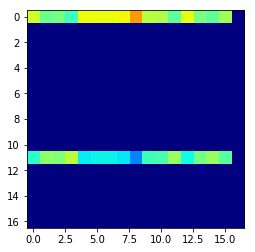

In [56]:
plt.imshow(conf, cmap='jet', vmin=0, vmax = 1)
plt.show()

In [59]:

# classes = ['AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']      #### 1095 images for validation
# classes = ['arjunImagesJPEG','AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']
classes = ['Arjun','AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']


  
for w in wrong_predictions[::10]:
    print(classes[w[2]], 'confused with', classes[w[1]])
    plt.imshow(w[0][0][0].data.cpu().numpy(), cmap='gray')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [63]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 6063
Date of submission:  08 Jun 2019
Time of submission:  18:56:37
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.


In [0]:
!mkdir '/content/ArjunImagesForTest/'
!mkdir '/content/ArjunImagesForTest/images/'

In [64]:
%%writefile /content/arjunFiles.txt
ArjunImagesForTest/1.jpeg
ArjunImagesForTest/2.jpeg
ArjunImagesForTest/3.jpeg
ArjunImagesForTest/4.jpeg
ArjunImagesForTest/5.jpeg
ArjunImagesForTest/6.jpeg
ArjunImagesForTest/7.jpeg
ArjunImagesForTest/8.jpeg
ArjunImagesForTest/9.jpeg
ArjunImagesForTest/10.jpeg


Writing /content/arjunFiles.txt


In [65]:
%run ../data_loader.py

<Figure size 432x288 with 0 Axes>

In [0]:
listOfWhatToWriteInFile = []
for residingFolder,_,allFiles in os.walk("/content/One_shot_Face_recognition/data/IMFDB_final/Arjun/"):
  for files in allFiles:
#      print(residingFolder.split('/')[-1]+"/"+files)
     listOfWhatToWriteInFile.append(residingFolder.split('/')[-1]+"/"+files)

In [0]:
file1 = open("/content/arjunFiles.txt","w") 
file1.writelines("\n".join(listOfWhatToWriteInFile))
file1.close()

In [87]:
!cat /content/arjunFiles.txt

ArjunImagesForTest/1.jpeg
ArjunImagesForTest/2.jpeg
ArjunImagesForTest/3.jpeg
ArjunImagesForTest/4.jpeg

In [0]:
!cd /content/

In [0]:
from data_loader import custom_data_loader

img_root = cf.data_dir+'IMFDB_final/'
# img_root = '/content/ArjunImagesForTest/'
# img_root = '/content/One_shot_Face_recognition/data/IMFDB_final/Arjun/'

val_list_file = cf.data_dir+'IMFDB_test.txt'      #### 1095 images for validation
# val_list_file = '/content/arjunFiles.txt'

def eval():
    feature_net.eval()
    classifier.eval()
    print(img_root)
    print(val_list_file_arjun)
    
    
    testloader = torch.utils.data.DataLoader(custom_data_loader(img_root = img_root, image_list = val_list_file, crop=False, mirror=False, 
                                                           resize = True, resize_shape=[128,128]), 
                                           batch_size=1, num_workers=1, shuffle = False, pin_memory=False)
    correct = 0
    total = 0
    conf_mat = np.zeros((num_classes, num_classes))
    total_ = 1e-12+np.zeros((num_classes))
    wrong_predictions = []
    for batch_idx, (inputs, targets) in enumerate(testloader):
        #if use_cuda:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs, targets = Variable(inputs, volatile=True), Variable(targets)
        features = feature_net.features(inputs).detach()
        features=feature_net(inputs)[1] 
        features = features.view(1,-1)
        #print(features.size())        
        outputs = classifier(features)
        size_ = outputs.size()
        outputs_ = outputs.view(size_[0], num_classes)
        _, predicted = torch.max(outputs_.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
        prediction = predicted.cpu().numpy()[0]
        targets = targets.data.cpu().numpy()[0]
        total_[targets] +=1
        conf_mat[predicted, targets] +=1
        
        if prediction != targets:
            wrong_predictions += [[inputs, prediction, targets]]
        
    for k in range(num_classes):
        conf_mat[:,k] /= total_[k]
    return conf_mat, 100.*correct/total, wrong_predictions
    

In [0]:
conf, acc, wrong_predictions = eval()

# classes = ['AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']      #### 1095 images for validation
# classes = ['arjunImagesJPEG','AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']
classes = ['Arjun','AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']


  
for w in wrong_predictions[::10]:
    print(classes[w[2]], 'confused with', classes[w[1]])
    plt.imshow(w[0][0][0].data.cpu().numpy(), cmap='gray')
    plt.show()

In [0]:

# model = MyModel()
## ... after training, save your model 
#model.save_state_dict('mytraining.pt')

## .. to load your previously training model:
#model.load_state_dict(torch.load('mytraining.pt'))


feature_net.save_state_dict('feature_net_onlyArjunMany.pt')
classifier.save_state_dict('classifier_onlyArjunMany.pt')

In [0]:
"""
############## Siamese ##############
# saving the model
state = {
    'net': feature_net
}
if not os.path.isdir(cf.data_dir+'checkpoint'):
    os.mkdir(cf.data_dir+'checkpoint')
torch.save(state, cf.data_dir+'checkpoint/siamese_ckpt.t7')


# loading up the model
feature_net = torch.load(cf.data_dir+'checkpoint/siamese_ckpt.t7')['net'].eval()




############### MLP Classifier  #################
state = {
            'net': classifier,
            'acc': acc,
            'epoch': epoch,
        }
if not os.path.isdir(cf.data_dir+'checkpoint'):
    os.mkdir(cf.data_dir+'checkpoint')
torch.save(state, cf.data_dir+'checkpoint/checkpoint_ckpt.t7')


"""

In [0]:
"""

# from the torch documentation
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

#### SAVE ##########
torch.save(model.state_dict(), PATH)

#### LOAD ##########
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
######################

"""

PATH1 = '/content/feature_net_onlyArjunMany.pt'
PATH2 = '/content/classifier_onlyArjunMany.pt'

# torch.save(feature_net_load.state_dict(), PATH1)
torch.save(classifier_load.state_dict(), PATH2)



In [0]:
feature_net_load = torch.load(cf.data_dir+'checkpoint/siamese_ckpt.t7')['net']
classifier_load = torch.load(cf.data_dir+'checkpoint/checkpoint_ckpt.t7')['net']


from data_loader import custom_data_loader

img_root = cf.data_dir+'IMFDB_final/'
val_list_file = cf.data_dir+'IMFDB_test.txt'      #### 1095 images for validation

def eval():
    feature_net_load.eval()
    classifier_load.eval()
    print(img_root)
    print(val_list_file_arjun)
    
    
    testloader = torch.utils.data.DataLoader(custom_data_loader(img_root = img_root, image_list = val_list_file, crop=False, mirror=False, 
                                                           resize = True, resize_shape=[128,128]), 
                                           batch_size=1, num_workers=1, shuffle = False, pin_memory=False)
    correct = 0
    total = 0
    conf_mat = np.zeros((num_classes, num_classes))
    total_ = 1e-12+np.zeros((num_classes))
    wrong_predictions = []
    for batch_idx, (inputs, targets) in enumerate(testloader):
        #if use_cuda:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs, targets = Variable(inputs, volatile=True), Variable(targets)
        features = feature_net_load.features(inputs).detach()
        features=feature_net_load(inputs)[1] 
        features = features.view(1,-1)
        #print(features.size())        
        outputs = classifier_load(features)
        size_ = outputs.size()
        outputs_ = outputs.view(size_[0], num_classes)
        _, predicted = torch.max(outputs_.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
        prediction = predicted.cpu().numpy()[0]
        targets = targets.data.cpu().numpy()[0]
        total_[targets] +=1
        conf_mat[predicted, targets] +=1
        
        if prediction != targets:
            wrong_predictions += [[inputs, prediction, targets]]
        
    for k in range(num_classes):
        conf_mat[:,k] /= total_[k]
    return conf_mat, 100.*correct/total, wrong_predictions



conf, acc, wrong_predictions = eval()
classes = ['Arjun','AamairKhan', 'Rimisen', 'Kajol', 'KareenaKapoor','RishiKapoor', 'AmrishPuri', 'AnilKapoor', 'AnupamKher', 'BomanIrani', 'HrithikRoshan', 'KajalAgarwal', 'KatrinaKaif', 'Madhavan', 'MadhuriDixit', 'Umashri', 'Trisha']

for w in wrong_predictions[::10]:
  print(classes[w[2]], 'confused with', classes[w[1]])
  plt.imshow(w[0][0][0].data.cpu().numpy(), cmap='gray')
  plt.show()